#  Objective - This code is built for preparation of model data from the raw data

#  Description - The code us is used for standarization , variables creation , clustering 
#                  and using decision tree for getting relative importance for the independetn variables

# Date -        22 Sep 2020
# Author -      Avinash Mishra 
# Company -    WSG Market Limited, NewZealand

In [93]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from IPython.display import clear_output
from numpy import arange
import os 
from sklearn.metrics import r2_score
import ta
from ta import *
import talib
#from rfpimp import permutation_importances


In [94]:
import warnings
warnings.filterwarnings("ignore")

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import ta
import warnings
import time 
from IPython.display import clear_output
from pyti.exponential_moving_average import exponential_moving_average as EMA
import xlrd 
import xlsxwriter
import openpyxl
import sys
import decimal
import pyodbc 
import pandas.io.sql
import smtplib
import mimetypes
from email.mime.multipart import MIMEMultipart
from email import encoders
from email.message import Message
from email.mime.audio import MIMEAudio
from email.mime.base import MIMEBase
from email.mime.image import MIMEImage
from email.mime.text import MIMEText
from ta import *
import talib
import time
import datetime
import os
#import paho.mqtt.client as mqtt
import json
# import mysql.connector
# from mysql.connector import errorcode
from elasticsearch import Elasticsearch
import socket 
import sys  
import csv
import socket
from datetime import datetime
# from pyspark import SparkContext
# from pyspark.sql import SparkSession
# from pyspark.streaming import StreamingContext
# from pyspark.sql import SQLContext
from collections import namedtuple
from scipy.signal import argrelextrema
from scipy.signal import find_peaks, peak_prominences
import pickle
import matplotlib
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib import style
from functools import reduce 
import re
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import preprocessing
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import glob


# --------------In case the data been prepared with indicators ----------#

In [96]:
final_data = pd.read_csv("C:/Users/Administrator/WSG Markets/10 Year data creation for model/Creating model data for all strategy combined/Strategy - 1_1 TP Ratio/Original Entry Data/Entry Data with Indicators.csv")

In [98]:
df_model_data = final_data
df_model_data = df_model_data.reset_index(drop = True)


df_model_data['date_x']=pd.to_datetime(df_model_data['date_x'],format = '%Y-%m-%d %H:%M:%S')
df_model_data = df_model_data.sort_values(by='date_x') 


df_model_data

date_x     Strategy Strategy Type Currency TimeFrame  \
217699 2009-04-29 21:00:00  PinscherEMA        Normal  GBP/NZD        D1   
215739 2009-05-05 21:00:00  PinscherEMA        Normal  EUR/NZD        D1   
210352 2009-05-07 21:00:00  PinscherEMA        Normal  NZD/CAD        D1   
215740 2009-05-12 21:00:00  PinscherEMA        Normal  EUR/NZD        D1   
211237 2009-05-12 21:00:00  PinscherEMA        Normal  NZD/USD        D1   
...                    ...          ...           ...      ...       ...   
72032  2021-03-24 13:00:00     Ichimoku        Normal  GBP/NZD        H1   
17081  2021-03-24 13:00:00          EMA        Normal  USD/JPY        H1   
183474 2021-03-24 16:00:00  PinscherEMA        Normal  EUR/JPY        H4   
107230 2021-03-24 18:00:00     Ichimoku        Normal  NZD/JPY        H1   
172469 2021-03-25 04:00:00  PinscherEMA        Normal  AUD/USD        H4   

       Condition   _askclose    _askhigh    _askopen     _asklow  ...  \
217699     Short    2.575500    2.625200    2.618850    2.559610  ...   
215739     Short    2.296800    2.331920    2.327400    2.287380  ...   
210352      Long    0.691550    0.698875    0.680525    0.679045  ...   
215740     Short    2.252600    2.275860    2.263250    2.242480  ...   
211237      Long    0.606230    0.609660    0.600155    0.596205  ...   
...          ...         ...         ...         ...         ...  ...   
72032       Long    1.967460    1.969680    1.964230    1.963965  ...   
17081       Long  108.884000  108.958000  108.692500  108.692500  ...   
183474     Short  128.379500  128.773010  128.748500  128.370000  ...   
107230     Short   75.812000   75.994995   75.969500   75.781000  ...   
172469     Short    0.758695    0.760835    0.760405    0.758540  ...   

        UO_overbought_sum UO_oversold_sum  Williams %R_overbought_sum  \
217699                  0               0                           0   
215739                  0               0                           0   
210352                  0               0                           0   
215740                  0               0                           0   
211237                  0               0                           0   
...                   ...             ...                         ...   
72032                   0               0                           0   
17081                   0               0                           1   
183474                  0               0                           0   
107230                  0               0                           0   
172469                  0               0                           0   

       Williams %R_oversold_sum  MFI_overbought_sum  MFI_oversold_sum  \
217699                        0                   0                 0   
215739                        0                   0                 0   
210352                        0                   0                 0   
215740                        0                   0                 0   
211237                        0                   0                 0   
...                         ...                 ...               ...   
72032                         0                   0                 0   
17081                         0                   0                 0   
183474                        0                   0                 0   
107230                        0                   0                 0   
172469                        0                   0                 0   

         30 Day MA 30 Day STD  Upper Band  Lower Band  
217699         NaN        NaN         NaN         NaN  
215739         NaN        NaN         NaN         NaN  
210352         NaN        NaN         NaN         NaN  
215740         NaN        NaN         NaN         NaN  
211237         NaN        NaN         NaN         NaN  
...            ...        ...         ...         ...  
72032     1.964371   0.001999    1.968369    1.960374  
17081   108.610075   0.09945

In [17]:
# df_model_data.insert(3,'_askopen',(df_model_data['bidopen']+df_model_data['askopen'])/2)
# df_model_data.insert(4,'_askhigh',(df_model_data['bidhigh']+df_model_data['askhigh'])/2)
# df_model_data.insert(5,'_asklow',(df_model_data['bidlow']+df_model_data['asklow'])/2)
# df_model_data.insert(6,'_askclose',(df_model_data['bidclose']+df_model_data['askclose'])/2)
# df_model_data = df_model_data.drop(columns = ['bidopen','bidclose','bidhigh','bidlow','askopen','askclose','askhigh','asklow'])
# df_model_data = df_model_data.rename(columns = {'askopen':'_askopen',
#                                                 'askclose':'_askclose',
#                                                 'askhigh':'_askhigh',
#                                                 'asklow':'_asklow'})

In [100]:
df_model_data = df_model_data.drop(columns = ['askopen','askclose','askhigh','asklow'])


In [101]:
path = "C:/Users/Administrator/WSG Markets/10 Year data creation for model/Creating model data for all strategy combined/Strategy - 1_1 TP Ratio/Model Data/"

In [102]:
df_model_data.to_csv(path+"Normal Model data.csv",index=False)

In [103]:
path_for_data = "C:/Users/Administrator/WSG Markets/10 Year data creation for model/Creating model data for all strategy combined/Strategy - 1_1 TP Ratio/Model Data/"
df_model_data = pd.read_csv(path_for_data + "Normal Model data.csv")

In [104]:
df_model_data.columns.tolist()

['date_x',
 'Strategy',
 'Strategy Type',
 'Currency',
 'TimeFrame',
 'Condition',
 '_askclose',
 '_askhigh',
 '_askopen',
 '_asklow',
 'Risk_Percent',
 'Trade_Flag',
 'Stop_Loss',
 'Trade_Status_Flag',
 'Take_Profit',
 'Take_Profit_pips',
 'TPP',
 'Good_Bad_Flag',
 'Units',
 'Closing_Flag',
 'max_price_reached',
 'min_price_reached',
 'Date_updated',
 'Exit_closing_flag',
 'Profit_Loss_v1',
 'SL_Flag',
 'Year',
 'Month',
 'Day',
 'Hour',
 'date_y',
 '_volume',
 '_volume_new',
 '_stock_%K',
 '_stoch_%D',
 '_stoch_slow_%K',
 '_stoch_slow_%D',
 '_stoch_direction',
 '_stoch_slow_0_1',
 '_Ema_20',
 '_Ema_200',
 'Ema_direction',
 'volume_adi',
 'volume_obv',
 'volume_cmf',
 'volume_fi',
 'momentum_mfi',
 'volume_em',
 'volume_sma_em',
 'volume_vpt',
 'volume_nvi',
 'volume_vwap',
 'volatility_atr',
 'volatility_bbm',
 'volatility_bbh',
 'volatility_bbl',
 'volatility_bbw',
 'volatility_bbp',
 'volatility_bbhi',
 'volatility_bbli',
 'volatility_kcc',
 'volatility_kch',
 'volatility_kcl',
 'v

In [6]:
# #----- EMA Entry DATA ---- #
# path = "C:/Users/WELCOME/WSG Markets/Making Model Features 20201809/Creating Model Data for All pairs/Entry Data/Entry Data/"

# df_trades = pd.read_excel(path + "EMA Entry Data in excel.xlsx")
# df_trades = df_trades.drop(columns = ['Stop_Loss_min','Stop_Loss_max'])
# df_trades = df_trades.rename(columns = {'Timeframe':'TimeFrame'})
# df_trades['Good_Bad_Flag'] = np.where(df_trades['Close_Flag'] == '100_per_close',1,0)
# df_trades['Good_Bad_Flag'] = np.where(df_trades['Good_Bad_Flag'] == 1,'Good','Bad')
# df_trades.head()

In [7]:
# len(df_trades)

In [8]:
# df_trades.dropna(inplace=True)

In [9]:
# len(df_trades)

In [10]:
# # df_trades['Date_updated']=pd.to_datetime(df_trades['date'])
# df_trades['Date_updated']=pd.to_datetime(df_trades['date'],format = '%Y-%m-%d %H:%M:%S')

# df_trades['Year'] = df_trades['Date_updated'].dt.year
# df_trades['Month'] = df_trades['Date_updated'].dt.month
# df_trades['Day'] = df_trades['Date_updated'].dt.day
# df_trades['Hour'] = df_trades['Date_updated'].dt.hour

# df_trades['Date_updated']

In [11]:
# df_trades.head(1)

In [12]:

# path = "C:/Users/WELCOME/WSG Markets/Making Model Features 20201809/"
    
# final_data= pd.read_csv(path + "AUD_CAD_model_features.csv")
# final_data = final_data.drop(columns = ['Unnamed: 0','Unnamed: 0.1','trend_psar_up','trend_psar_down'])
# final_data = final_data.dropna()


# final_data['Date_updated']=pd.to_datetime(final_data['date'],format = '%Y-%m-%d %H:%M:%S')

# final_data['Year'] = final_data['Date_updated'].dt.year
# final_data['Month'] = final_data['Date_updated'].dt.month
# final_data['Day'] = final_data['Date_updated'].dt.day
# final_data['Hour'] = final_data['Date_updated'].dt.hour

# final_data['Date_updated']

In [13]:
# final_data.head(1)

In [14]:
# # -------Merging Dataframe ------#

# df_model_data = df_trades.merge(final_data, on=['Currency','TimeFrame','Year','Month','Day','Hour'], how='inner')


# df_model_data = df_model_data.drop(columns = ['bidopen_y','bidclose_y','bidhigh_y','bidlow_y','askopen_y','askclose_y','askhigh_y','asklow_y'])
# df_model_data = df_model_data.rename(columns = {'bidopen_x':'bidopen',
#                                         'bidclose_x':'bidclose','bidhigh_x':'bidhigh',
#                                         'bidlow_x':'bidlow','askopen_x':'askopen',
#                                         'askclose_x':'askclose','askhigh_x':'askhigh',
#                                         'asklow_x':'asklow',
#                                                'date_x':'date'})
# df_model_data

In [105]:
df_model_data['Year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021], dtype=int64)

In [56]:
# df_model_data.drop("Date_updated_y",axis=1,inplace=True)

In [106]:
df_model_data

date_x     Strategy Strategy Type Currency TimeFrame  \
0       2009-04-29 21:00:00  PinscherEMA        Normal  GBP/NZD        D1   
1       2009-05-05 21:00:00  PinscherEMA        Normal  EUR/NZD        D1   
2       2009-05-07 21:00:00  PinscherEMA        Normal  NZD/CAD        D1   
3       2009-05-12 21:00:00  PinscherEMA        Normal  EUR/NZD        D1   
4       2009-05-12 21:00:00  PinscherEMA        Normal  NZD/USD        D1   
...                     ...          ...           ...      ...       ...   
220104  2021-03-24 13:00:00     Ichimoku        Normal  GBP/NZD        H1   
220105  2021-03-24 13:00:00          EMA        Normal  USD/JPY        H1   
220106  2021-03-24 16:00:00  PinscherEMA        Normal  EUR/JPY        H4   
220107  2021-03-24 18:00:00     Ichimoku        Normal  NZD/JPY        H1   
220108  2021-03-25 04:00:00  PinscherEMA        Normal  AUD/USD        H4   

       Condition   _askclose    _askhigh    _askopen     _asklow  ...  \
0          Short    2.575500    2.625200    2.618850    2.559610  ...   
1          Short    2.296800    2.331920    2.327400    2.287380  ...   
2           Long    0.691550    0.698875    0.680525    0.679045  ...   
3          Short    2.252600    2.275860    2.263250    2.242480  ...   
4           Long    0.606230    0.609660    0.600155    0.596205  ...   
...          ...         ...         ...         ...         ...  ...   
220104      Long    1.967460    1.969680    1.964230    1.963965  ...   
220105      Long  108.884000  108.958000  108.692500  108.692500  ...   
220106     Short  128.379500  128.773010  128.748500  128.370000  ...   
220107     Short   75.812000   75.994995   75.969500   75.781000  ...   
220108     Short    0.758695    0.760835    0.760405    0.758540  ...   

        UO_overbought_sum UO_oversold_sum  Williams %R_overbought_sum  \
0                       0               0                           0   
1                       0               0                           0   
2                       0               0                           0   
3                       0               0                           0   
4                       0               0                           0   
...                   ...             ...                         ...   
220104                  0               0                           0   
220105                  0               0                           1   
220106                  0               0                           0   
220107                  0               0                           0   
220108                  0               0                           0   

       Williams %R_oversold_sum  MFI_overbought_sum  MFI_oversold_sum  \
0                             0                   0                 0   
1                             0                   0                 0   
2                             0                   0                 0   
3                             0                   0                 0   
4                             0                   0                 0   
...                         ...                 ...               ...   
220104                        0                   0                 0   
220105                        0                   0                 0   
220106                        0                   0                 0   
220107                        0                   0                 0   
220108                        0                   0                 0   

         30 Day MA 30 Day STD  Upper Band  Lower Band  
0              NaN        NaN         NaN         NaN  
1              NaN        NaN         NaN         NaN  
2              NaN        NaN         NaN         NaN  
3              NaN        NaN         NaN         NaN  
4              NaN        NaN         NaN         NaN  
...            ...        ...         ...         ...  
220104    1.964371   0.001999    1.968369    1.960374  
220105  108.61007

In [107]:
len(df_model_data)

220109

In [108]:
df_model_data.columns.tolist()

['date_x',
 'Strategy',
 'Strategy Type',
 'Currency',
 'TimeFrame',
 'Condition',
 '_askclose',
 '_askhigh',
 '_askopen',
 '_asklow',
 'Risk_Percent',
 'Trade_Flag',
 'Stop_Loss',
 'Trade_Status_Flag',
 'Take_Profit',
 'Take_Profit_pips',
 'TPP',
 'Good_Bad_Flag',
 'Units',
 'Closing_Flag',
 'max_price_reached',
 'min_price_reached',
 'Date_updated',
 'Exit_closing_flag',
 'Profit_Loss_v1',
 'SL_Flag',
 'Year',
 'Month',
 'Day',
 'Hour',
 'date_y',
 '_volume',
 '_volume_new',
 '_stock_%K',
 '_stoch_%D',
 '_stoch_slow_%K',
 '_stoch_slow_%D',
 '_stoch_direction',
 '_stoch_slow_0_1',
 '_Ema_20',
 '_Ema_200',
 'Ema_direction',
 'volume_adi',
 'volume_obv',
 'volume_cmf',
 'volume_fi',
 'momentum_mfi',
 'volume_em',
 'volume_sma_em',
 'volume_vpt',
 'volume_nvi',
 'volume_vwap',
 'volatility_atr',
 'volatility_bbm',
 'volatility_bbh',
 'volatility_bbl',
 'volatility_bbw',
 'volatility_bbp',
 'volatility_bbhi',
 'volatility_bbli',
 'volatility_kcc',
 'volatility_kch',
 'volatility_kcl',
 'v

# Section 1.1 - Standardization

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
# importing the standarised data 
df1 = df_model_data
#df1 = df1.rename(columns = {'date_x':'date','Currency_x':'Currency','TimeFrame_x':'TimeFrame'})
df1 = df1.rename(columns = {'date_x':'date'})
#best_itr = pd.read_csv("Iteration Table.csv")
best_itr = df1[['Currency','Condition','TimeFrame','Strategy']]
best_itr.drop_duplicates(keep='first',inplace = True)
best_itr = best_itr.reset_index(drop = True)
final_iter_list = best_itr
final_iter_list

Currency Condition TimeFrame     Strategy
0    GBP/NZD     Short        D1  PinscherEMA
1    EUR/NZD     Short        D1  PinscherEMA
2    NZD/CAD      Long        D1  PinscherEMA
3    NZD/USD      Long        D1  PinscherEMA
4    EUR/NZD      Long        D1  PinscherEMA
..       ...       ...       ...          ...
373  GBP/AUD     Short        D1          EMA
374  GBP/CHF     Short        D1          EMA
375  GBP/JPY     Short        D1          EMA
376  EUR/AUD     Short        D1          EMA
377  EUR/CHF     Short        D1          EMA

[378 rows x 4 columns]

In [111]:

# df1 = df1.drop(columns = ['volume_adi','trend_psar_up','trend_psar_down','Currency_y',
#                           'Unnamed: 0','Unnamed: 0.1','TimeFrame_y','Unnamed: 0.1.1'])


df1 = df1.drop(columns = ['volume_adi','trend_psar_up','trend_psar_down'])#,'Currency_y',
                          #'Unnamed: 0','Unnamed: 0.1','TimeFrame_y','Unnamed: 0.1.1'])



df1 = df1.dropna()
# df1 = df1.rename(columns = {'date_x':'date','Currency_x':'Currency','TimeFrame_x':'TimeFrame',
#                             'Date_updated_x':'Date_updated'})

df1 = df1.rename(columns = {'date_x':'date'})


df1 = df1.reset_index(drop = True)
df1.loc[:, (df1 != 0).any(axis=0)]

df1['Date'] = pd.to_datetime(df1['date'])

df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')

df1['date'] = pd.to_datetime(df1['Date'],format = '%Y-%m-%d %H:%M:%S')

# df1['Date'] = pd.to_datetime(df1['date'], infer_datetime_format=True, dayfirst=True).strftime('%d-%m-%Y %H:%M:%S')

#df1=df1.drop(columns = ['Date_updated'])
# df1.insert(19,'YEAR',df1['Date'].dt.year)

In [112]:
df1.drop("Date",axis=1,inplace=True)

In [113]:
df1['Good_Bad_Flag']

0          Bad
1         Good
2         Good
3          Bad
4          Bad
          ... 
218256     Bad
218257     Bad
218258     Bad
218259     Bad
218260     Bad
Name: Good_Bad_Flag, Length: 218261, dtype: object

In [114]:
#-------- Adding Time Variables------#


df1


# df1['Good_Bad_Flag'] = np.where(df1['Close_Flag'] == '100_per_close',1,0)

df1['Good_Bad_Flag'] = np.where(df1['Good_Bad_Flag'] == 'Good',1,0)
    
df1['date']=pd.to_datetime(df1['date'],format = '%Y-%m-%d %H:%M:%S')

df1['Hour'] = df1['date'].dt.hour
df1['Hour_Flag'] = np.where((df1['Hour'] >= 0)&(df1['Hour'] < 4),1,\
                          np.where((df1['Hour'] >= 4)&(df1['Hour'] < 8),2,\
                                   np.where((df1['Hour'] >= 8)&(df1['Hour'] < 12),3,\
                                            np.where((df1['Hour'] >= 12)&(df1['Hour'] < 16),4,\
                                                     np.where((df1['Hour'] >= 16)&(df1['Hour'] < 20),5,6)))))

df1 = df1.reset_index(drop = True)

df1['Recency_5'] = df1.groupby(['Currency','Condition','TimeFrame'])['Good_Bad_Flag'].apply(lambda x: x.rolling(5, 1).mean().shift().bfill())
df1['Recency_10'] = df1.groupby(['Currency','Condition','TimeFrame'])['Good_Bad_Flag'].apply(lambda x: x.rolling(10, 1).mean().shift().bfill())
df1['Recency_15'] = df1.groupby(['Currency','Condition','TimeFrame'])['Good_Bad_Flag'].apply(lambda x: x.rolling(15, 1).mean().shift().bfill())


df1['Time_Gap_Flag'] = df1.groupby(['Currency','Condition','TimeFrame'])['date'].apply(lambda x: x.diff())
df1['Time_Gap_Flag'] = df1['Time_Gap_Flag'].fillna(pd.Timedelta(seconds=0))
df1['Time_Gap_Hrs'] = df1['Time_Gap_Flag'].dt.components['hours'] + (24* df1['Time_Gap_Flag'].dt.days)
df1.drop('Time_Gap_Flag',axis=1,inplace=True)


# df1['Good_Bad_Flag'] = np.where(df1['Good_Bad_Flag'] == 1,'Good','Bad')


# df1.to_csv(p1 + "Ichimoku_updated_standarised_model_data_20200630_v1.csv",index=False)
df1

date     Strategy Strategy Type Currency TimeFrame  \
0      2010-01-14 05:00:00          EMA        Normal  EUR/CHF        H1   
1      2010-01-14 05:00:00     Ichimoku        Normal  GBP/USD        H1   
2      2010-01-14 07:00:00     Ichimoku        Normal  NZD/CHF        H1   
3      2010-01-14 07:00:00     Ichimoku        Normal  CAD/JPY        H1   
4      2010-01-14 07:00:00          EMA        Normal  CAD/JPY        H1   
...                    ...          ...           ...      ...       ...   
218256 2021-03-24 13:00:00     Ichimoku        Normal  GBP/NZD        H1   
218257 2021-03-24 13:00:00          EMA        Normal  USD/JPY        H1   
218258 2021-03-24 16:00:00  PinscherEMA        Normal  EUR/JPY        H4   
218259 2021-03-24 18:00:00     Ichimoku        Normal  NZD/JPY        H1   
218260 2021-03-25 04:00:00  PinscherEMA        Normal  AUD/USD        H4   

       Condition   _askclose    _askhigh    _askopen     _asklow  ...  \
0           Long    1.479140    1.479255    1.478575    1.478425  ...   
1           Long    1.628755    1.629705    1.628455    1.628445  ...   
2           Long    0.757870    0.757970    0.754510    0.754250  ...   
3           Long   89.162506   89.233000   88.874500   88.839500  ...   
4           Long   89.162506   89.233000   88.874500   88.839500  ...   
...          ...         ...         ...         ...         ...  ...   
218256      Long    1.967460    1.969680    1.964230    1.963965  ...   
218257      Long  108.884000  108.958000  108.692500  108.692500  ...   
218258     Short  128.379500  128.773010  128.748500  128.370000  ...   
218259     Short   75.812000   75.994995   75.969500   75.781000  ...   
218260     Short    0.758695    0.760835    0.760405    0.758540  ...   

        MFI_oversold_sum   30 Day MA  30 Day STD  Upper Band  Lower Band  \
0                      0    1.478034    0.000629    1.479292    1.476776   
1                      0    1.628165    0.001400    1.630964    1.625365   
2                      0    0.753645    0.001150    0.755945    0.751345   
3                      0   88.699601    0.284783   89.269167   88.130035   
4                      0   88.699601    0.284783   89.269167   88.130035   
...                  ...         ...         ...         ...         ...   
218256                 0    1.964371    0.001999    1.968369    1.960374   
218257                 0  108.610075    0.099450  108.808975  108.411175   
218258                 0  129.126002    0.510396  130.146793  128.105211   
218259                 0   75.856875    0.110026   76.076927   75.636823   
218260                 0    0.766165    0.006272    0.778709    0.753621   

        Hour_Flag  Recency_5  Recency_10  Recency_15 Time_Gap_Hrs  
0               2        0.0         0.0    0.000000            0  
1               2        1.0         1.0    1.000000            0  
2               2        1.0         1.0    1.000000            0  
3               2        0.0         0.0    0.000000            0  
4               2        0.0         0.0    0.000000            0  
...           ...        ...         ...         ...          ...  
218256          4        0.6         0.4    0.533333           12  
218257          4        0.4         0.7    0.800000            3  
218258          5        0.4         0.3    0.333333           12  
218259          5        0.8         0.6    0.400000          125  
218260          2        0.8         0.7    0.533333           72  

[218261 rows x 288 columns]

In [115]:
# export_path = "C:/Users/Administrator/WSG Markets/10 Year data creation for model/sep oct back testing data/pairs Selected by accuracy/Model data/EMA/"
df1.to_csv(path_for_data+"Normal Model data with time recency.csv",index=False)

In [116]:
df1.drop("_volume_new",axis=1,inplace=True)

In [117]:
list =df1.columns.tolist()
list[31:]

['_volume',
 '_stock_%K',
 '_stoch_%D',
 '_stoch_slow_%K',
 '_stoch_slow_%D',
 '_stoch_direction',
 '_stoch_slow_0_1',
 '_Ema_20',
 '_Ema_200',
 'Ema_direction',
 'volume_obv',
 'volume_cmf',
 'volume_fi',
 'momentum_mfi',
 'volume_em',
 'volume_sma_em',
 'volume_vpt',
 'volume_nvi',
 'volume_vwap',
 'volatility_atr',
 'volatility_bbm',
 'volatility_bbh',
 'volatility_bbl',
 'volatility_bbw',
 'volatility_bbp',
 'volatility_bbhi',
 'volatility_bbli',
 'volatility_kcc',
 'volatility_kch',
 'volatility_kcl',
 'volatility_kcw',
 'volatility_kcp',
 'volatility_kchi',
 'volatility_kcli',
 'volatility_dcl',
 'volatility_dch',
 'trend_macd',
 'trend_macd_signal',
 'trend_macd_diff',
 'trend_sma_fast',
 'trend_sma_slow',
 'trend_ema_fast',
 'trend_ema_slow',
 'trend_adx',
 'trend_adx_pos',
 'trend_adx_neg',
 'trend_vortex_ind_pos',
 'trend_vortex_ind_neg',
 'trend_vortex_ind_diff',
 'trend_trix',
 'trend_mass_index',
 'trend_cci',
 'trend_dpo',
 'trend_kst',
 'trend_kst_sig',
 'trend_kst_diff'

In [118]:
#### --------Standardization Code------#



col_befor = 31
# col_after = 253
df_rest_new =pd.DataFrame()

final_data =pd.DataFrame()

for item,row in final_iter_list.iterrows():

        print(item)
        condition = row['Condition']
        currency = row['Currency']
        tf = row['TimeFrame']
        strategy = row['Strategy']

        print(currency)


        df = df1[(df1['Condition'] == condition)&(df1['Currency'] == currency)&(df1['TimeFrame'] == tf)
                & (df1['Strategy'] == strategy)]

        df = df.reset_index(drop = True)

        df_before = df.iloc[:,:col_befor]
        
#         df_after = df.iloc[:,col_after:]
        
#         df = df.iloc[:,col_befor:col_after]
        df = df.iloc[:,col_befor:]
        
        
        
        sc = StandardScaler()
        X =  sc.fit_transform(df)
        
        test= pd.DataFrame(X)
        
        test.columns=df.columns

#         df_rest_new = pd.concat([df_before,test,df_after],axis =1)
        df_rest_new = pd.concat([df_before,test],axis =1)

        final_data =final_data.append(df_rest_new)

        clear_output()
    

In [119]:
# export_path = "C:/Users/WELCOME/WSG Markets/Making Model Features 20201809/Creating Model Data for All pairs/Clusters/"
final_data.to_csv(path_for_data+"All Strategy_model_standarised_data.csv",index=False)

In [120]:
# final_data.drop('index',axis=1,inplace=True)
final_data

date     Strategy Strategy Type Currency TimeFrame  \
0  2010-02-09 22:00:00  PinscherEMA        Normal  GBP/NZD        D1   
1  2010-03-05 22:00:00  PinscherEMA        Normal  GBP/NZD        D1   
2  2010-03-15 21:00:00  PinscherEMA        Normal  GBP/NZD        D1   
3  2010-03-18 21:00:00  PinscherEMA        Normal  GBP/NZD        D1   
4  2010-04-09 21:00:00  PinscherEMA        Normal  GBP/NZD        D1   
..                 ...          ...           ...      ...       ...   
20 2020-10-12 21:00:00          EMA        Normal  EUR/CHF        D1   
21 2020-10-14 21:00:00          EMA        Normal  EUR/CHF        D1   
22 2020-12-09 22:00:00          EMA        Normal  EUR/CHF        D1   
23 2021-01-15 22:00:00          EMA        Normal  EUR/CHF        D1   
24 2021-01-27 22:00:00          EMA        Normal  EUR/CHF        D1   

   Condition  _askclose  _askhigh  _askopen   _asklow  ...  MFI_oversold_sum  \
0      Short   2.257990  2.284565  2.281700  2.251775  ...         -0.252474   
1      Short   2.172655  2.193075  2.188800  2.161815  ...         -0.252474   
2      Short   2.143725  2.165670  2.165670  2.142515  ...         -0.252474   
3      Short   2.133330  2.148090  2.145680  2.129865  ...         -0.252474   
4      Short   2.149680  2.163825  2.161880  2.142865  ...         -0.252474   
..       ...        ...       ...       ...       ...  ...               ...   
20     Short   1.073925  1.077435  1.076210  1.073375  ...         -0.261488   
21     Short   1.073155  1.075240  1.074490  1.072510  ...         -0.261488   
22     Short   1.074705  1.078445  1.076270  1.074205  ...         -0.261488   
23     Short   1.076285  1.079875  1.079590  1.075080  ...         -0.261488   
24     Short   1.076245  1.078885  1.078355  1.075015  ...         -0.261488   

   30 Day MA  30 Day STD Upper Band  Lower Band  Hour_Flag  Recency_5  \
0   2.184571    1.345927   2.250255    2.065539        0.0   2.109601   
1   1.862499    1.961857   2.035004    1.631993        0.0   2.109601   
2   1.598088    1.708311   1.749676    1.396350        0.0   2.109601   
3   1.492593    1.338298   1.597372    1.344928        0.0   2.109601   
4   1.249476    0.023284   1.180243    1.299671        0.0   2.109601   
..       ...         ...        ...         ...        ...        ...   
20 -0.926982   -0.731296  -0.965748   -0.884044        0.0  -1.591864   
21 -0.933173   -0.519299  -0.958544   -0.903764        0.0   1.121541   
22 -0.882480   -0.354316  -0.897862   -0.863382        0.0   2.026009   
23 -0.865829   -0.406589  -0.884633   -0.843336        0.0  -0.687396   
24 -0.911776   -0.256239  -0.920754   -0.899041        0.0  -0.687396   

    Recency_10  Recency_15 Time_Gap_Hrs  
0     2.828511    3.268997    -0.782151  
1     2.828511    3.268997     0.691896  
2     2.828511    3.268997    -0.170524  
3     2.828511    3.268997    -0.597896  
4     2.828511    3.268997     0.569058  
..         ...         ...          ...  
20   -1.050934   -1.598182    -0.051528  
21    0.541390    0.138972    -0.600343  
22    2.929877    1.876126    -0.417404  
23    0.541390    1.876126    -0.600343  
24   -1.050934    1.297075     0.222880  

[218261 rows x 287 columns]

# Section 2 - Clustering 

In [121]:
import sklearn.cluster

In [122]:
# importing the standarised data 
#path = "C:/Users/Avinash Mishra/Avinash/Python Codes/WSG Market/Hammer Pattern/Model/Model Data/"
#df1 = pd.read_csv(path + "Std data Pinshcer 20200630 v1.csv")
#df1.head()

In [123]:
df1=final_data

In [124]:
#best_itr = pd.read_csv("Iteration Table.csv")
best_itr = df1[['Currency','Condition','TimeFrame','Strategy']]
best_itr.drop_duplicates(keep='first',inplace = True)
best_itr = best_itr.reset_index(drop=True)
final_iter_list = best_itr
final_iter_list

Currency Condition TimeFrame     Strategy
0    GBP/NZD     Short        D1  PinscherEMA
1    EUR/NZD     Short        D1  PinscherEMA
2    NZD/CAD      Long        D1  PinscherEMA
3    NZD/USD      Long        D1  PinscherEMA
4    EUR/NZD      Long        D1  PinscherEMA
..       ...       ...       ...          ...
373  GBP/AUD     Short        D1          EMA
374  GBP/CHF     Short        D1          EMA
375  GBP/JPY     Short        D1          EMA
376  EUR/AUD     Short        D1          EMA
377  EUR/CHF     Short        D1          EMA

[378 rows x 4 columns]

In [125]:
list =df1.columns.tolist()
list[31]

'_volume'

In [126]:
df1.head()

date     Strategy Strategy Type Currency TimeFrame Condition  \
0 2010-02-09 22:00:00  PinscherEMA        Normal  GBP/NZD        D1     Short   
1 2010-03-05 22:00:00  PinscherEMA        Normal  GBP/NZD        D1     Short   
2 2010-03-15 21:00:00  PinscherEMA        Normal  GBP/NZD        D1     Short   
3 2010-03-18 21:00:00  PinscherEMA        Normal  GBP/NZD        D1     Short   
4 2010-04-09 21:00:00  PinscherEMA        Normal  GBP/NZD        D1     Short   

   _askclose  _askhigh  _askopen   _asklow  ...  MFI_oversold_sum 30 Day MA  \
0   2.257990  2.284565   2.28170  2.251775  ...         -0.252474  2.184571   
1   2.172655  2.193075   2.18880  2.161815  ...         -0.252474  1.862499   
2   2.143725  2.165670   2.16567  2.142515  ...         -0.252474  1.598088   
3   2.133330  2.148090   2.14568  2.129865  ...         -0.252474  1.492593   
4   2.149680  2.163825   2.16188  2.142865  ...         -0.252474  1.249476   

   30 Day STD Upper Band  Lower Band  Hour_Flag  Recency_5  Recency_10  \
0    1.345927   2.250255    2.065539        0.0   2.109601    2.828511   
1    1.961857   2.035004    1.631993        0.0   2.109601    2.828511   
2    1.708311   1.749676    1.396350        0.0   2.109601    2.828511   
3    1.338298   1.597372    1.344928        0.0   2.109601    2.828511   
4    0.023284   1.180243    1.299671        0.0   2.109601    2.828511   

   Recency_15 Time_Gap_Hrs  
0    3.268997    -0.782151  
1    3.268997     0.691896  
2    3.268997    -0.170524  
3    3.268997    -0.597896  
4    3.268997     0.569058  

[5 rows x 287 columns]

In [127]:
df1['Exit_closing_flag']

0       100_per_close
1       100_per_close
2       100_per_close
3       100_per_close
4     Stop_Loss_Reach
           ...       
20      100_per_close
21      100_per_close
22    Stop_Loss_Reach
23    Stop_Loss_Reach
24    Stop_Loss_Reach
Name: Exit_closing_flag, Length: 218261, dtype: object

In [128]:
df1.columns.tolist()

['date',
 'Strategy',
 'Strategy Type',
 'Currency',
 'TimeFrame',
 'Condition',
 '_askclose',
 '_askhigh',
 '_askopen',
 '_asklow',
 'Risk_Percent',
 'Trade_Flag',
 'Stop_Loss',
 'Trade_Status_Flag',
 'Take_Profit',
 'Take_Profit_pips',
 'TPP',
 'Good_Bad_Flag',
 'Units',
 'Closing_Flag',
 'max_price_reached',
 'min_price_reached',
 'Date_updated',
 'Exit_closing_flag',
 'Profit_Loss_v1',
 'SL_Flag',
 'Year',
 'Month',
 'Day',
 'Hour',
 'date_y',
 '_volume',
 '_stock_%K',
 '_stoch_%D',
 '_stoch_slow_%K',
 '_stoch_slow_%D',
 '_stoch_direction',
 '_stoch_slow_0_1',
 '_Ema_20',
 '_Ema_200',
 'Ema_direction',
 'volume_obv',
 'volume_cmf',
 'volume_fi',
 'momentum_mfi',
 'volume_em',
 'volume_sma_em',
 'volume_vpt',
 'volume_nvi',
 'volume_vwap',
 'volatility_atr',
 'volatility_bbm',
 'volatility_bbh',
 'volatility_bbl',
 'volatility_bbw',
 'volatility_bbp',
 'volatility_bbhi',
 'volatility_bbli',
 'volatility_kcc',
 'volatility_kch',
 'volatility_kcl',
 'volatility_kcw',
 'volatility_kcp'

In [129]:
df1

date     Strategy Strategy Type Currency TimeFrame  \
0  2010-02-09 22:00:00  PinscherEMA        Normal  GBP/NZD        D1   
1  2010-03-05 22:00:00  PinscherEMA        Normal  GBP/NZD        D1   
2  2010-03-15 21:00:00  PinscherEMA        Normal  GBP/NZD        D1   
3  2010-03-18 21:00:00  PinscherEMA        Normal  GBP/NZD        D1   
4  2010-04-09 21:00:00  PinscherEMA        Normal  GBP/NZD        D1   
..                 ...          ...           ...      ...       ...   
20 2020-10-12 21:00:00          EMA        Normal  EUR/CHF        D1   
21 2020-10-14 21:00:00          EMA        Normal  EUR/CHF        D1   
22 2020-12-09 22:00:00          EMA        Normal  EUR/CHF        D1   
23 2021-01-15 22:00:00          EMA        Normal  EUR/CHF        D1   
24 2021-01-27 22:00:00          EMA        Normal  EUR/CHF        D1   

   Condition  _askclose  _askhigh  _askopen   _asklow  ...  MFI_oversold_sum  \
0      Short   2.257990  2.284565  2.281700  2.251775  ...         -0.252474   
1      Short   2.172655  2.193075  2.188800  2.161815  ...         -0.252474   
2      Short   2.143725  2.165670  2.165670  2.142515  ...         -0.252474   
3      Short   2.133330  2.148090  2.145680  2.129865  ...         -0.252474   
4      Short   2.149680  2.163825  2.161880  2.142865  ...         -0.252474   
..       ...        ...       ...       ...       ...  ...               ...   
20     Short   1.073925  1.077435  1.076210  1.073375  ...         -0.261488   
21     Short   1.073155  1.075240  1.074490  1.072510  ...         -0.261488   
22     Short   1.074705  1.078445  1.076270  1.074205  ...         -0.261488   
23     Short   1.076285  1.079875  1.079590  1.075080  ...         -0.261488   
24     Short   1.076245  1.078885  1.078355  1.075015  ...         -0.261488   

   30 Day MA  30 Day STD Upper Band  Lower Band  Hour_Flag  Recency_5  \
0   2.184571    1.345927   2.250255    2.065539        0.0   2.109601   
1   1.862499    1.961857   2.035004    1.631993        0.0   2.109601   
2   1.598088    1.708311   1.749676    1.396350        0.0   2.109601   
3   1.492593    1.338298   1.597372    1.344928        0.0   2.109601   
4   1.249476    0.023284   1.180243    1.299671        0.0   2.109601   
..       ...         ...        ...         ...        ...        ...   
20 -0.926982   -0.731296  -0.965748   -0.884044        0.0  -1.591864   
21 -0.933173   -0.519299  -0.958544   -0.903764        0.0   1.121541   
22 -0.882480   -0.354316  -0.897862   -0.863382        0.0   2.026009   
23 -0.865829   -0.406589  -0.884633   -0.843336        0.0  -0.687396   
24 -0.911776   -0.256239  -0.920754   -0.899041        0.0  -0.687396   

    Recency_10  Recency_15 Time_Gap_Hrs  
0     2.828511    3.268997    -0.782151  
1     2.828511    3.268997     0.691896  
2     2.828511    3.268997    -0.170524  
3     2.828511    3.268997    -0.597896  
4     2.828511    3.268997     0.569058  
..         ...         ...          ...  
20   -1.050934   -1.598182    -0.051528  
21    0.541390    0.138972    -0.600343  
22    2.929877    1.876126    -0.417404  
23    0.541390    1.876126    -0.600343  
24   -1.050934    1.297075     0.222880  

[218261 rows x 287 columns]

In [130]:
col_num=31

# export_path = "C:/Users/WELCOME/WSG Markets/Making Model Features 20201809/Creating Model Data for All pairs/Clusters/"



list_cluster =[10,20,30,40,50]

for cluster_size in list_cluster:
    
    final_data =pd.DataFrame()

    for item,row in final_iter_list.iterrows():

        print(item)
        condition = row['Condition']
        currency = row['Currency']
        tf = row['TimeFrame']
        strategy = row['Strategy']

        print(currency)


        df = df1[(df1['Condition'] == condition)&(df1['Currency'] == currency)&(df1['TimeFrame'] == tf)
                & (df1['Strategy'] == strategy)]

        df = df.reset_index(drop = True)

        df_rest = df.iloc[:,:col_num]

        df =df.iloc[:,col_num:]

        clustering = sklearn.cluster.FeatureAgglomeration(n_clusters=cluster_size)

        #clustering = cluster.FeatureAgglomeration(n_clusters=2, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', pooling_func=, distance_threshold=None)

        clustering.fit(df)

        df_new= pd.DataFrame()

        df_new = clustering.transform(df)

        test = pd.DataFrame(df_new)
        
        

        df_rest_new = pd.concat([df_rest,test],axis =1)


        final_data =final_data.append(df_rest_new)

        clear_output()
    
    
    
    ###### Adding the time wise variables #######
    
#     final_data['Good_Bad_Flag'] = np.where(final_data['Close_Flag'] == '100_per_close',1,0)
    
#     final_data['date']=pd.to_datetime(final_data['date'],format = '%Y-%m-%d %H:%M:%S')
    
#     final_data['Hour'] = final_data['date'].dt.hour
#     final_data['Hour_Flag'] = np.where((final_data['Hour'] >= 0)&(final_data['Hour'] < 4),1,\
#                               np.where((final_data['Hour'] >= 4)&(final_data['Hour'] < 8),2,\
#                                        np.where((final_data['Hour'] >= 8)&(final_data['Hour'] < 12),3,\
#                                                 np.where((final_data['Hour'] >= 12)&(final_data['Hour'] < 16),4,\
#                                                          np.where((final_data['Hour'] >= 16)&(final_data['Hour'] < 20),5,6)))))
    
#     final_data.reset_index(inplace=True)
    
#     final_data['Recency_5'] = final_data.groupby(['Currency','Condition','TimeFrame'])['Good_Bad_Flag'].apply(lambda x: x.rolling(5, 1).mean().shift().bfill())
#     final_data['Recency_10'] = final_data.groupby(['Currency','Condition','TimeFrame'])['Good_Bad_Flag'].apply(lambda x: x.rolling(10, 1).mean().shift().bfill())
#     final_data['Recency_15'] = final_data.groupby(['Currency','Condition','TimeFrame'])['Good_Bad_Flag'].apply(lambda x: x.rolling(15, 1).mean().shift().bfill())

    
#     final_data['Time_Gap_Flag'] = final_data.groupby(['Currency','Condition','TimeFrame'])['date'].apply(lambda x: x.diff())
#     final_data['Time_Gap_Flag'] = final_data['Time_Gap_Flag'].fillna(pd.Timedelta(seconds=0))
#     final_data['Time_Gap_Hrs'] = final_data['Time_Gap_Flag'].dt.components['hours'] + (24* final_data['Time_Gap_Flag'].dt.days)
#     final_data.drop('Time_Gap_Flag',axis=1,inplace=True)
    
    
    
    
    final_data.to_csv(path_for_data+"All Strategy Data cluster_" + str(cluster_size) + ".csv")
    
    
    
    
    
    
    
    
    

        

In [131]:
df1 = df1.loc[(df1!=0).any(1), (df1!=0).any(0)]

In [132]:
df1 = df1.reset_index(drop = True)

In [133]:
best_itr = df1[['Currency','Condition','TimeFrame','Strategy']]
best_itr.drop_duplicates(keep='first',inplace = True)
best_itr = best_itr.reset_index(drop = True)
final_iter_list = best_itr
final_iter_list

Currency Condition TimeFrame     Strategy
0    GBP/NZD     Short        D1  PinscherEMA
1    EUR/NZD     Short        D1  PinscherEMA
2    NZD/CAD      Long        D1  PinscherEMA
3    NZD/USD      Long        D1  PinscherEMA
4    EUR/NZD      Long        D1  PinscherEMA
..       ...       ...       ...          ...
373  GBP/AUD     Short        D1          EMA
374  GBP/CHF     Short        D1          EMA
375  GBP/JPY     Short        D1          EMA
376  EUR/AUD     Short        D1          EMA
377  EUR/CHF     Short        D1          EMA

[378 rows x 4 columns]

# Section 3 - Relative Importance

In [134]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

In [135]:
df1.columns[31]

'_volume'

In [136]:
df1.columns.tolist()

['date',
 'Strategy',
 'Strategy Type',
 'Currency',
 'TimeFrame',
 'Condition',
 '_askclose',
 '_askhigh',
 '_askopen',
 '_asklow',
 'Risk_Percent',
 'Trade_Flag',
 'Stop_Loss',
 'Trade_Status_Flag',
 'Take_Profit',
 'Take_Profit_pips',
 'TPP',
 'Good_Bad_Flag',
 'Units',
 'Closing_Flag',
 'max_price_reached',
 'min_price_reached',
 'Date_updated',
 'Exit_closing_flag',
 'Profit_Loss_v1',
 'SL_Flag',
 'Year',
 'Month',
 'Day',
 'Hour',
 'date_y',
 '_volume',
 '_stock_%K',
 '_stoch_%D',
 '_stoch_slow_%K',
 '_stoch_slow_%D',
 '_stoch_direction',
 '_stoch_slow_0_1',
 '_Ema_20',
 '_Ema_200',
 'Ema_direction',
 'volume_obv',
 'volume_cmf',
 'volume_fi',
 'momentum_mfi',
 'volume_em',
 'volume_sma_em',
 'volume_vpt',
 'volume_nvi',
 'volume_vwap',
 'volatility_atr',
 'volatility_bbm',
 'volatility_bbh',
 'volatility_bbl',
 'volatility_bbw',
 'volatility_bbp',
 'volatility_bbhi',
 'volatility_bbli',
 'volatility_kcc',
 'volatility_kch',
 'volatility_kcl',
 'volatility_kcw',
 'volatility_kcp'

0
GBP/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00013
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00047
Feature: 18, Score: 0.00014
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00017
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00006
Feature: 23, Score: 0.00014
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00006
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00024
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00005
Feature: 34, Score: 0.00001
Feature: 35, Score: 

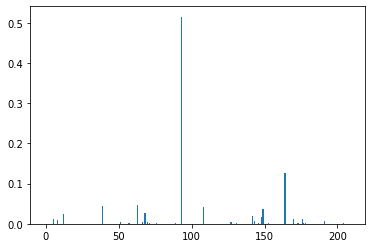

1
EUR/NZD
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00005
Feature: 2, Score: 0.00259
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00007
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01025
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02466
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00017
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00365
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 

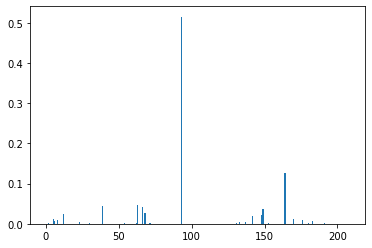

2
NZD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00001
Feature: 7, Score: 0.00047
Feature: 8, Score: 0.01035
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00012
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00075
Feature: 22, Score: 0.00004
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00013
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00003
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00100
Feature: 34, Score: 0.00000
Feature: 35, Score: 

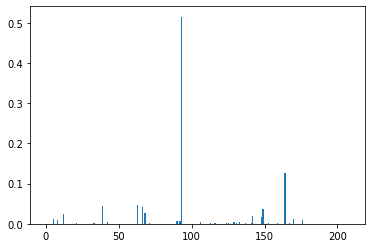

3
NZD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00259
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00028
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00007
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00012
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00002
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 

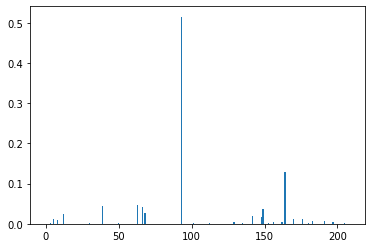

4
EUR/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00040
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00041
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00159
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 

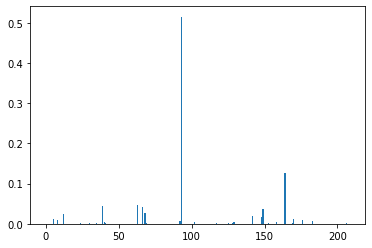

5
EUR/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00021
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00047
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01030
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00005
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00175
Feature: 26, Score: 0.00028
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00031
Feature: 30, Score: 0.00069
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00006
Feature: 34, Score: 0.00364
Feature: 35, Score: 

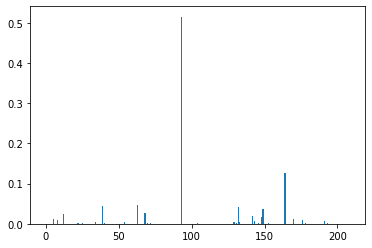

6
AUD/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00006
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00014
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02451
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00007
Feature: 15, Score: 0.00082
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00259
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00017
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00013
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 

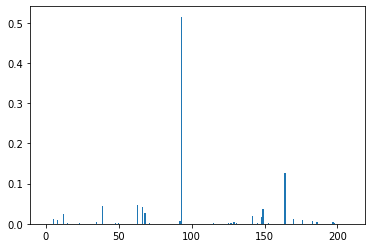

7
EUR/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00066
Feature: 4, Score: 0.00561
Feature: 5, Score: 0.01279
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01019
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00006
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00146
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 

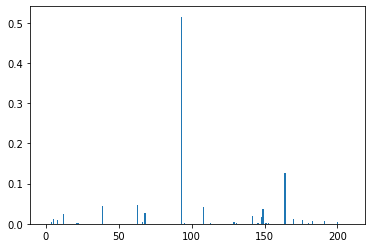

8
NZD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01300
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00089
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00561
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00002
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00001
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00018
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 

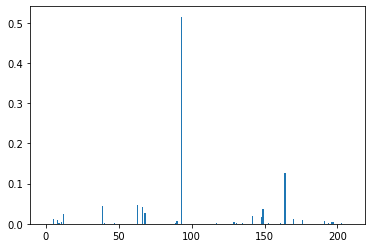

9
GBP/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00001
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00005
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00002
Feature: 34, Score: 0.00000
Feature: 35, Score: 

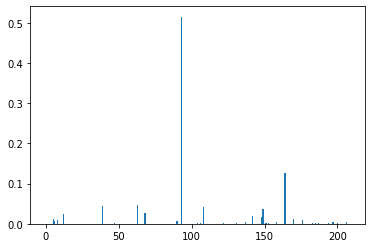

10
NZD/JPY
Feature: 0, Score: 0.00034
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00013
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01267
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00006
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00008
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00086
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00028
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00012
Feature: 29, Score: 0.00108
Feature: 30, Score: 0.04393
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

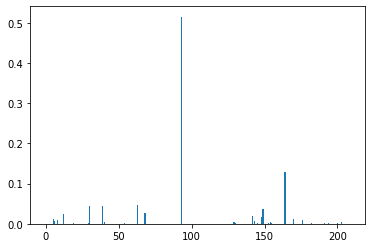

11
GBP/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00008
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00034
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00013
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00561
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00012
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00028
Feature: 34, Score: 0.00000
Feature: 35, Score:

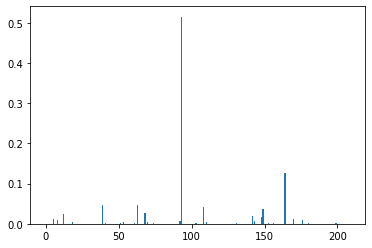

12
GBP/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00086
Feature: 8, Score: 0.01019
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02463
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

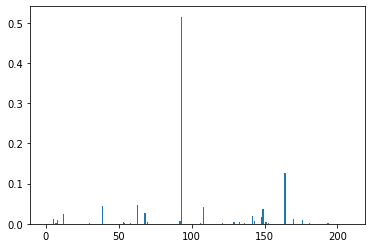

13
EUR/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00009
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00292
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00108
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00009
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00033
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

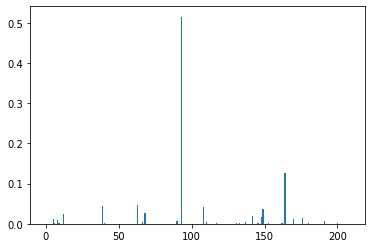

14
NZD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00066
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00005
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00003
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00006
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00080
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00021
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00013
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

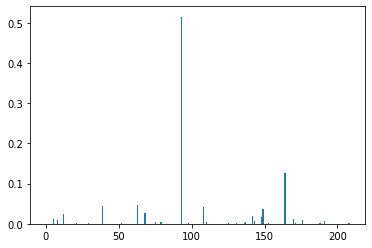

15
CAD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00013
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00034
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00003
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00364
Feature: 35, Score:

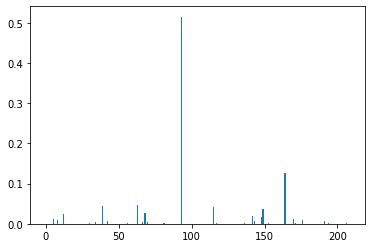

16
EUR/CAD
Feature: 0, Score: 0.00002
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00069
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00100
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00005
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00025
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00013
Feature: 32, Score: 0.00014
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

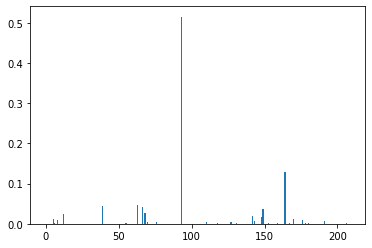

17
GBP/CAD
Feature: 0, Score: 0.00006
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00002
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00013
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00005
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00561
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00002
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00006
Feature: 31, Score: 0.00007
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00086
Feature: 34, Score: 0.00002
Feature: 35, Score:

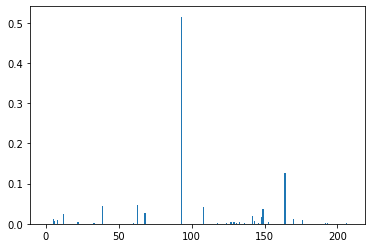

18
AUD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00018
Feature: 7, Score: 0.00022
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00066
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00005
Feature: 14, Score: 0.00006
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00041
Feature: 22, Score: 0.00013
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00082
Feature: 33, Score: 0.00011
Feature: 34, Score: 0.00021
Feature: 35, Score:

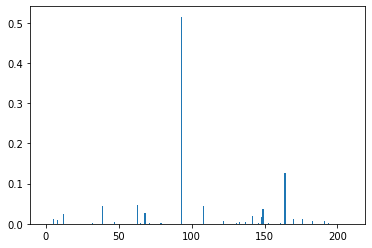

19
CAD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00561
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01153
Feature: 9, Score: 0.00175
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00014
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00028
Feature: 26, Score: 0.00002
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00007
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00005
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00012
Feature: 35, Score:

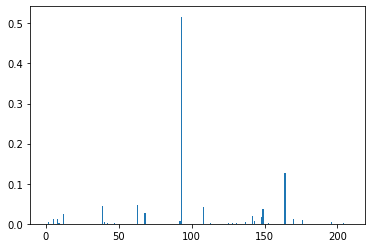

20
GBP/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00082
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00082
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01273
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00085
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00561
Feature: 12, Score: 0.02456
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

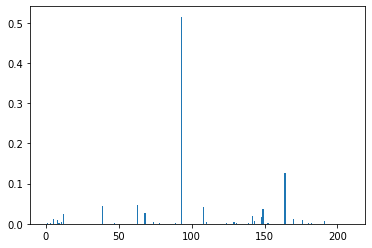

21
CHF/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01267
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00029
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02455
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00006
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00017
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00086
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

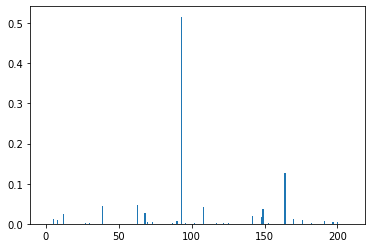

22
EUR/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00013
Feature: 5, Score: 0.01267
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00022
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00006
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00028
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00086
Feature: 20, Score: 0.00006
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00034
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

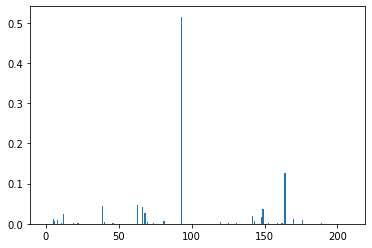

23
USD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00108
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00002
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00082
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00066
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00013
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00151
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00007
Feature: 35, Score:

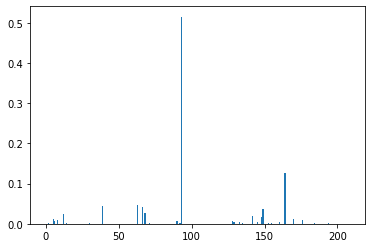

24
AUD/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00026
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00006
Feature: 7, Score: 0.00006
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00034
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00012
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00006
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00018
Feature: 33, Score: 0.00013
Feature: 34, Score: 0.00000
Feature: 35, Score:

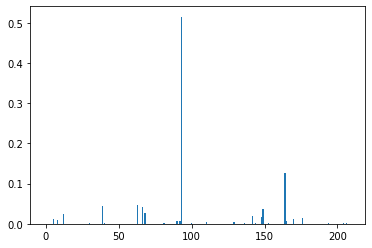

25
GBP/USD
Feature: 0, Score: 0.00066
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00094
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00001
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00007
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00034
Feature: 21, Score: 0.00047
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00013
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00003
Feature: 33, Score: 0.00018
Feature: 34, Score: 0.00000
Feature: 35, Score:

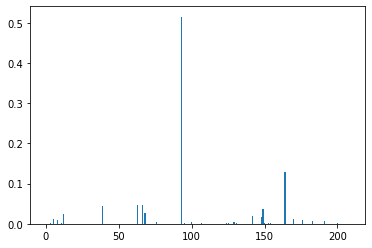

26
GBP/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00041
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00561
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00017
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00006
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00086
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00034
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00013
Feature: 34, Score: 0.00000
Feature: 35, Score:

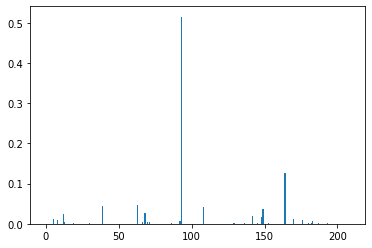

27
EUR/CHF
Feature: 0, Score: 0.00088
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00043
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00006
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00259
Feature: 17, Score: 0.00021
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00012
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00009
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00028
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00005
Feature: 32, Score: 0.00002
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

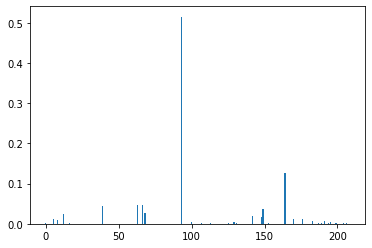

28
USD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00002
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01448
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00014
Feature: 12, Score: 0.02451
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00008
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00034
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00108
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00069
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

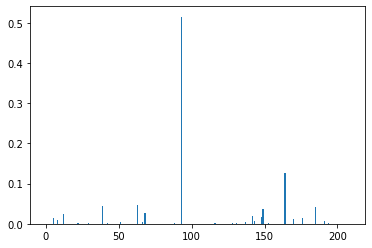

29
EUR/CAD
Feature: 0, Score: 0.00017
Feature: 1, Score: 0.00103
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01279
Feature: 6, Score: 0.00001
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00041
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00014
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00003
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00012
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00028
Feature: 30, Score: 0.00013
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00018
Feature: 33, Score: 0.00007
Feature: 34, Score: 0.00000
Feature: 35, Score:

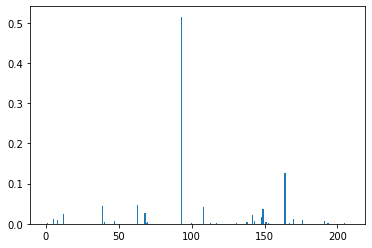

30
CAD/CHF
Feature: 0, Score: 0.00007
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01035
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00012
Feature: 11, Score: 0.00014
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00022
Feature: 19, Score: 0.00013
Feature: 20, Score: 0.00012
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.04266
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00003
Feature: 30, Score: 0.00006
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

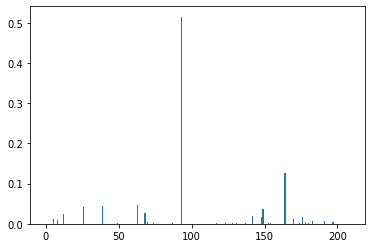

31
GBP/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00008
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00006
Feature: 11, Score: 0.00661
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00069
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00281
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00030
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00018
Feature: 34, Score: 0.00000
Feature: 35, Score:

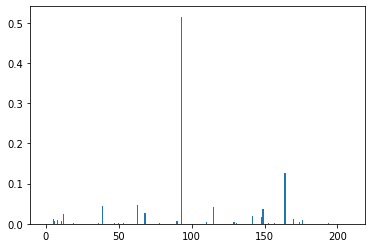

32
AUD/USD
Feature: 0, Score: 0.00017
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00034
Feature: 3, Score: 0.00013
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01268
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00006
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00088
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00016
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

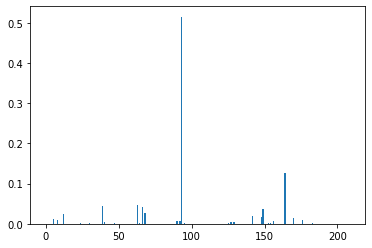

33
EUR/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00013
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00013
Feature: 11, Score: 0.00079
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00009
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00003
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00018
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

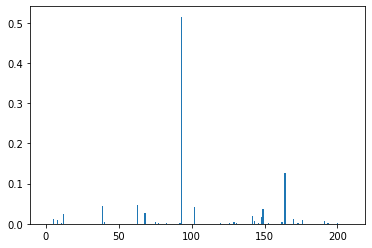

34
USD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00007
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00003
Feature: 5, Score: 0.01272
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00012
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00008
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00002
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00017
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

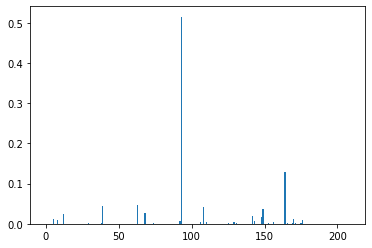

35
EUR/GBP
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00108
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00006
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00070
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00017
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00003
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00154
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00002
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00012
Feature: 35, Score:

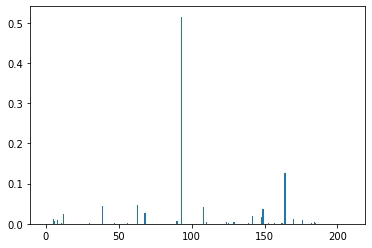

36
AUD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00009
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01352
Feature: 6, Score: 0.00083
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00013
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00021
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00030
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00007
Feature: 34, Score: 0.00000
Feature: 35, Score:

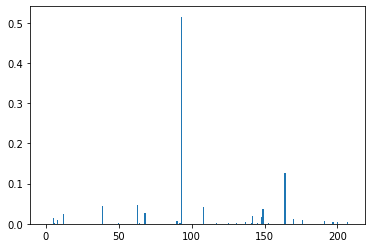

37
NZD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00002
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01272
Feature: 6, Score: 0.00007
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01026
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00013
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00029
Feature: 29, Score: 0.00175
Feature: 30, Score: 0.00041
Feature: 31, Score: 0.00135
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00017
Feature: 34, Score: 0.00364
Feature: 35, Score:

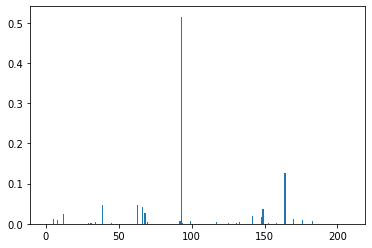

38
CHF/JPY
Feature: 0, Score: 0.00007
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01030
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00561
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00007
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00259
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00006
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00108
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00022
Feature: 34, Score: 0.00000
Feature: 35, Score:

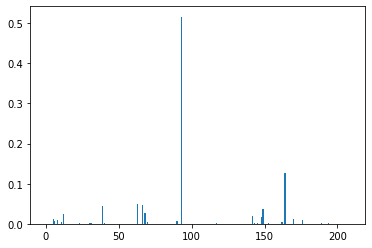

39
AUD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01041
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00259
Feature: 20, Score: 0.00034
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00561
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00013
Feature: 27, Score: 0.00028
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00101
Feature: 34, Score: 0.00028
Feature: 35, Score:

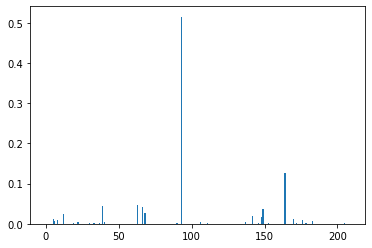

40
EUR/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.04266
Feature: 7, Score: 0.00034
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00041
Feature: 12, Score: 0.02467
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00082
Feature: 18, Score: 0.00006
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00585
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00006
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00002
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00028
Feature: 33, Score: 0.00022
Feature: 34, Score: 0.00000
Feature: 35, Score:

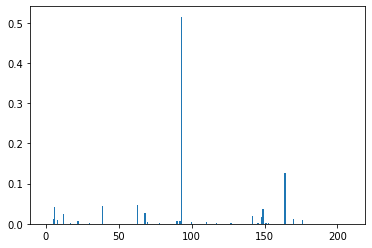

41
AUD/CHF
Feature: 0, Score: 0.00022
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00090
Feature: 10, Score: 0.00005
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00007
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00138
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

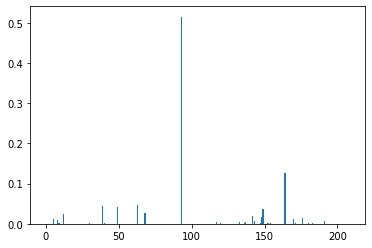

42
NZD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00259
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00034
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02498
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00006
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00364
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00001
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

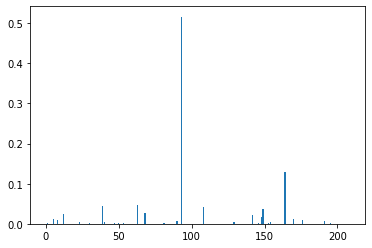

43
EUR/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00561
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00006
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00041
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00026
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00028
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00022
Feature: 34, Score: 0.00000
Feature: 35, Score:

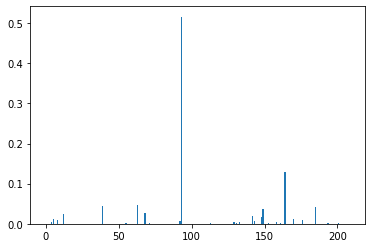

44
AUD/USD
Feature: 0, Score: 0.00012
Feature: 1, Score: 0.00189
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00008
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00006
Feature: 31, Score: 0.00018
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00000
Feature: 35, Score:

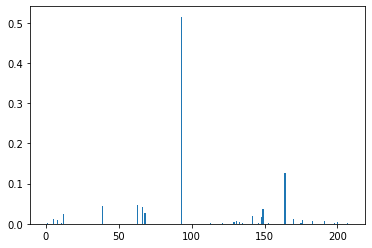

45
USD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00041
Feature: 7, Score: 0.00017
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00002
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00003
Feature: 20, Score: 0.00009
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00236
Feature: 25, Score: 0.00007
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00006
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

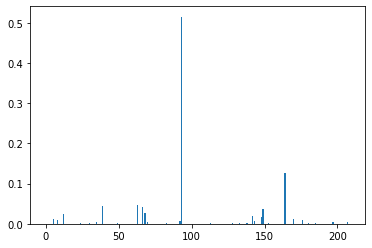

46
USD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00066
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00025
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01039
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00025
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00007
Feature: 17, Score: 0.00082
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00012
Feature: 28, Score: 0.00175
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00009
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00019
Feature: 35, Score:

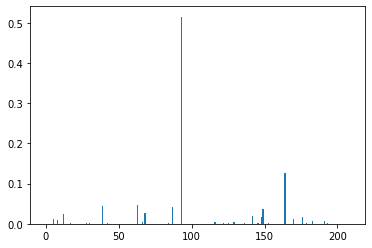

47
CAD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00005
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00066
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00108
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00028
Feature: 26, Score: 0.00002
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

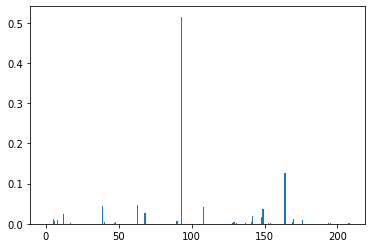

48
USD/JPY
Feature: 0, Score: 0.00023
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00007
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01279
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01020
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00175
Feature: 12, Score: 0.02478
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00013
Feature: 20, Score: 0.00006
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00012
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

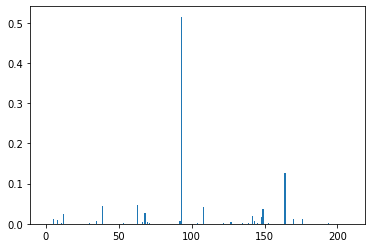

49
GBP/JPY
Feature: 0, Score: 0.00002
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00003
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00013
Feature: 8, Score: 0.01051
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00005
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00003
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00025
Feature: 27, Score: 0.00082
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00086
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

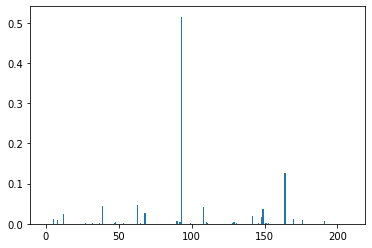

50
GBP/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00175
Feature: 2, Score: 0.00017
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00022
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00007
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00003
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00017
Feature: 23, Score: 0.00364
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00001
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

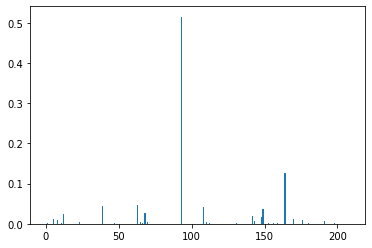

51
EUR/GBP
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00108
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00001
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01153
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00041
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00017
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00003
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00007
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00006
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00082
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00028
Feature: 34, Score: 0.00000
Feature: 35, Score:

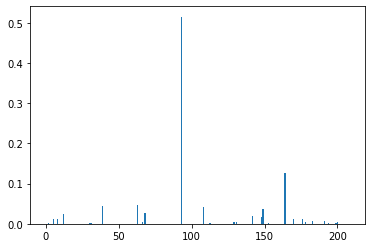

52
GBP/USD
Feature: 0, Score: 0.00018
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00066
Feature: 4, Score: 0.00561
Feature: 5, Score: 0.01273
Feature: 6, Score: 0.00002
Feature: 7, Score: 0.00082
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00034
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00005
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00017
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00086
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00014
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

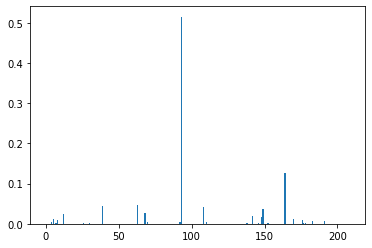

53
NZD/CHF
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00005
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00069
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00005
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00797
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00259
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00006
Feature: 28, Score: 0.00021
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

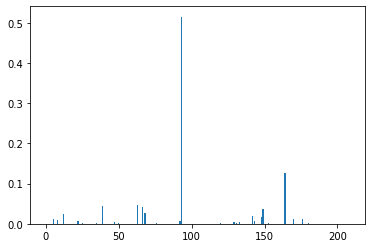

54
GBP/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00731
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01030
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00108
Feature: 18, Score: 0.00025
Feature: 19, Score: 0.00007
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00022
Feature: 29, Score: 0.00005
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00005
Feature: 32, Score: 0.00086
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

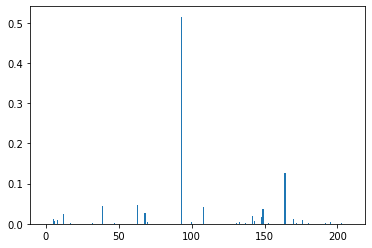

55
AUD/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00070
Feature: 2, Score: 0.00066
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00003
Feature: 5, Score: 0.01279
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00006
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00002
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00047
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00139
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00006
Feature: 35, Score:

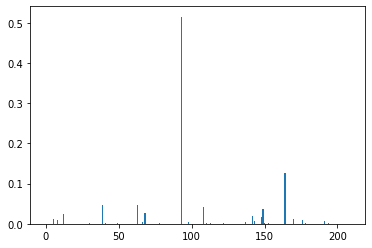

56
AUD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.01382
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00003
Feature: 12, Score: 0.02456
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00017
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00100
Feature: 34, Score: 0.00000
Feature: 35, Score:

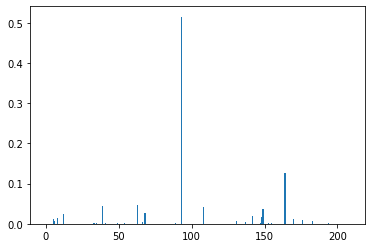

57
EUR/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02455
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00001
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00002
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

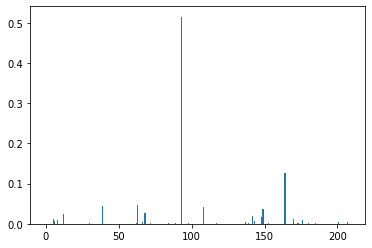

58
NZD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00013
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00018
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01024
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00561
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00012
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00153
Feature: 21, Score: 0.00082
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00086
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00047
Feature: 35, Score:

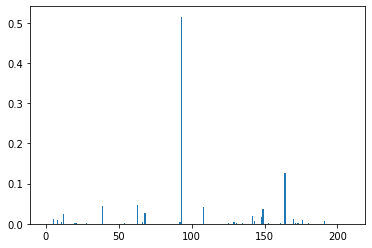

59
NZD/CAD
Feature: 0, Score: 0.00041
Feature: 1, Score: 0.00006
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00013
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00259
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00025
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00007
Feature: 30, Score: 0.00139
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

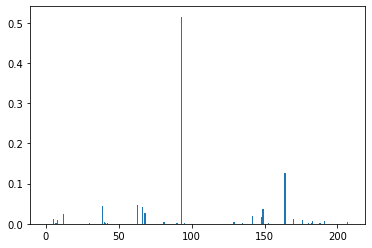

60
EUR/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00002
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00720
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00561
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00017
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00025
Feature: 27, Score: 0.00006
Feature: 28, Score: 0.00009
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

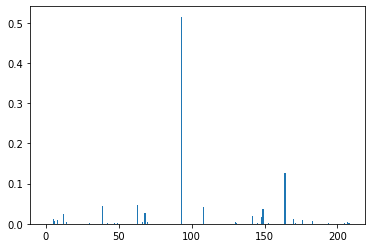

61
AUD/USD
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00003
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00013
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00013
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

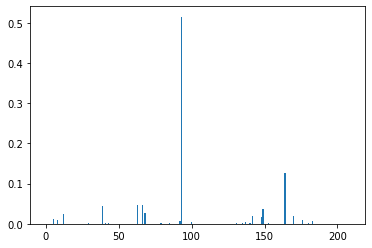

62
GBP/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00034
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00002
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00013
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00005
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00001
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00100
Feature: 34, Score: 0.00108
Feature: 35, Score:

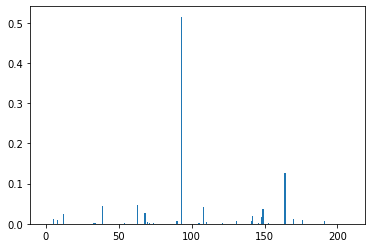

63
CHF/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00005
Feature: 4, Score: 0.00002
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00009
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02708
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00003
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00022
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00003
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.00007
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00144
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00006
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

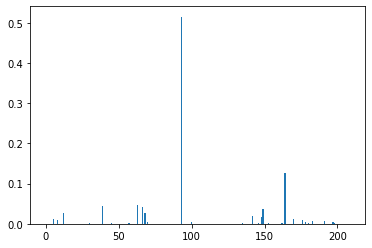

64
EUR/CAD
Feature: 0, Score: 0.00013
Feature: 1, Score: 0.00009
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00012
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00013
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00014
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00066
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00236
Feature: 25, Score: 0.00047
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00087
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00028
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

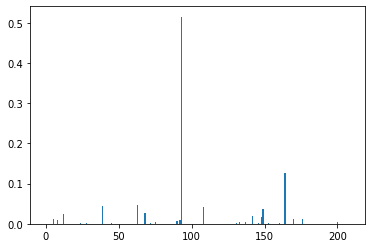

65
CAD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01300
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00573
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00029
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00008
Feature: 26, Score: 0.04266
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

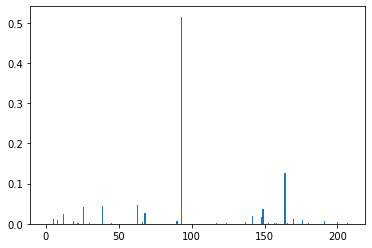

66
CAD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01382
Feature: 9, Score: 0.00080
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02497
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00007
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00012
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00012
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00028
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00013
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00006
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00008
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

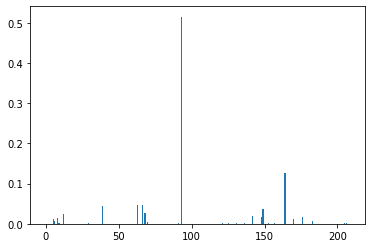

67
NZD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00047
Feature: 2, Score: 0.00066
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00021
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02453
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00137
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.04266
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00025
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

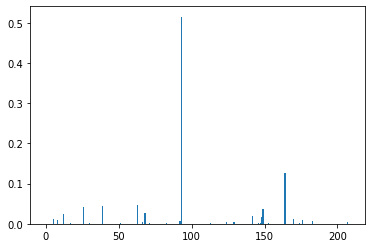

68
GBP/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00561
Feature: 3, Score: 0.00003
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02463
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00259
Feature: 17, Score: 0.00108
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00003
Feature: 20, Score: 0.00014
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00066
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.04395
Feature: 31, Score: 0.00005
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00006
Feature: 35, Score:

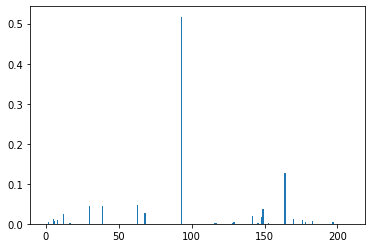

69
USD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00002
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00034
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.01020
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02453
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00041
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00002
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00012
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

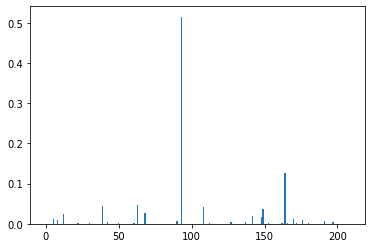

70
EUR/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00017
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00021
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00005
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00013
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00067
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00012
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00022
Feature: 35, Score:

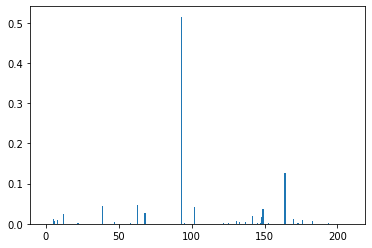

71
EUR/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00008
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00012
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00007
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00177
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00086
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00041
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00100
Feature: 34, Score: 0.00000
Feature: 35, Score:

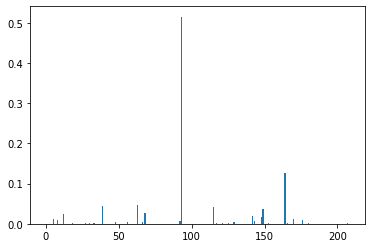

72
EUR/GBP
Feature: 0, Score: 0.00175
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00012
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00108
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00012
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00003
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00086
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00365
Feature: 35, Score:

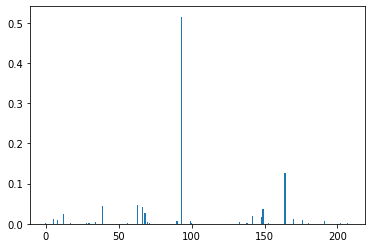

73
USD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00008
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00720
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02453
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00176
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00034
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00006
Feature: 30, Score: 0.00195
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

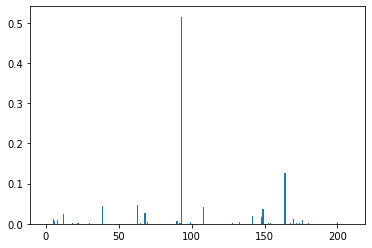

74
GBP/CHF
Feature: 0, Score: 0.00018
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00003
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00007
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00074
Feature: 22, Score: 0.00002
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00012
Feature: 26, Score: 0.00017
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00003
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00006
Feature: 35, Score:

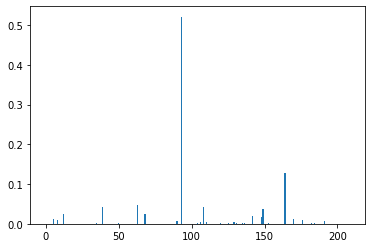

75
CHF/JPY
Feature: 0, Score: 0.00013
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00018
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00009
Feature: 11, Score: 0.00014
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00069
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00005
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00013
Feature: 24, Score: 0.00082
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00026
Feature: 27, Score: 0.00089
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

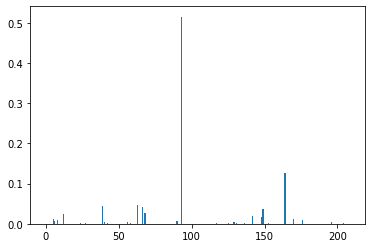

76
CAD/JPY
Feature: 0, Score: 0.00021
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00013
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00736
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01035
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00003
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00007
Feature: 25, Score: 0.00014
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00005
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

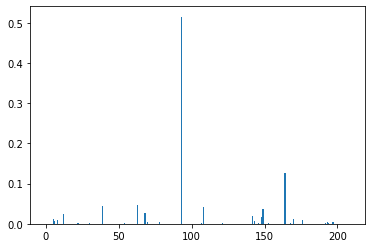

77
AUD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01022
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02467
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00017
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00013
Feature: 33, Score: 0.00012
Feature: 34, Score: 0.00000
Feature: 35, Score:

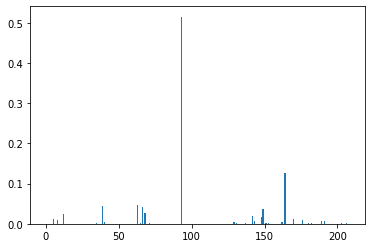

78
NZD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00006
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00013
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00034
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00016
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00259
Feature: 19, Score: 0.00002
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00078
Feature: 25, Score: 0.00082
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00006
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

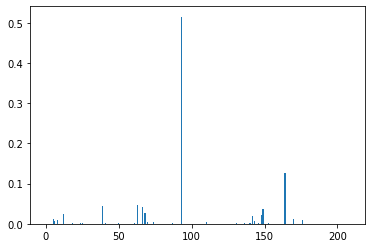

79
GBP/NZD
Feature: 0, Score: 0.00034
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00073
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01279
Feature: 6, Score: 0.00028
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02466
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00082
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

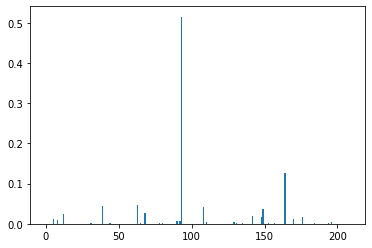

80
GBP/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00017
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00002
Feature: 15, Score: 0.00016
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00002
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00017
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00028
Feature: 34, Score: 0.00000
Feature: 35, Score:

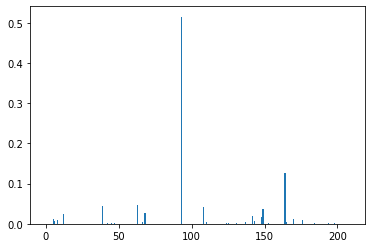

81
USD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00737
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00006
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00016
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00029
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00561
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00022
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00002
Feature: 34, Score: 0.00000
Feature: 35, Score:

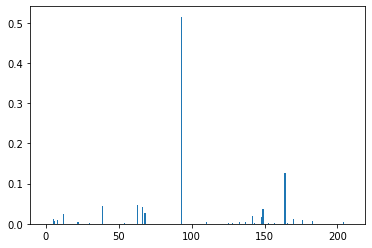

82
AUD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00247
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01273
Feature: 6, Score: 0.00766
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00007
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00046
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00018
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

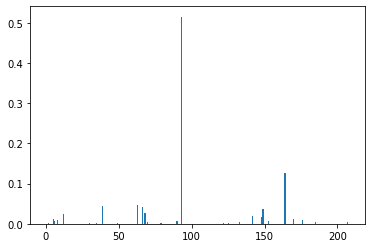

83
EUR/CHF
Feature: 0, Score: 0.00022
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00003
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01193
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00016
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00142
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00259
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00007
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

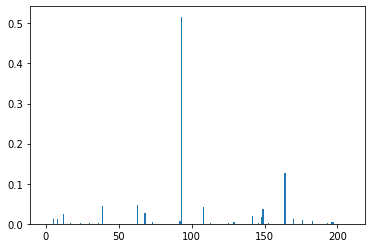

84
GBP/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00013
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00561
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00009
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00136
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00013
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

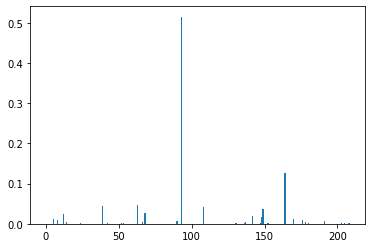

85
EUR/CHF
Feature: 0, Score: 0.00002
Feature: 1, Score: 0.00008
Feature: 2, Score: 0.00078
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01024
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00003
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00012
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00021
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00002
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00157
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00003
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00012
Feature: 35, Score:

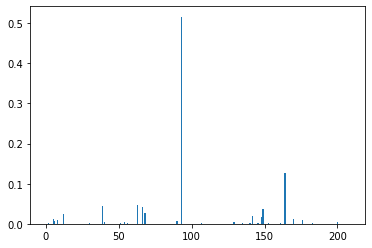

86
GBP/AUD
Feature: 0, Score: 0.00135
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00013
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00013
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00003
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

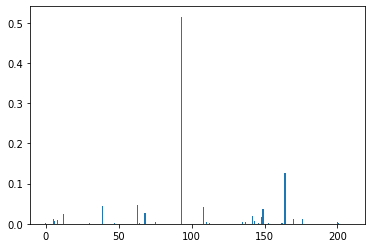

87
EUR/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00189
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00003
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00034
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00013
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00006
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

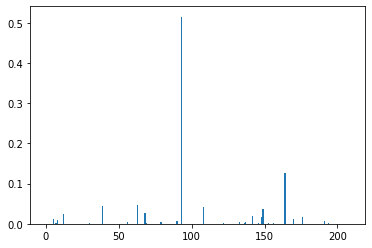

88
EUR/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00003
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00744
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00175
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00237
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

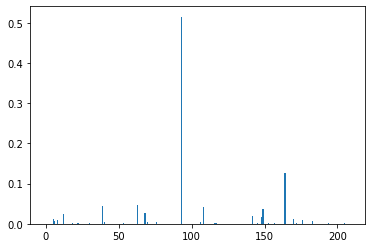

89
AUD/USD
Feature: 0, Score: 0.00007
Feature: 1, Score: 0.00002
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00017
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00002
Feature: 15, Score: 0.00006
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00188
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00025
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00003
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00195
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00101
Feature: 34, Score: 0.00000
Feature: 35, Score:

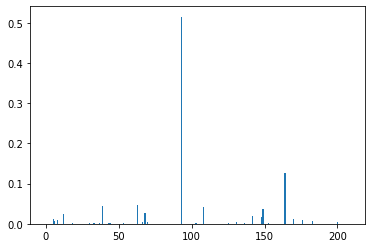

90
NZD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00028
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.04266
Feature: 8, Score: 0.01030
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00259
Feature: 11, Score: 0.00013
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00029
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00002
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00022
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00167
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

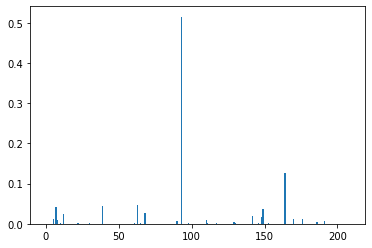

91
GBP/USD
Feature: 0, Score: 0.00012
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00025
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

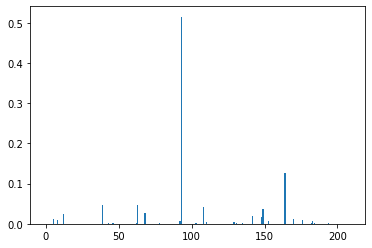

92
GBP/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00005
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00004
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00008
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00310
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

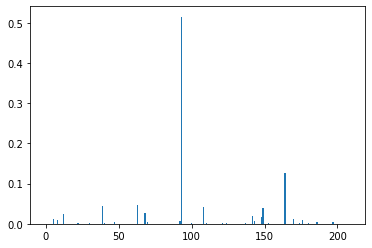

93
EUR/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00099
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00753
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00017
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00006
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00006
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00003
Feature: 29, Score: 0.00175
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00003
Feature: 35, Score:

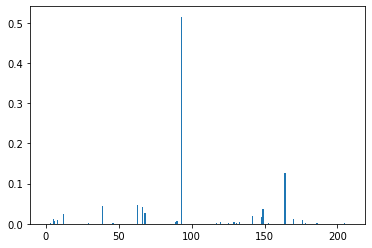

94
AUD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00259
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00041
Feature: 8, Score: 0.01024
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00561
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00012
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00108
Feature: 35, Score:

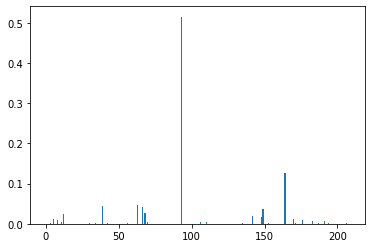

95
NZD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00075
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00110
Feature: 25, Score: 0.00007
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00012
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00017
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00006
Feature: 35, Score:

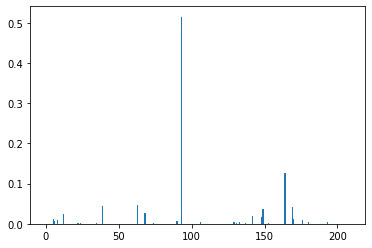

96
EUR/USD
Feature: 0, Score: 0.00014
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00006
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00720
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01026
Feature: 9, Score: 0.00028
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00006
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00017
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00012
Feature: 29, Score: 0.00005
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00018
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00012
Feature: 35, Score:

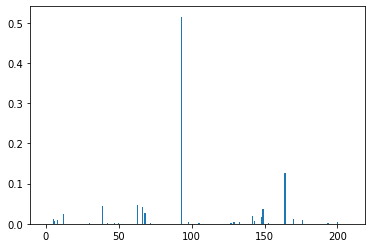

97
USD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00041
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00135
Feature: 18, Score: 0.00022
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00066
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00002
Feature: 27, Score: 0.00007
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

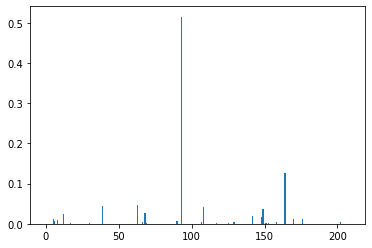

98
USD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00034
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00018
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00017
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00006
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00006
Feature: 17, Score: 0.00006
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00012
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00175
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00003
Feature: 35, Score:

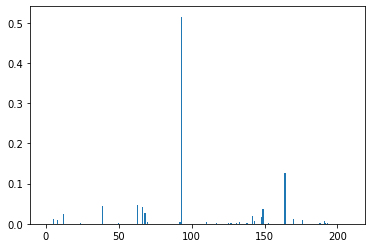

99
EUR/USD
Feature: 0, Score: 0.00034
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00019
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00587
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00012
Feature: 26, Score: 0.00013
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00002
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00008
Feature: 34, Score: 0.00000
Feature: 35, Score:

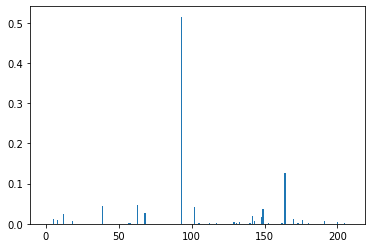

100
CAD/CHF
Feature: 0, Score: 0.00022
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01273
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01382
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00561
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00003
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00007
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00082
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

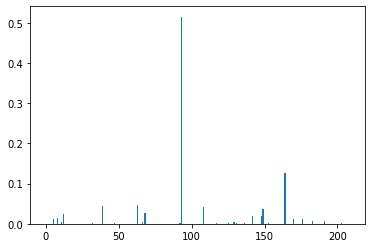

101
GBP/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00017
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00100
Feature: 7, Score: 0.00005
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.00066
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00012
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00006
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00028
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00237
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00007
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00000
Feature: 35, Score

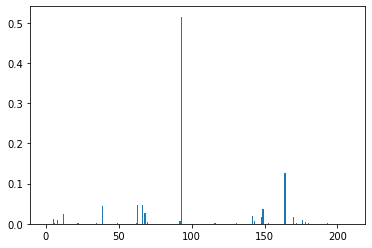

102
EUR/GBP
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00028
Feature: 8, Score: 0.01023
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00003
Feature: 12, Score: 0.02451
Feature: 13, Score: 0.00017
Feature: 14, Score: 0.00002
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00109
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00019
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

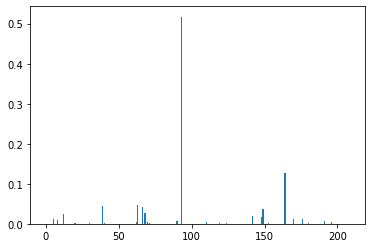

103
AUD/NZD
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00041
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00013
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00726
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00027
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00013
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00008
Feature: 32, Score: 0.00069
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

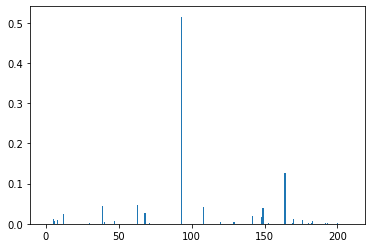

104
GBP/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01035
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00013
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00016
Feature: 19, Score: 0.00022
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00083
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00006
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00108
Feature: 31, Score: 0.00017
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

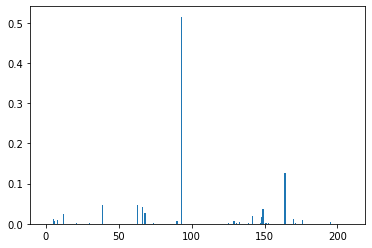

105
USD/CHF
Feature: 0, Score: 0.00012
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01355
Feature: 6, Score: 0.00721
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00108
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00276
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00007
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00006
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

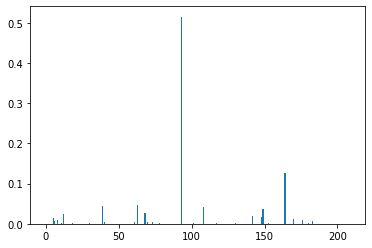

106
USD/JPY
Feature: 0, Score: 0.00086
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00100
Feature: 7, Score: 0.00005
Feature: 8, Score: 0.01036
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00018
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00002
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00082
Feature: 28, Score: 0.00012
Feature: 29, Score: 0.00008
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

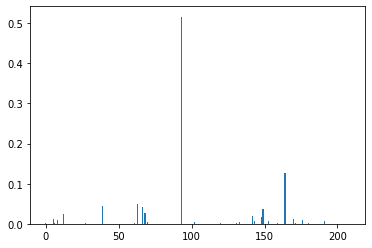

107
GBP/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00002
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00017
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00002
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00009
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00034
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00086
Feature: 27, Score: 0.00012
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00129
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

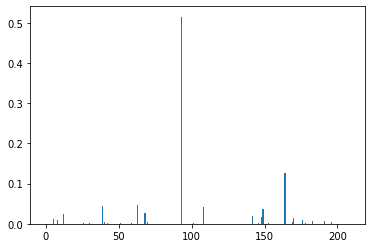

108
EUR/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00028
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00066
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01271
Feature: 6, Score: 0.00820
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00267
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00012
Feature: 31, Score: 0.00017
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

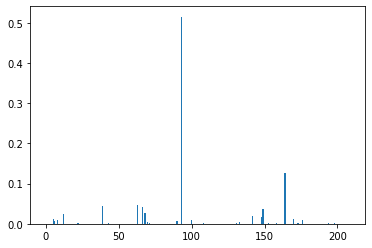

109
EUR/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00819
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01024
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00066
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00175
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00108
Feature: 35, Score

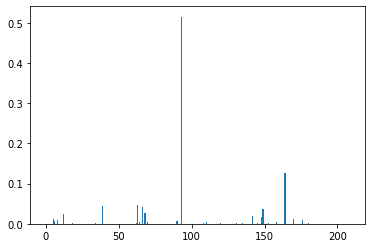

110
EUR/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00066
Feature: 3, Score: 0.00018
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00003
Feature: 26, Score: 0.00006
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

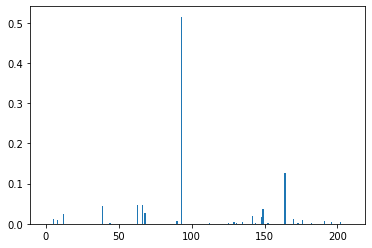

111
NZD/CHF
Feature: 0, Score: 0.00066
Feature: 1, Score: 0.00003
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00003
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00175
Feature: 30, Score: 0.00167
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

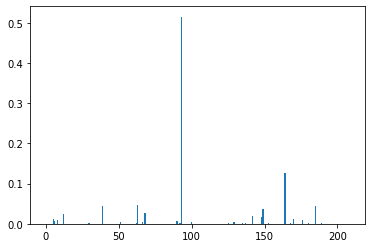

112
NZD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00041
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00108
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02451
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00175
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00029
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00005
Feature: 22, Score: 0.00012
Feature: 23, Score: 0.00364
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.04266
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00127
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00000
Feature: 35, Score

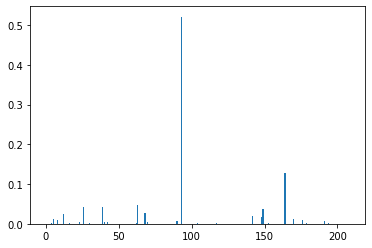

113
EUR/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00019
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02452
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00082
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00364
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00025
Feature: 27, Score: 0.00086
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00017
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00012
Feature: 34, Score: 0.00000
Feature: 35, Score

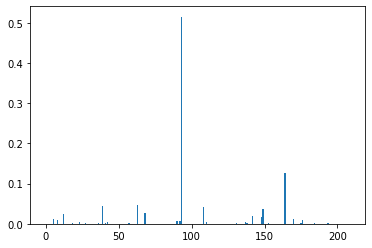

114
CAD/JPY
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00034
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00013
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01030
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00016
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00009
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00364
Feature: 24, Score: 0.00236
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00028
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

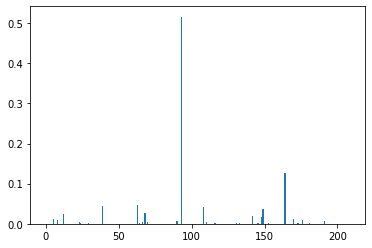

115
CAD/CHF
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00005
Feature: 2, Score: 0.00008
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01271
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00007
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00013
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00018
Feature: 24, Score: 0.00017
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00108
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00001
Feature: 35, Score

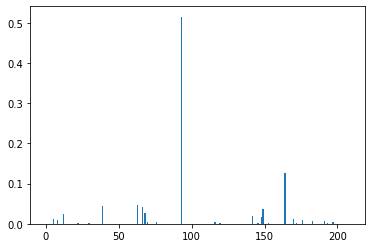

116
AUD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00008
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00006
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00016
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00028
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00009
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00006
Feature: 28, Score: 0.00047
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00127
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

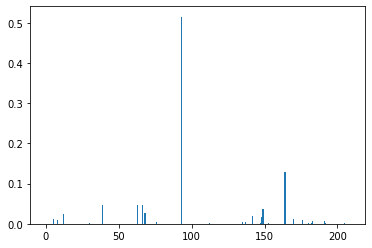

117
NZD/USD
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00008
Feature: 2, Score: 0.00066
Feature: 3, Score: 0.00003
Feature: 4, Score: 0.00561
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00012
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00082
Feature: 22, Score: 0.00028
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00013
Feature: 27, Score: 0.00020
Feature: 28, Score: 0.00069
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

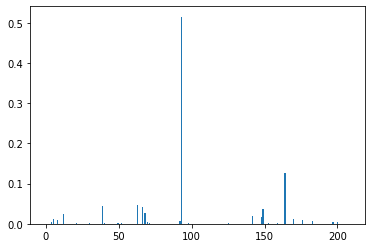

118
EUR/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00561
Feature: 3, Score: 0.00002
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01272
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00076
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00013
Feature: 15, Score: 0.00010
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00066
Feature: 23, Score: 0.00175
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00012
Feature: 26, Score: 0.00001
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

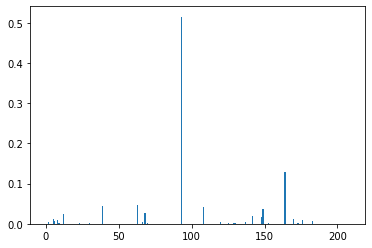

119
GBP/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00002
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00013
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00014
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00041
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00002
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00028
Feature: 17, Score: 0.00013
Feature: 18, Score: 0.00175
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00034
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00236
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00022
Feature: 34, Score: 0.00000
Feature: 35, Score

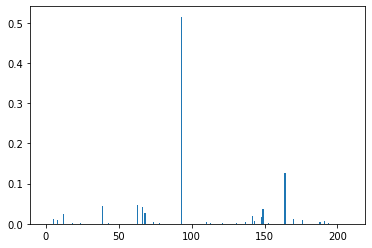

120
AUD/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01300
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00025
Feature: 11, Score: 0.00066
Feature: 12, Score: 0.02625
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00003
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00135
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00098
Feature: 34, Score: 0.00002
Feature: 35, Score

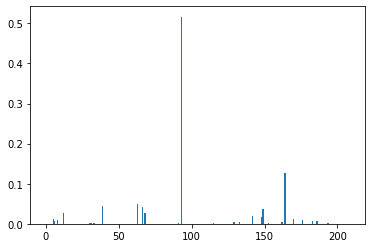

121
NZD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.00003
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00017
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00001
Feature: 22, Score: 0.00006
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00006
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00086
Feature: 33, Score: 0.00012
Feature: 34, Score: 0.00000
Feature: 35, Score

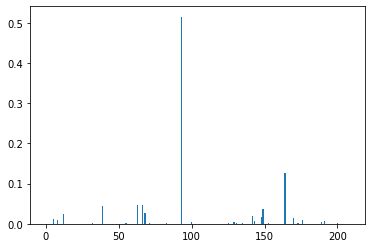

122
USD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00005
Feature: 3, Score: 0.00007
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00012
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.00175
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00009
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00004
Feature: 34, Score: 0.00000
Feature: 35, Score

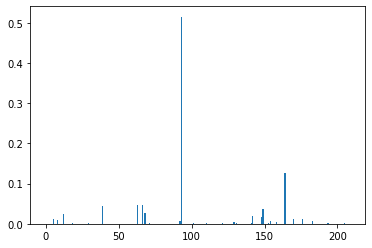

123
CAD/JPY
Feature: 0, Score: 0.00034
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.01165
Feature: 9, Score: 0.00006
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00005
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00108
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00139
Feature: 31, Score: 0.00002
Feature: 32, Score: 0.00006
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

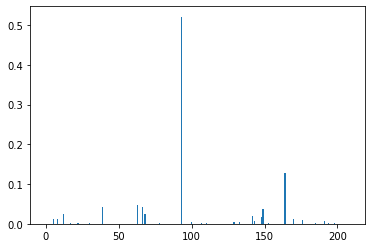

124
USD/JPY
Feature: 0, Score: 0.00007
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00025
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00731
Feature: 7, Score: 0.00561
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00101
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00024
Feature: 29, Score: 0.00055
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00094
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

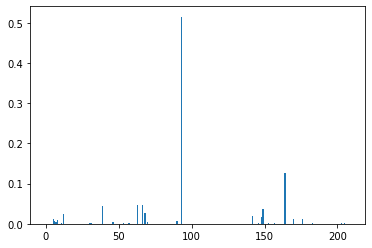

125
GBP/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00013
Feature: 3, Score: 0.00003
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00009
Feature: 8, Score: 0.01039
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.02463
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00012
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00002
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00107
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

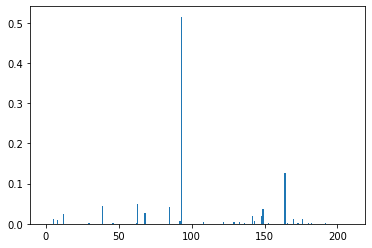

126
GBP/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00046
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00008
Feature: 11, Score: 0.00067
Feature: 12, Score: 0.02708
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00017
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00022
Feature: 20, Score: 0.00003
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00047
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00012
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

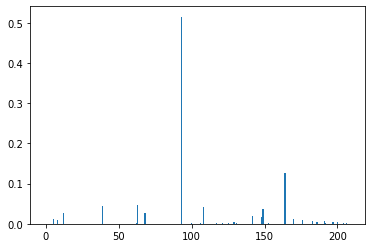

127
AUD/USD
Feature: 0, Score: 0.00006
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00012
Feature: 3, Score: 0.00009
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00005
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00021
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00047
Feature: 25, Score: 0.00003
Feature: 26, Score: 0.00028
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00102
Feature: 34, Score: 0.00003
Feature: 35, Score

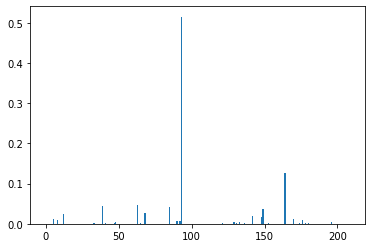

128
AUD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00002
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00013
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00002
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00028
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

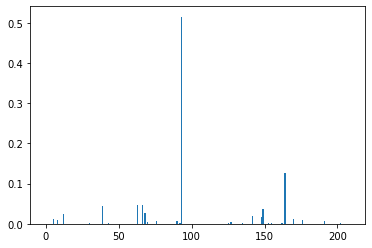

129
EUR/GBP
Feature: 0, Score: 0.00025
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00013
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00003
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00003
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00053
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00012
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00175
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00012
Feature: 35, Score

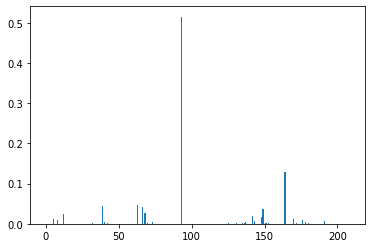

130
EUR/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00002
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01389
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00006
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00013
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00028
Feature: 28, Score: 0.00108
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00008
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

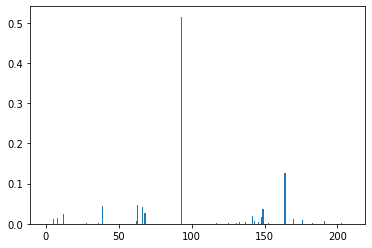

131
GBP/CAD
Feature: 0, Score: 0.00175
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00005
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01040
Feature: 9, Score: 0.00074
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00002
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00561
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00259
Feature: 28, Score: 0.00005
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

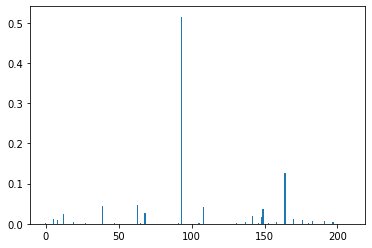

132
NZD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00007
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00006
Feature: 8, Score: 0.01099
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00003
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00035
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00027
Feature: 25, Score: 0.00259
Feature: 26, Score: 0.00016
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00127
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

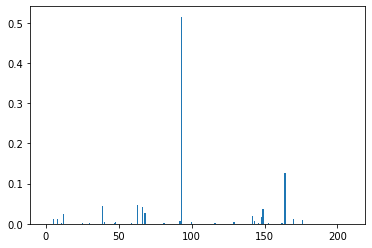

133
AUD/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00012
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01023
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02455
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00013
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00189
Feature: 23, Score: 0.00018
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00008
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00017
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00005
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

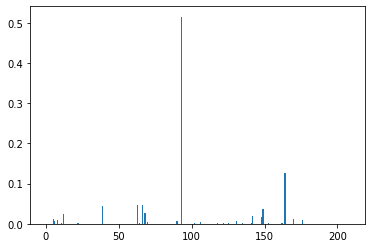

134
USD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00003
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00005
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00561
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00002
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00139
Feature: 31, Score: 0.00364
Feature: 32, Score: 0.00002
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00022
Feature: 35, Score

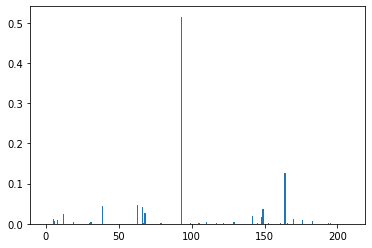

135
USD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00002
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00006
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00359
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02456
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00012
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00025
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00006
Feature: 25, Score: 0.00042
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

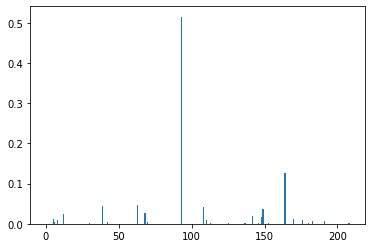

136
EUR/AUD
Feature: 0, Score: 0.00041
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00003
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00012
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00047
Feature: 14, Score: 0.00008
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00016
Feature: 26, Score: 0.00001
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00020
Feature: 30, Score: 0.00002
Feature: 31, Score: 0.00006
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

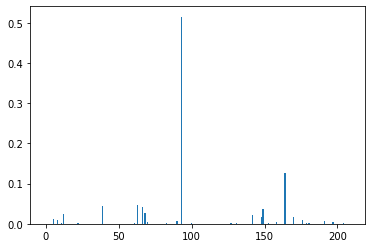

137
EUR/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00047
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02466
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00018
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00006
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00001
Feature: 35, Score

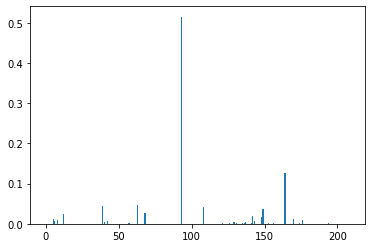

138
GBP/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00003
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00025
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00047
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00385
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

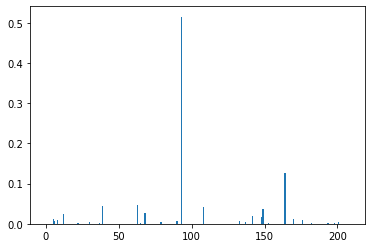

139
EUR/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00007
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00012
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00017
Feature: 21, Score: 0.00013
Feature: 22, Score: 0.00086
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00091
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00009
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

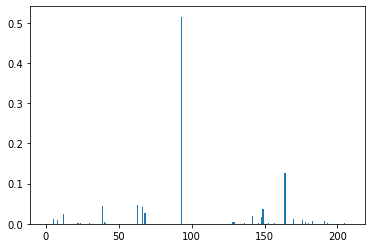

140
GBP/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00018
Feature: 10, Score: 0.00008
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00002
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00086
Feature: 29, Score: 0.00002
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

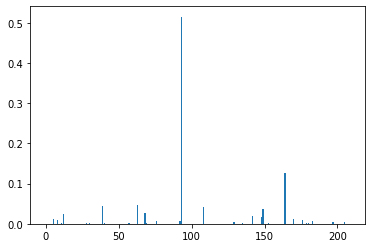

141
CHF/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00017
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00017
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00005
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00009
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00001
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

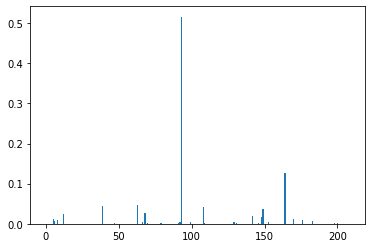

142
NZD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00034
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00086
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00005
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02480
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00069
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00006
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00377
Feature: 24, Score: 0.00047
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00175
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00385
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

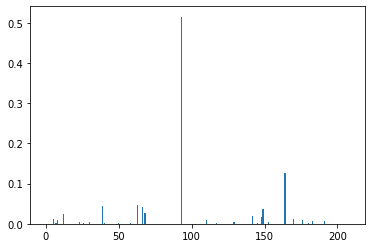

143
AUD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00175
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01279
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02471
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00364
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00002
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

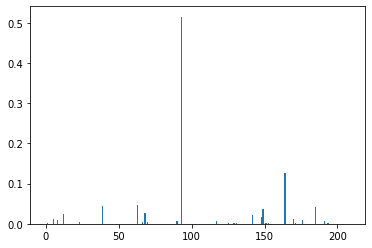

144
EUR/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01352
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01382
Feature: 9, Score: 0.00108
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00008
Feature: 12, Score: 0.02478
Feature: 13, Score: 0.00021
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00028
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00001
Feature: 22, Score: 0.00014
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00012
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00261
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00005
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00013
Feature: 32, Score: 0.00175
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

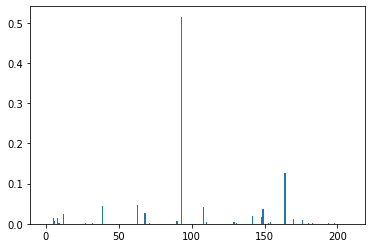

145
EUR/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00175
Feature: 2, Score: 0.00012
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01020
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00086
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00013
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00013
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00047
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00022
Feature: 35, Score

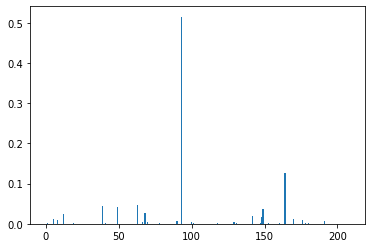

146
NZD/CHF
Feature: 0, Score: 0.00025
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00013
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00159
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00264
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00101
Feature: 34, Score: 0.00000
Feature: 35, Score

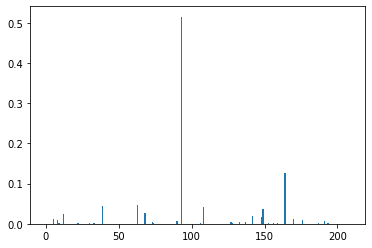

147
CAD/JPY
Feature: 0, Score: 0.00135
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00013
Feature: 3, Score: 0.00006
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00108
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00302
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00008
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00107
Feature: 34, Score: 0.00000
Feature: 35, Score

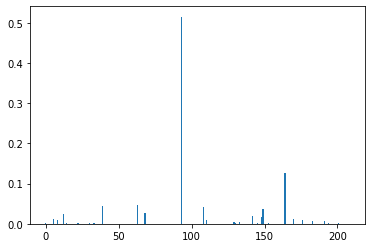

148
EUR/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00018
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00259
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00021
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00046
Feature: 21, Score: 0.00082
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00014
Feature: 24, Score: 0.00236
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00003
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00001
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

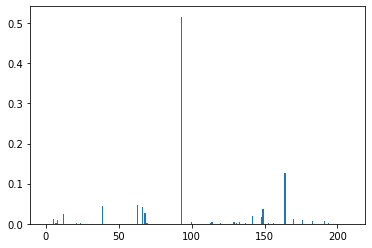

149
CAD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00003
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00001
Feature: 7, Score: 0.00013
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00016
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00005
Feature: 22, Score: 0.00014
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00000
Feature: 35, Score

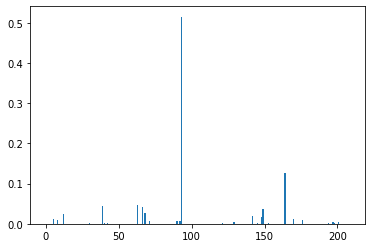

150
EUR/JPY
Feature: 0, Score: 0.00175
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00034
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00006
Feature: 7, Score: 0.00006
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00118
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00012
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00013
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

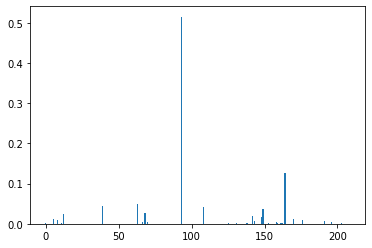

151
NZD/CAD
Feature: 0, Score: 0.00259
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00019
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01275
Feature: 6, Score: 0.00722
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00079
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02455
Feature: 13, Score: 0.00007
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00013
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00047
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00122
Feature: 35, Score

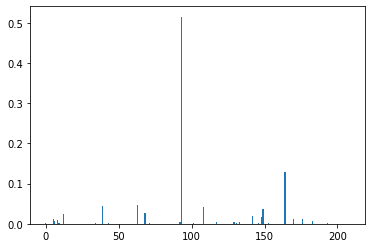

152
GBP/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00136
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00002
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00034
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00022
Feature: 20, Score: 0.00014
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00003
Feature: 24, Score: 0.00082
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

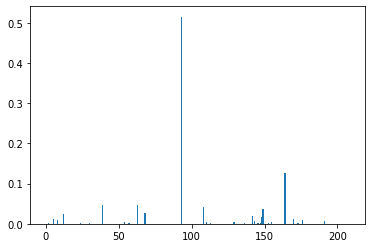

153
AUD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00002
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01193
Feature: 9, Score: 0.00013
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00012
Feature: 16, Score: 0.00018
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00066
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00005
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

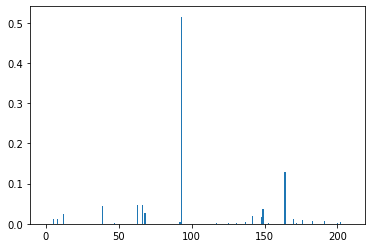

154
GBP/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00006
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00028
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00002
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00069
Feature: 29, Score: 0.00012
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00007
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00028
Feature: 35, Score

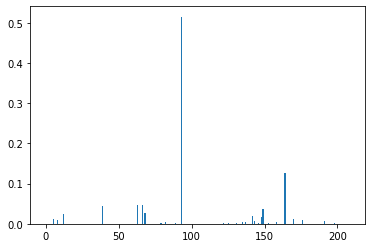

155
GBP/CAD
Feature: 0, Score: 0.00296
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00561
Feature: 3, Score: 0.00013
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00722
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00018
Feature: 16, Score: 0.00017
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00024
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00021
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00016
Feature: 34, Score: 0.00000
Feature: 35, Score

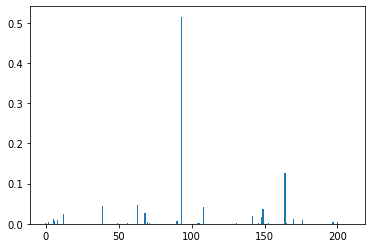

156
NZD/JPY
Feature: 0, Score: 0.00002
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00008
Feature: 20, Score: 0.00141
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00013
Feature: 30, Score: 0.00001
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

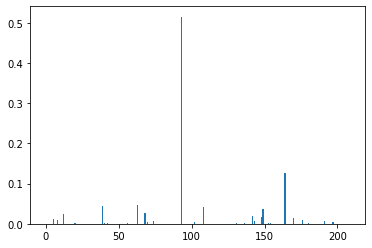

157
EUR/JPY
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00005
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00002
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00237
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00003
Feature: 28, Score: 0.00002
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00129
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

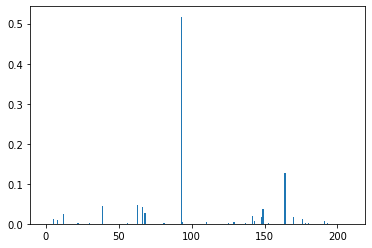

158
AUD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00009
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00002
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00259
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00006
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00181
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00066
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00022
Feature: 29, Score: 0.00004
Feature: 30, Score: 0.00001
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00008
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

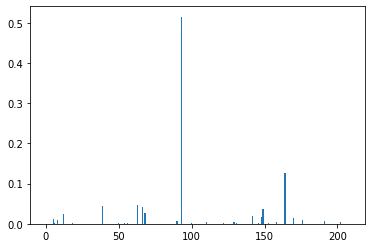

159
GBP/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00094
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00760
Feature: 7, Score: 0.00047
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00025
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00014
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

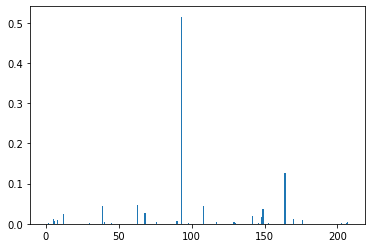

160
EUR/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00006
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00012
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02452
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00017
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00006
Feature: 18, Score: 0.00013
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00024
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00012
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00127
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00003
Feature: 34, Score: 0.00000
Feature: 35, Score

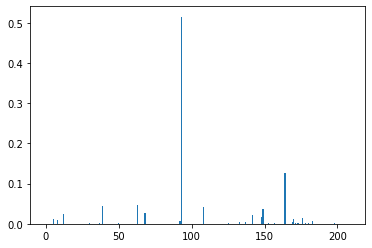

161
GBP/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00006
Feature: 14, Score: 0.00017
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00017
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00008
Feature: 28, Score: 0.00137
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00175
Feature: 33, Score: 0.00003
Feature: 34, Score: 0.00387
Feature: 35, Score

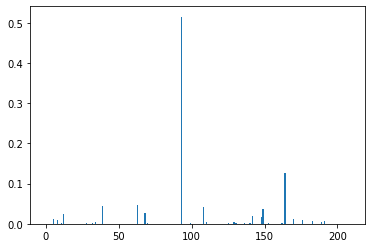

162
USD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00561
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00025
Feature: 15, Score: 0.00028
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00003
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00006
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

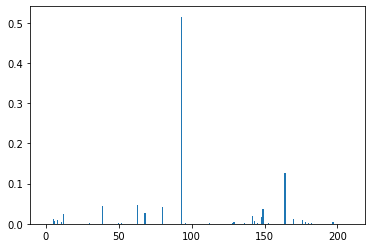

163
AUD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00016
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00722
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00034
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00028
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00047
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00007
Feature: 35, Score

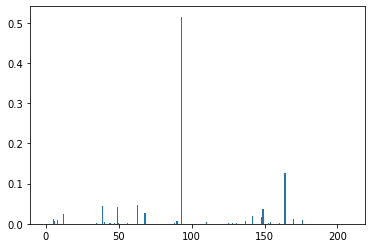

164
NZD/USD
Feature: 0, Score: 0.00022
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00007
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02466
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00135
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00006
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00001
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00364
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00034
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00283
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00118
Feature: 34, Score: 0.00000
Feature: 35, Score

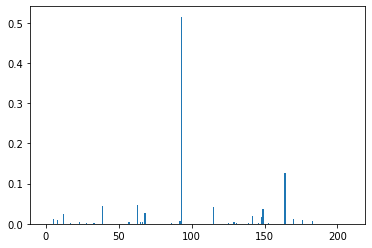

165
NZD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00034
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01035
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00013
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02455
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00043
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00018
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00007
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

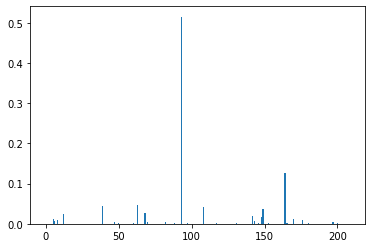

166
NZD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00001
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00013
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00003
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00013
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00034
Feature: 25, Score: 0.00007
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00016
Feature: 34, Score: 0.00000
Feature: 35, Score

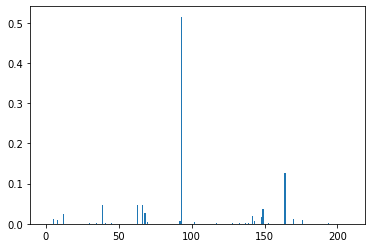

167
GBP/AUD
Feature: 0, Score: 0.00002
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00364
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01042
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00047
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00001
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

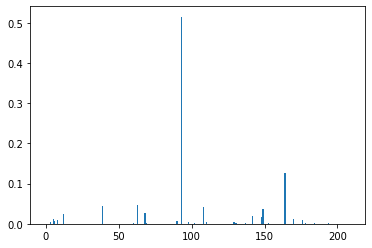

168
EUR/GBP
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00012
Feature: 2, Score: 0.00111
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00034
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00022
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02478
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00007
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00082
Feature: 33, Score: 0.00014
Feature: 34, Score: 0.00000
Feature: 35, Score

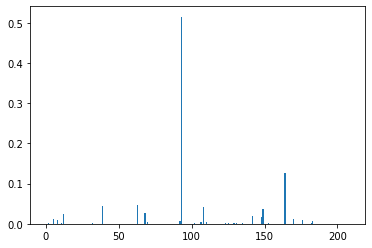

169
CHF/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00013
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01064
Feature: 9, Score: 0.00086
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00041
Feature: 15, Score: 0.00017
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00003
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00022
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

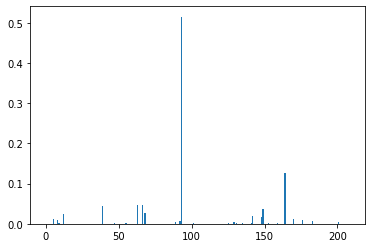

170
GBP/NZD
Feature: 0, Score: 0.00008
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00008
Feature: 12, Score: 0.02470
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00028
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00175
Feature: 23, Score: 0.00364
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00003
Feature: 29, Score: 0.00014
Feature: 30, Score: 0.00002
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

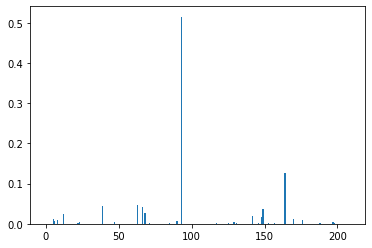

171
AUD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00012
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00009
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00100
Feature: 34, Score: 0.00000
Feature: 35, Score

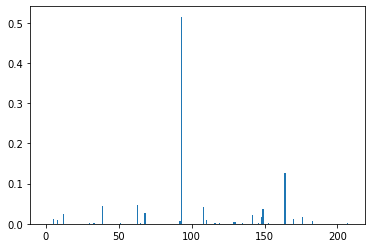

172
EUR/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00013
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02471
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00006
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00561
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00101
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00017
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

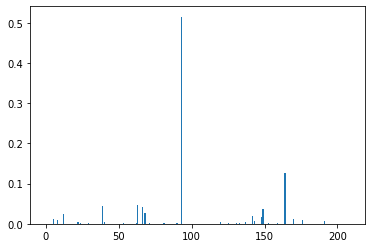

173
NZD/CHF
Feature: 0, Score: 0.00135
Feature: 1, Score: 0.00108
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00018
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01020
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00013
Feature: 14, Score: 0.00017
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00561
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00082
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

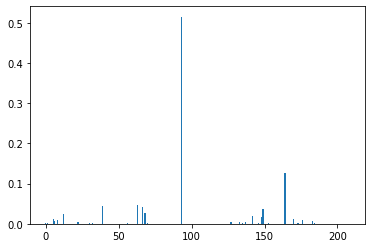

174
GBP/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00003
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00013
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00108
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00005
Feature: 15, Score: 0.00259
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00006
Feature: 18, Score: 0.00069
Feature: 19, Score: 0.00066
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00074
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00003
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00166
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

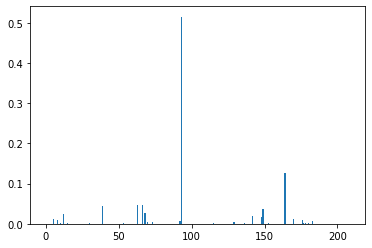

175
NZD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01294
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00069
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00008
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00016
Feature: 34, Score: 0.00000
Feature: 35, Score

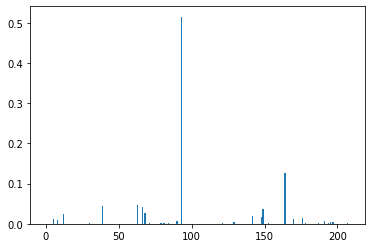

176
USD/CHF
Feature: 0, Score: 0.00034
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00012
Feature: 11, Score: 0.00003
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00014
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00013
Feature: 21, Score: 0.00016
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00005
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00002
Feature: 35, Score

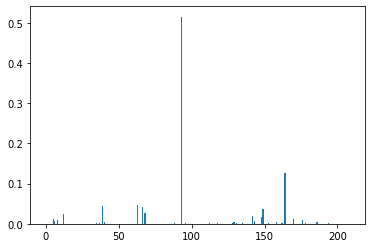

177
USD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00017
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00117
Feature: 11, Score: 0.00005
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00016
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00066
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00014
Feature: 29, Score: 0.00002
Feature: 30, Score: 0.00133
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00024
Feature: 35, Score

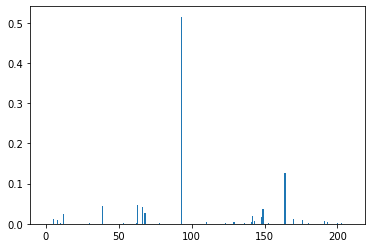

178
AUD/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00737
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00028
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00069
Feature: 19, Score: 0.00002
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00007
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00086
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00021
Feature: 34, Score: 0.00012
Feature: 35, Score

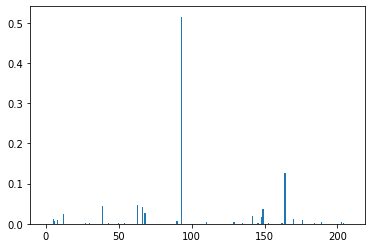

179
USD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01294
Feature: 6, Score: 0.00801
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00082
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00015
Feature: 27, Score: 0.00034
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00128
Feature: 31, Score: 0.00001
Feature: 32, Score: 0.00003
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

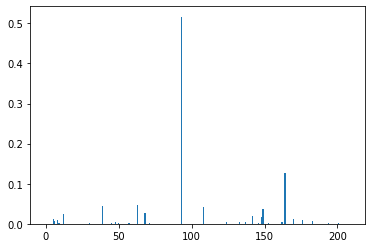

180
NZD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00012
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00018
Feature: 7, Score: 0.00006
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00259
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00016
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00175
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

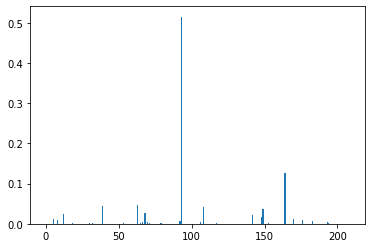

181
EUR/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01026
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00018
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00007
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

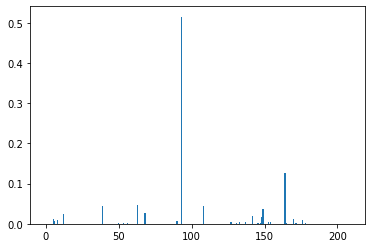

182
EUR/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00175
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00026
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00017
Feature: 15, Score: 0.00013
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00013
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00018
Feature: 24, Score: 0.00082
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00012
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00028
Feature: 32, Score: 0.00003
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

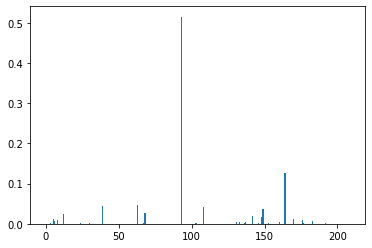

183
CAD/CHF
Feature: 0, Score: 0.00364
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01275
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00006
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00006
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00021
Feature: 18, Score: 0.00561
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00014
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00135
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

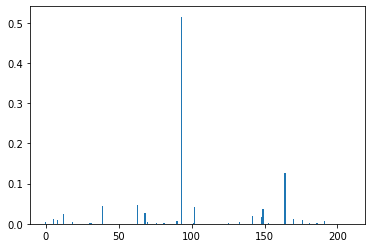

184
AUD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00069
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00014
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00074
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00141
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00012
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00067
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00001
Feature: 22, Score: 0.00003
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00176
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00017
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00003
Feature: 34, Score: 0.00000
Feature: 35, Score

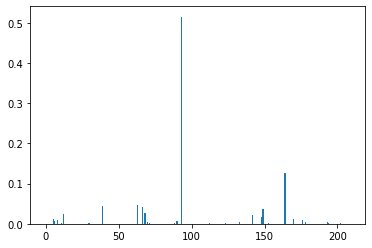

185
EUR/CAD
Feature: 0, Score: 0.00086
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00002
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00259
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00018
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00041
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00021
Feature: 34, Score: 0.00364
Feature: 35, Score

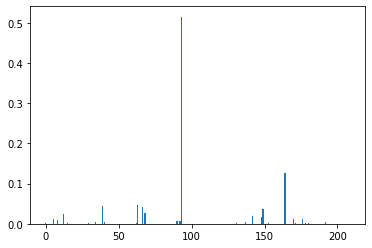

186
EUR/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01284
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00259
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00016
Feature: 19, Score: 0.00013
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00018
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00001
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00086
Feature: 34, Score: 0.00000
Feature: 35, Score

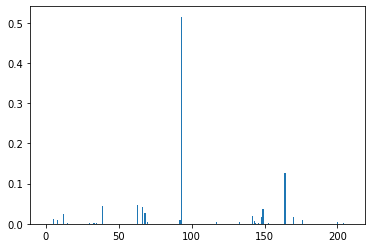

187
USD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02467
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00107
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00021
Feature: 17, Score: 0.00236
Feature: 18, Score: 0.00002
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00002
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00005
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

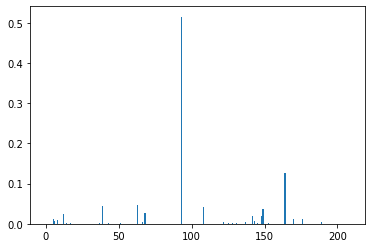

188
GBP/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00180
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01020
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00108
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00086
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00008
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00006
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

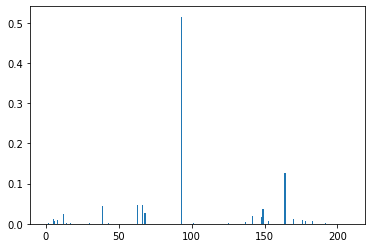

189
CAD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01022
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00021
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00561
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

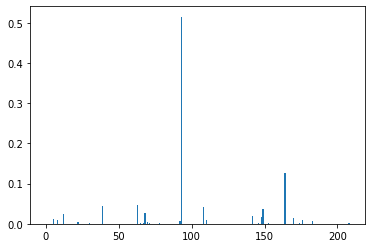

190
USD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02452
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

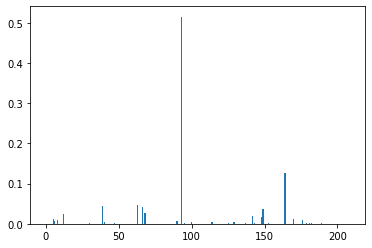

191
EUR/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00071
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00259
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00034
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00561
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00127
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00100
Feature: 34, Score: 0.00000
Feature: 35, Score

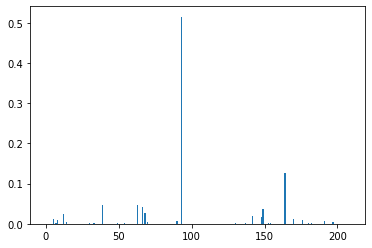

192
EUR/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00006
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00018
Feature: 14, Score: 0.00003
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00003
Feature: 19, Score: 0.00066
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00259
Feature: 25, Score: 0.00012
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00018
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00034
Feature: 30, Score: 0.00140
Feature: 31, Score: 0.00001
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

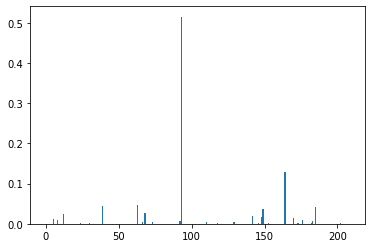

193
NZD/CAD
Feature: 0, Score: 0.00041
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00006
Feature: 3, Score: 0.00259
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01035
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00003
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00094
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00008
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

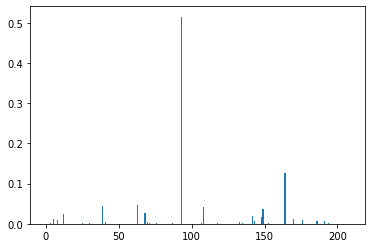

194
GBP/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00013
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01395
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00009
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00254
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00047
Feature: 27, Score: 0.00028
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00003
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

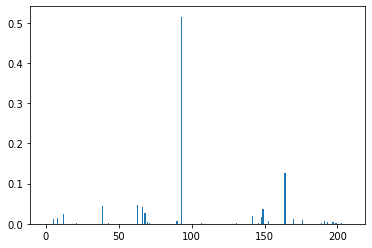

195
GBP/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00365
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00017
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00020
Feature: 26, Score: 0.00001
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

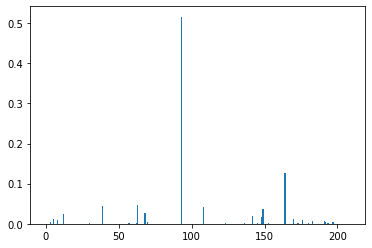

196
USD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00025
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00005
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00003
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00009
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00021
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00127
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

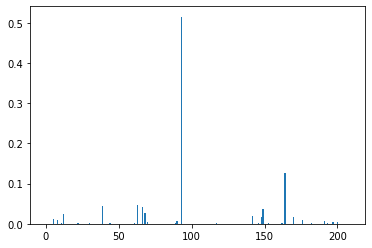

197
GBP/CHF
Feature: 0, Score: 0.00369
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00100
Feature: 7, Score: 0.00006
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02457
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00003
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00018
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00014
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00173
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

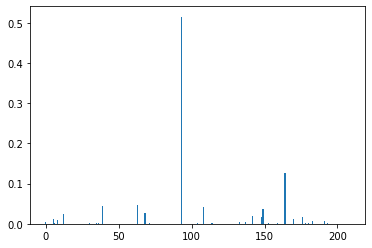

198
GBP/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00041
Feature: 12, Score: 0.02478
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00078
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00005
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00106
Feature: 34, Score: 0.00000
Feature: 35, Score

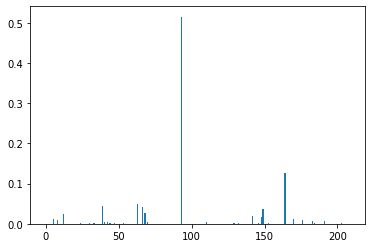

199
NZD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00008
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00100
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00086
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00002
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00009
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

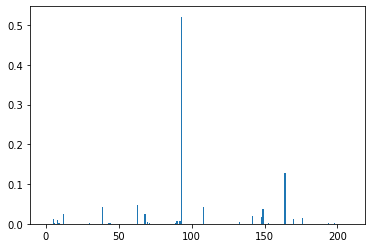

200
EUR/GBP
Feature: 0, Score: 0.00020
Feature: 1, Score: 0.00012
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00819
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00107
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

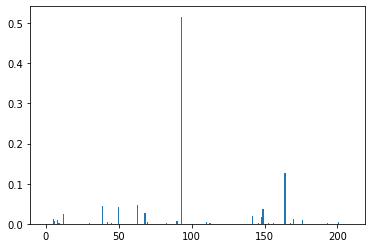

201
AUD/NZD
Feature: 0, Score: 0.00182
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00018
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00744
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00007
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00028
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00008
Feature: 23, Score: 0.00020
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00003
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00364
Feature: 35, Score

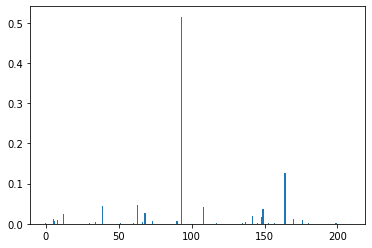

202
NZD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00175
Feature: 2, Score: 0.00002
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01032
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00259
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00070
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00003
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00034
Feature: 25, Score: 0.00006
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00047
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00022
Feature: 34, Score: 0.00000
Feature: 35, Score

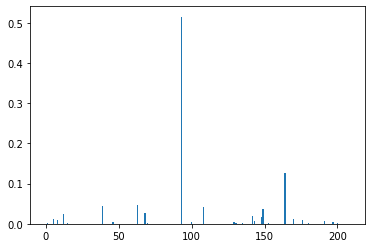

203
CHF/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01267
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00041
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00561
Feature: 12, Score: 0.02451
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00066
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00259
Feature: 28, Score: 0.00013
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00047
Feature: 35, Score

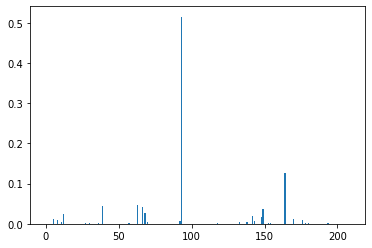

204
AUD/JPY
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00005
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00007
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00301
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

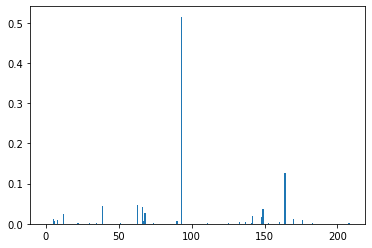

205
AUD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00002
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00819
Feature: 7, Score: 0.00002
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00009
Feature: 14, Score: 0.00021
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00017
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00002
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00034
Feature: 28, Score: 0.00005
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00041
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00364
Feature: 35, Score

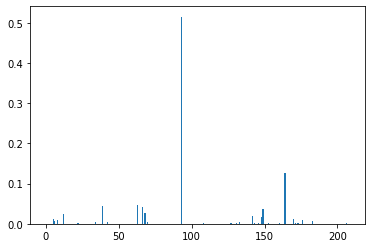

206
EUR/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00013
Feature: 5, Score: 0.01272
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02456
Feature: 13, Score: 0.00006
Feature: 14, Score: 0.00007
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00007
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00002
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00047
Feature: 34, Score: 0.00000
Feature: 35, Score

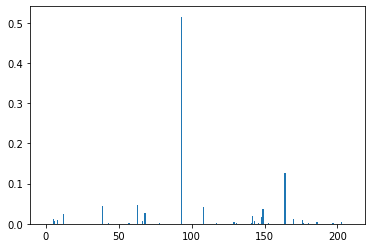

207
EUR/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00002
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00012
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00086
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

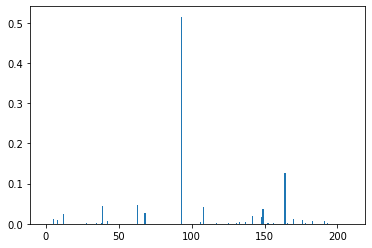

208
EUR/GBP
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00100
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00089
Feature: 34, Score: 0.00000
Feature: 35, Score

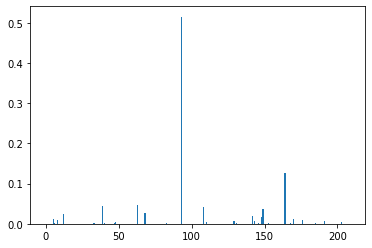

209
GBP/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00721
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01025
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00117
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00008
Feature: 21, Score: 0.00003
Feature: 22, Score: 0.00006
Feature: 23, Score: 0.00013
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00006
Feature: 34, Score: 0.00000
Feature: 35, Score

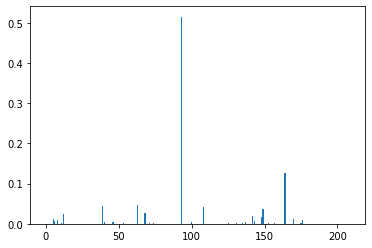

210
EUR/AUD
Feature: 0, Score: 0.00018
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01268
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00007
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00025
Feature: 21, Score: 0.00016
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00007
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00002
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

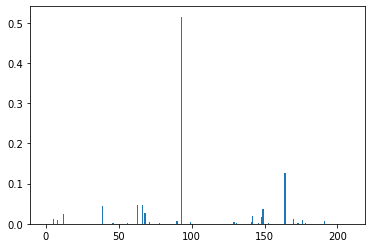

211
AUD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00561
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.01030
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00012
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00259
Feature: 24, Score: 0.00002
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00034
Feature: 30, Score: 0.00069
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00003
Feature: 34, Score: 0.00003
Feature: 35, Score

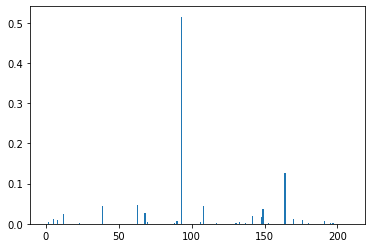

212
GBP/NZD
Feature: 0, Score: 0.00018
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00028
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00025
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00001
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00002
Feature: 26, Score: 0.00017
Feature: 27, Score: 0.00013
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

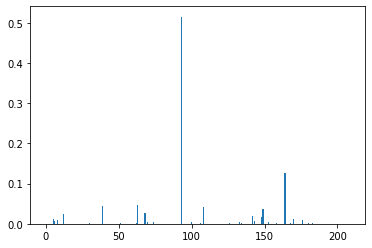

213
AUD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00022
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01269
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00002
Feature: 12, Score: 0.02478
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00082
Feature: 15, Score: 0.00017
Feature: 16, Score: 0.00176
Feature: 17, Score: 0.00003
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00005
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00364
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

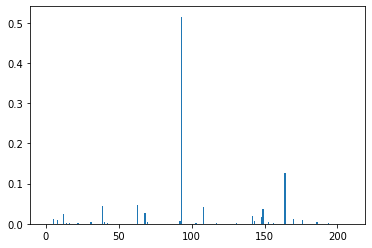

214
GBP/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00017
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00108
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00002
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00016
Feature: 27, Score: 0.00012
Feature: 28, Score: 0.00031
Feature: 29, Score: 0.00175
Feature: 30, Score: 0.00144
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

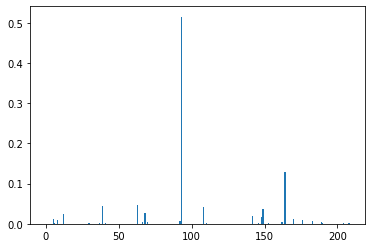

215
EUR/USD
Feature: 0, Score: 0.00066
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00086
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00082
Feature: 19, Score: 0.00002
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00094
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00018
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00175
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00012
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

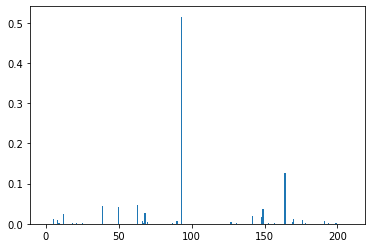

216
NZD/CHF
Feature: 0, Score: 0.00066
Feature: 1, Score: 0.00175
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01313
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00364
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00073
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00001
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00159
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00003
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00005
Feature: 34, Score: 0.00011
Feature: 35, Score

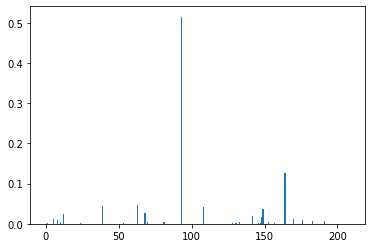

217
GBP/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00008
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00022
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00175
Feature: 14, Score: 0.00013
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00012
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00005
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

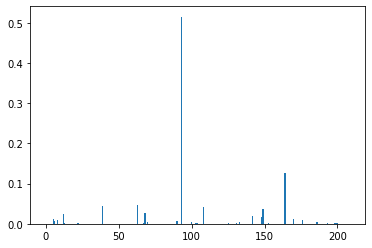

218
USD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01099
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00086
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00149
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00069
Feature: 33, Score: 0.00003
Feature: 34, Score: 0.00006
Feature: 35, Score

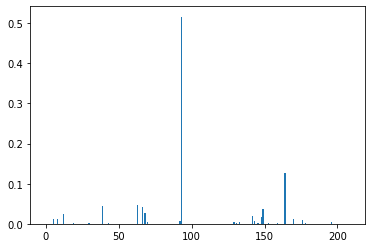

219
GBP/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00007
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00006
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00007
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00561
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00001
Feature: 27, Score: 0.00266
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

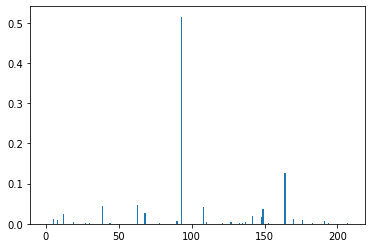

220
NZD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00002
Feature: 2, Score: 0.00259
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00109
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02455
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00017
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00181
Feature: 29, Score: 0.00034
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00085
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

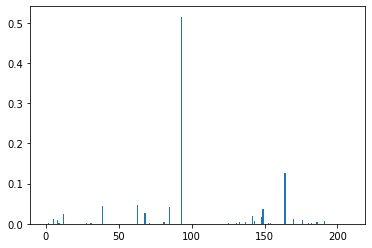

221
AUD/CHF
Feature: 0, Score: 0.00025
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00018
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01382
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00259
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00017
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00034
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00001
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00128
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

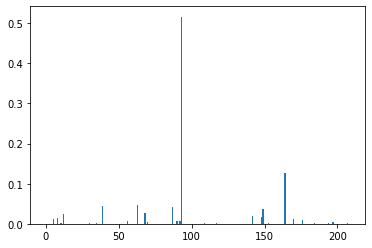

222
GBP/USD
Feature: 0, Score: 0.00066
Feature: 1, Score: 0.00008
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00003
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00012
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00003
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00082
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

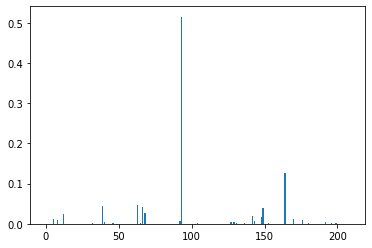

223
USD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00041
Feature: 12, Score: 0.02456
Feature: 13, Score: 0.00006
Feature: 14, Score: 0.00141
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00175
Feature: 27, Score: 0.00007
Feature: 28, Score: 0.00016
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00021
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

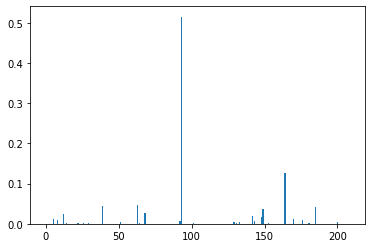

224
GBP/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00013
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00009
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00082
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00364
Feature: 24, Score: 0.00029
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00138
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00001
Feature: 35, Score

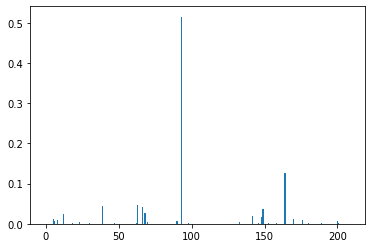

225
GBP/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00003
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00014
Feature: 7, Score: 0.00022
Feature: 8, Score: 0.01025
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00006
Feature: 17, Score: 0.00003
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00082
Feature: 23, Score: 0.00020
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

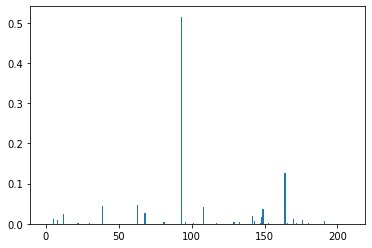

226
NZD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00006
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00101
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00012
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00006
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00086
Feature: 27, Score: 0.00047
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00042
Feature: 31, Score: 0.00041
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00022
Feature: 35, Score

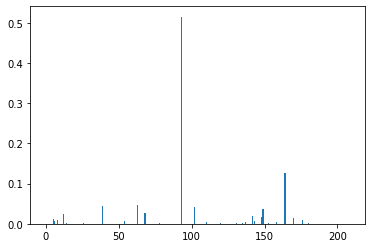

227
USD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00082
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00760
Feature: 7, Score: 0.04442
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00022
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00002
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00076
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00007
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

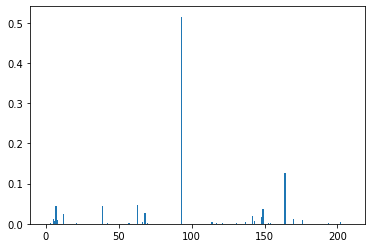

228
USD/JPY
Feature: 0, Score: 0.00364
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00136
Feature: 3, Score: 0.00259
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00819
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00016
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00009
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00047
Feature: 34, Score: 0.00000
Feature: 35, Score

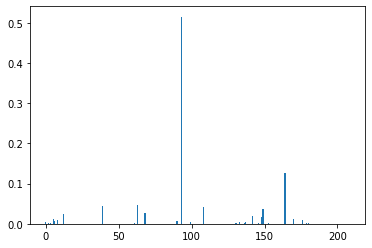

229
GBP/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00003
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00007
Feature: 5, Score: 0.01269
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00012
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00135
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00562
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00197
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00082
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00018
Feature: 28, Score: 0.00012
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

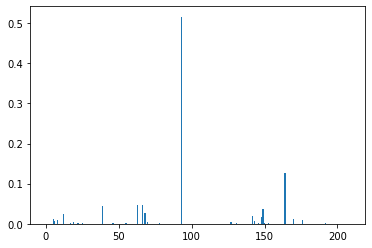

230
EUR/GBP
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00005
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01034
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00005
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00297
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00364
Feature: 24, Score: 0.00006
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00003
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00013
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

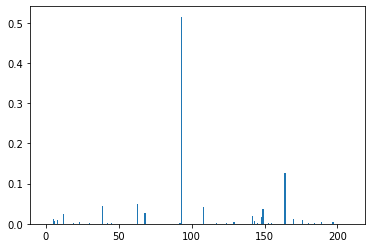

231
GBP/CAD
Feature: 0, Score: 0.00040
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00561
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00003
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00017
Feature: 18, Score: 0.00013
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00006
Feature: 21, Score: 0.00005
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00002
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00003
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00028
Feature: 35, Score

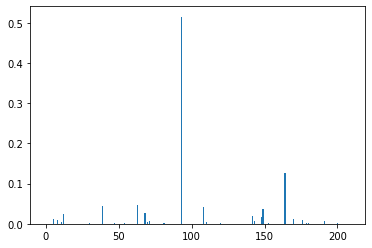

232
EUR/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00021
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00020
Feature: 16, Score: 0.00026
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00007
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00034
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00001
Feature: 32, Score: 0.00013
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

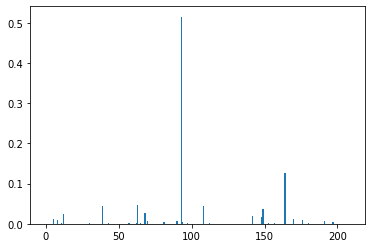

233
USD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00003
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01253
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00009
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00018
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00022
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00016
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00043
Feature: 30, Score: 0.00167
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00012
Feature: 34, Score: 0.00000
Feature: 35, Score

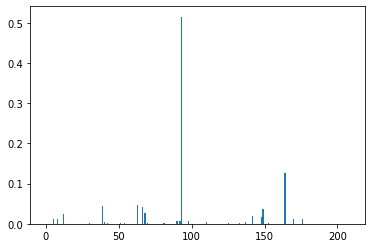

234
EUR/GBP
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00013
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00259
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00086
Feature: 28, Score: 0.00026
Feature: 29, Score: 0.00008
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00012
Feature: 35, Score

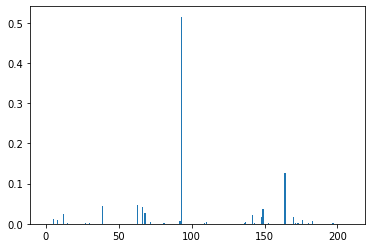

235
GBP/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00175
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00106
Feature: 30, Score: 0.00137
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00013
Feature: 34, Score: 0.00000
Feature: 35, Score

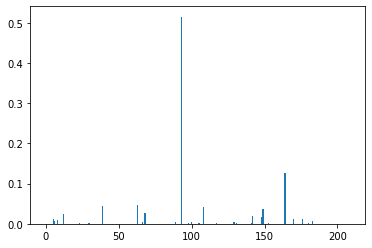

236
EUR/CHF
Feature: 0, Score: 0.00028
Feature: 1, Score: 0.00034
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00069
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00720
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01065
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02478
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00041
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00009
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00000
Feature: 35, Score

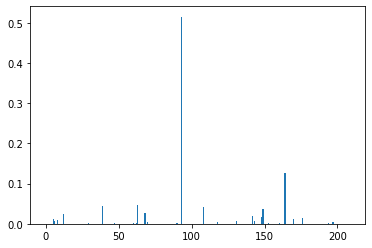

237
CHF/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00066
Feature: 4, Score: 0.00561
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00013
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02471
Feature: 13, Score: 0.00059
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00017
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00010
Feature: 21, Score: 0.00257
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00031
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

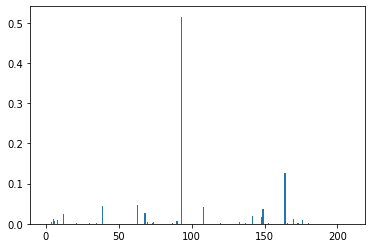

238
EUR/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00006
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00010
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00028
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00002
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00017
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00100
Feature: 34, Score: 0.00364
Feature: 35, Score

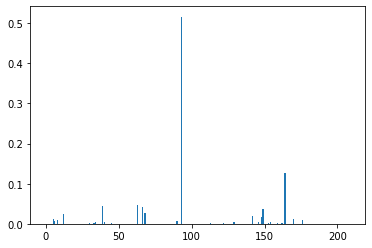

239
CAD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00028
Feature: 8, Score: 0.01035
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

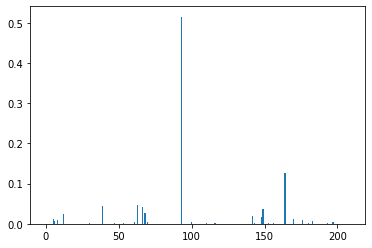

240
CAD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00013
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01294
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00082
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00008
Feature: 11, Score: 0.00066
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00007
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00433
Feature: 19, Score: 0.00006
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00047
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00028
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

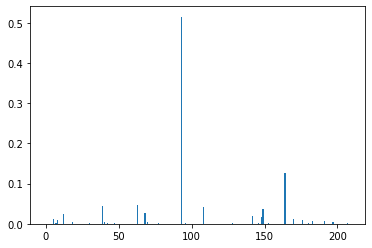

241
NZD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00003
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00007
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00259
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00006
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00003
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00013
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00034
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00006
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00000
Feature: 35, Score

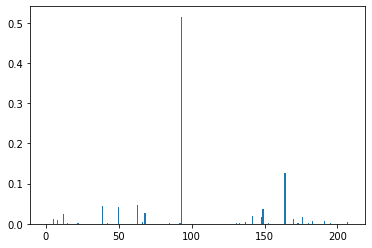

242
NZD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00005
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00021
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00007
Feature: 22, Score: 0.00003
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00034
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00008
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00069
Feature: 34, Score: 0.00000
Feature: 35, Score

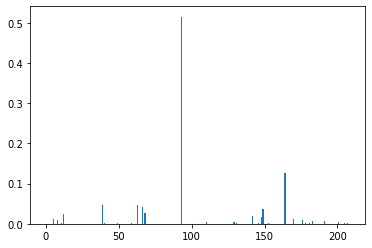

243
CAD/CHF
Feature: 0, Score: 0.00136
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00067
Feature: 12, Score: 0.02466
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00005
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00108
Feature: 18, Score: 0.00002
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00069
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00005
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00007
Feature: 35, Score

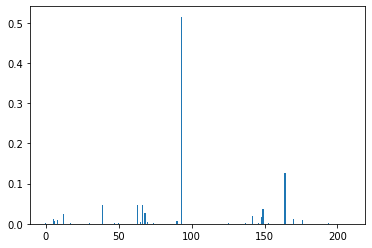

244
EUR/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00736
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00014
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00108
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00003
Feature: 23, Score: 0.00364
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00271
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00013
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00100
Feature: 34, Score: 0.00000
Feature: 35, Score

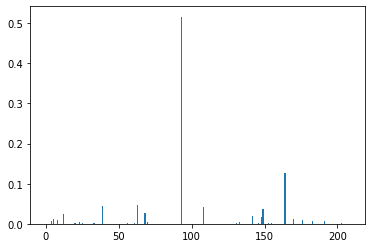

245
GBP/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00012
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00003
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00017
Feature: 30, Score: 0.00005
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

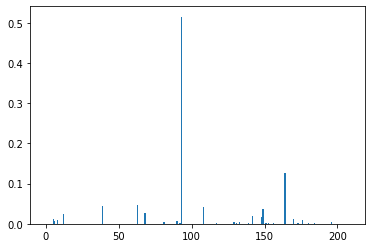

246
AUD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00040
Feature: 14, Score: 0.00008
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00086
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00013
Feature: 20, Score: 0.00112
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00013
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00001
Feature: 35, Score

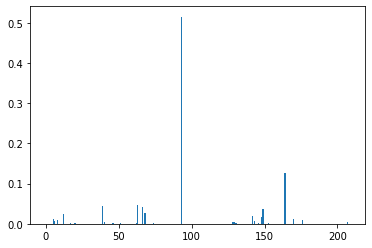

247
AUD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00012
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00066
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00047
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00000
Feature: 35, Score

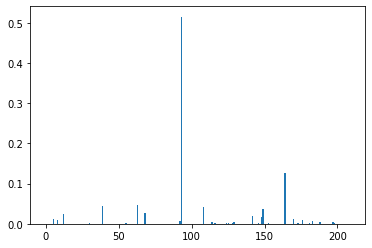

248
NZD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00066
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00720
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01038
Feature: 9, Score: 0.00028
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00006
Feature: 14, Score: 0.00022
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00139
Feature: 31, Score: 0.00002
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00100
Feature: 34, Score: 0.00021
Feature: 35, Score

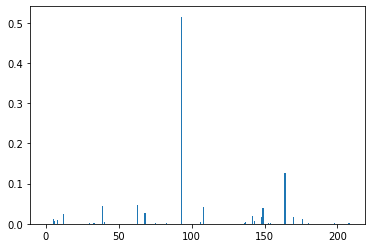

249
NZD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00066
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00120
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00760
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01023
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00012
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00022
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00006
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00014
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00006
Feature: 34, Score: 0.00000
Feature: 35, Score

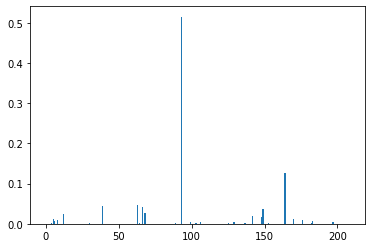

250
NZD/JPY
Feature: 0, Score: 0.00201
Feature: 1, Score: 0.00108
Feature: 2, Score: 0.00018
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00007
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00261
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00034
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00259
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00012
Feature: 35, Score

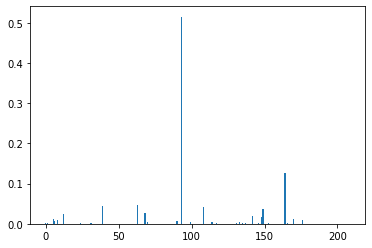

251
NZD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00561
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00066
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00012
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00003
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00012
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00012
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00047
Feature: 33, Score: 0.00008
Feature: 34, Score: 0.00001
Feature: 35, Score

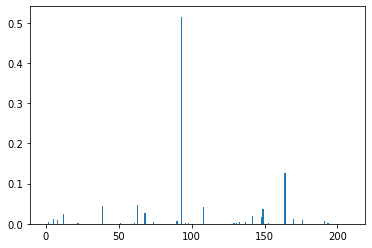

252
CAD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01294
Feature: 6, Score: 0.00005
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02466
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00083
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00022
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00018
Feature: 24, Score: 0.00248
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.04266
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00006
Feature: 34, Score: 0.00000
Feature: 35, Score

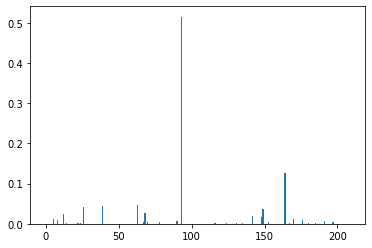

253
AUD/JPY
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00012
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00003
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00034
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00041
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00006
Feature: 35, Score

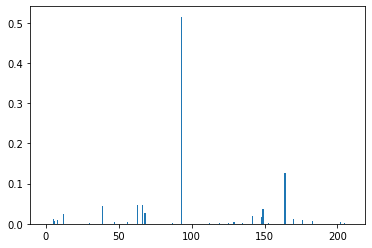

254
EUR/USD
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00006
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00006
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01064
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00012
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00002
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00013
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00003
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00003
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

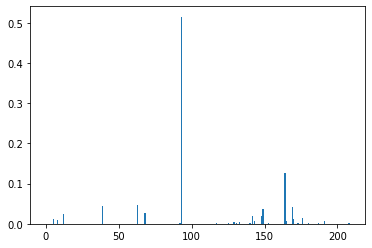

255
NZD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00007
Feature: 2, Score: 0.00008
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01271
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02451
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00047
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

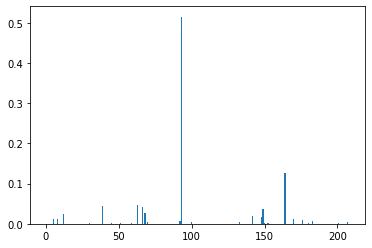

256
GBP/NZD
Feature: 0, Score: 0.00017
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00034
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00075
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00003
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

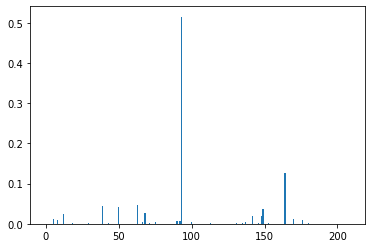

257
GBP/AUD
Feature: 0, Score: 0.00021
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00259
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00006
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00028
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00022
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00008
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00003
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00012
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00100
Feature: 34, Score: 0.00000
Feature: 35, Score

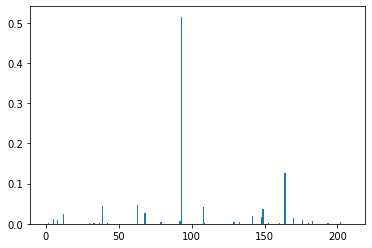

258
USD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00021
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00105
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00012
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00002
Feature: 22, Score: 0.00022
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00008
Feature: 34, Score: 0.00001
Feature: 35, Score

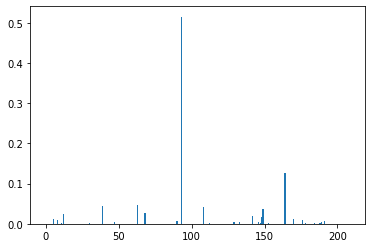

259
CHF/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00028
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00259
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02467
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00643
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00012
Feature: 28, Score: 0.00006
Feature: 29, Score: 0.00204
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

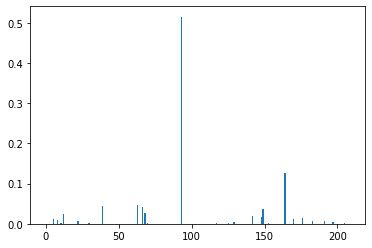

260
NZD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01279
Feature: 6, Score: 0.00744
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01153
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00006
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00017
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00007
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00021
Feature: 23, Score: 0.00034
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00016
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00086
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00069
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00001
Feature: 35, Score

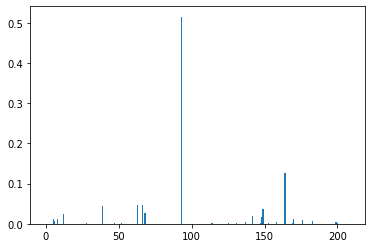

261
GBP/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00013
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00016
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00006
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00020
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00022
Feature: 34, Score: 0.00000
Feature: 35, Score

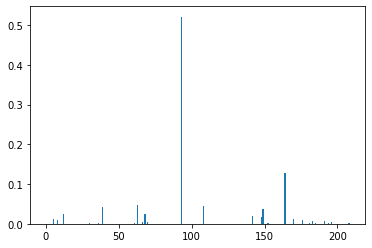

262
EUR/GBP
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00013
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00066
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00007
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00018
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

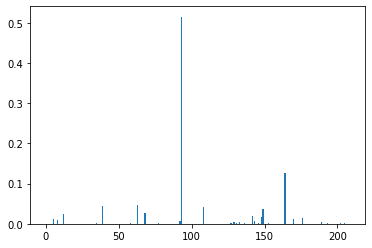

263
USD/CAD
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00034
Feature: 3, Score: 0.00082
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01025
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02451
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00086
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

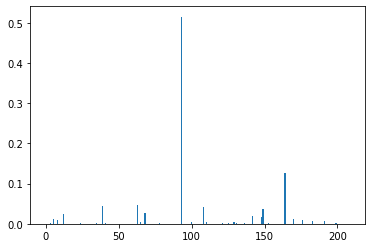

264
USD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00009
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00100
Feature: 7, Score: 0.00197
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00028
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00066
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00086
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00034
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00002
Feature: 35, Score

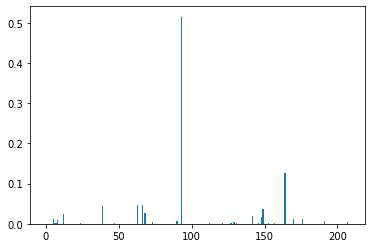

265
CAD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00003
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00006
Feature: 18, Score: 0.00016
Feature: 19, Score: 0.00078
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00133
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

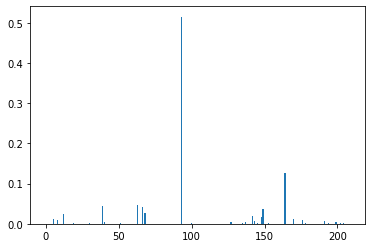

266
AUD/JPY
Feature: 0, Score: 0.00028
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01382
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00018
Feature: 14, Score: 0.00003
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00007
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00006
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

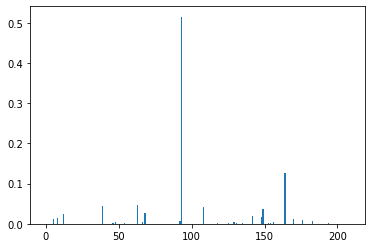

267
CAD/JPY
Feature: 0, Score: 0.00175
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00013
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00001
Feature: 7, Score: 0.00561
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00259
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00009
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00041
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00134
Feature: 30, Score: 0.00133
Feature: 31, Score: 0.00001
Feature: 32, Score: 0.00013
Feature: 33, Score: 0.00007
Feature: 34, Score: 0.00000
Feature: 35, Score

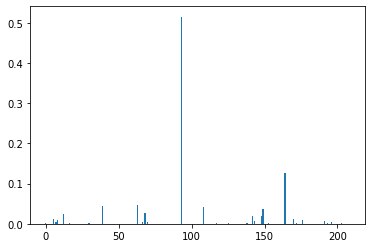

268
USD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00561
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00012
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00037
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00047
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00002
Feature: 35, Score

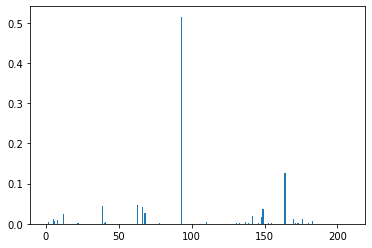

269
AUD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00012
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00094
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00025
Feature: 27, Score: 0.00047
Feature: 28, Score: 0.00012
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

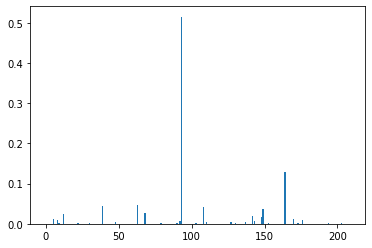

270
GBP/NZD
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00073
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00017
Feature: 10, Score: 0.00008
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00030
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00004
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00259
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00028
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00003
Feature: 35, Score

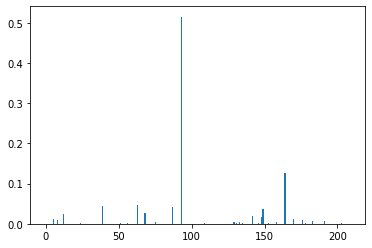

271
NZD/CHF
Feature: 0, Score: 0.00068
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00175
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00561
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00009
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

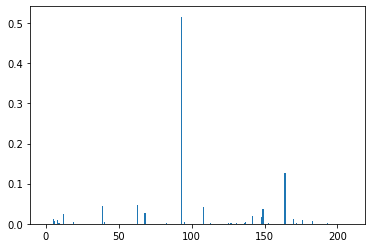

272
EUR/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00002
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00002
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00132
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00021
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00074
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

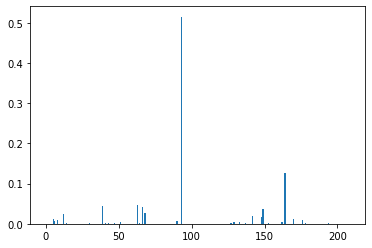

273
GBP/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00005
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00028
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00008
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

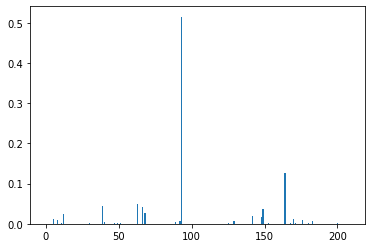

274
GBP/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00069
Feature: 19, Score: 0.00281
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00009
Feature: 26, Score: 0.00005
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

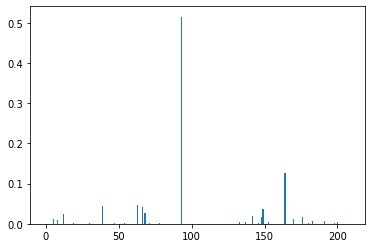

275
AUD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00006
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00003
Feature: 17, Score: 0.00083
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00028
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00086
Feature: 28, Score: 0.00028
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00013
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00373
Feature: 35, Score

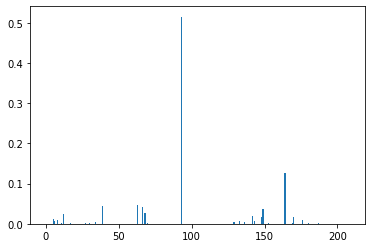

276
EUR/GBP
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00018
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00561
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00022
Feature: 19, Score: 0.00280
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00012
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00008
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00010
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

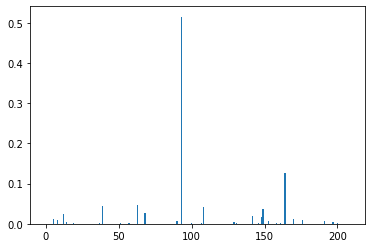

277
CAD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00034
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00082
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00006
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00012
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00008
Feature: 34, Score: 0.00000
Feature: 35, Score

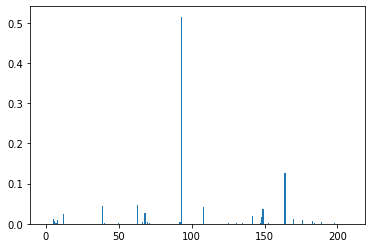

278
AUD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00003
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00030
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02466
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00013
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00028
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00086
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

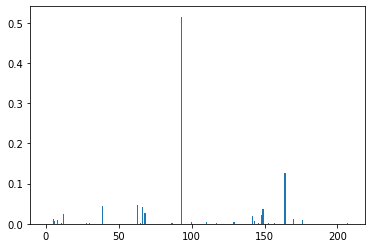

279
NZD/CHF
Feature: 0, Score: 0.00058
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00002
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00028
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02497
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00259
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00237
Feature: 23, Score: 0.00377
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00003
Feature: 28, Score: 0.00025
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00002
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00022
Feature: 34, Score: 0.00001
Feature: 35, Score

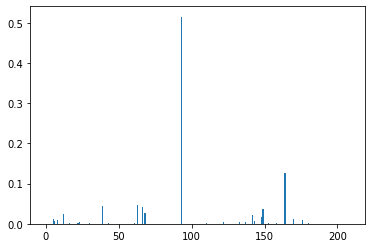

280
NZD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.04266
Feature: 8, Score: 0.01020
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

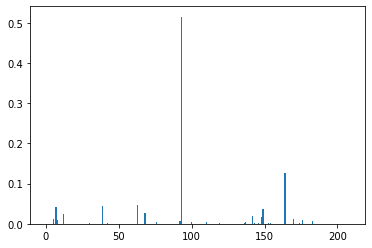

281
NZD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01020
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00016
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00009
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00143
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00000
Feature: 35, Score

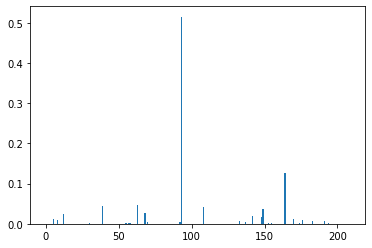

282
AUD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01382
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00265
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00017
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00022
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00005
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00003
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

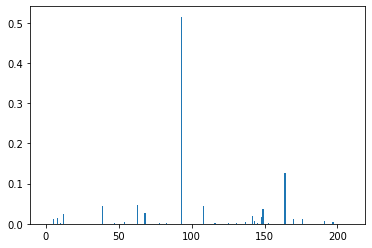

283
CHF/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00047
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00009
Feature: 12, Score: 0.02466
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00006
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00025
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00175
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00019
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

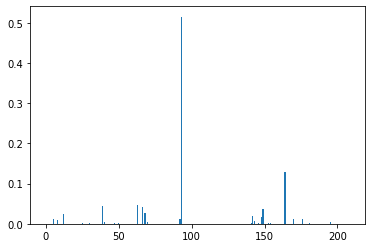

284
EUR/JPY
Feature: 0, Score: 0.00086
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02467
Feature: 13, Score: 0.00561
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00005
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00022
Feature: 34, Score: 0.00001
Feature: 35, Score

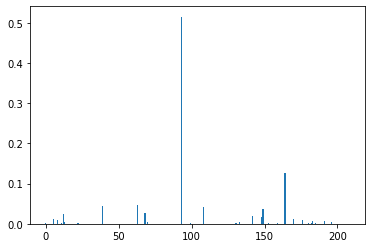

285
USD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00005
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00012
Feature: 11, Score: 0.00017
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00018
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00017
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00000
Feature: 35, Score

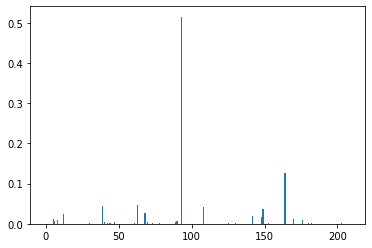

286
EUR/USD
Feature: 0, Score: 0.00041
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00003
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00006
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00216
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00005
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00104
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00107
Feature: 34, Score: 0.00000
Feature: 35, Score

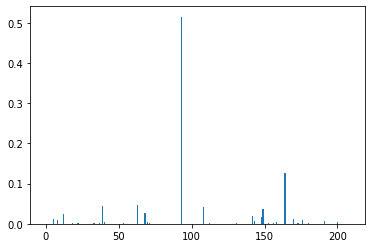

287
USD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00007
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00259
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00008
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00003
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

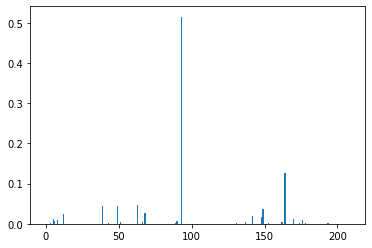

288
USD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01036
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00075
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00006
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00012
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00008
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

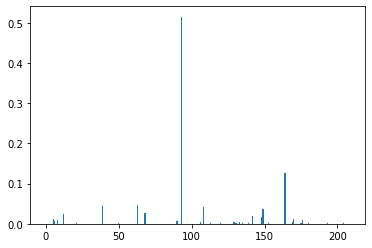

289
AUD/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00028
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00006
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00082
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00005
Feature: 17, Score: 0.00109
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00025
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00007
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00016
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00100
Feature: 34, Score: 0.00022
Feature: 35, Score

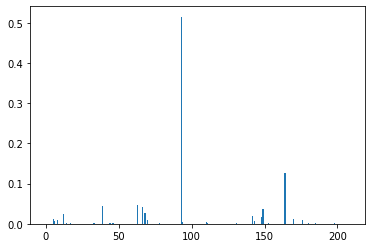

290
GBP/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00002
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00034
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00108
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02468
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00013
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

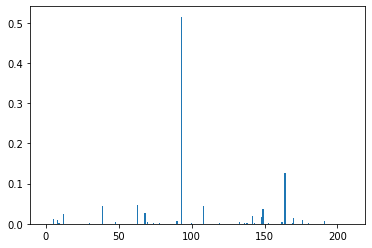

291
EUR/JPY
Feature: 0, Score: 0.00013
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00018
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01267
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02463
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00012
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00066
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00007
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00001
Feature: 35, Score

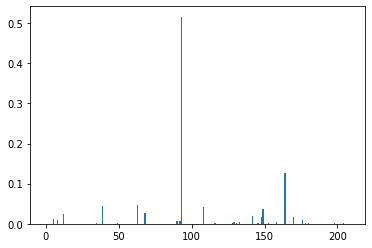

292
EUR/GBP
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00003
Feature: 2, Score: 0.00561
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01273
Feature: 6, Score: 0.00733
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01021
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02466
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00018
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00028
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00009
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00005
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00000
Feature: 35, Score

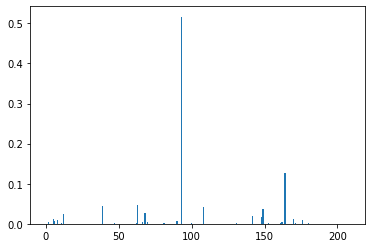

293
NZD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01035
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02463
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00013
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00012
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00082
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00006
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00006
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00001
Feature: 35, Score

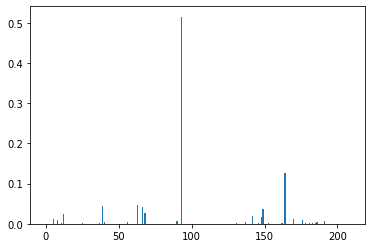

294
NZD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00175
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00021
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

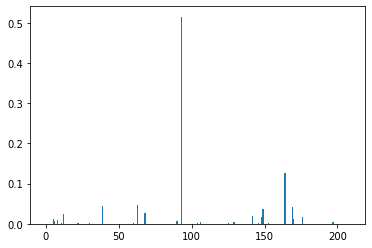

295
USD/CHF
Feature: 0, Score: 0.00086
Feature: 1, Score: 0.00013
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00561
Feature: 23, Score: 0.00018
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00001
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00023
Feature: 35, Score

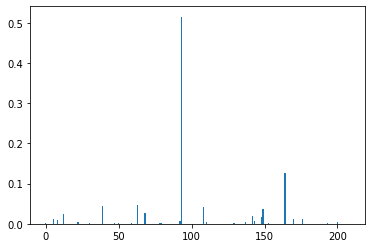

296
AUD/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00034
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00002
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00013
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00017
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00108
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00016
Feature: 22, Score: 0.00022
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00017
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

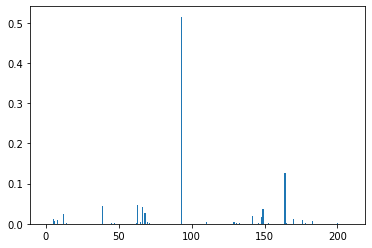

297
GBP/JPY
Feature: 0, Score: 0.00012
Feature: 1, Score: 0.00050
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00100
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00021
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00175
Feature: 25, Score: 0.00007
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00007
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

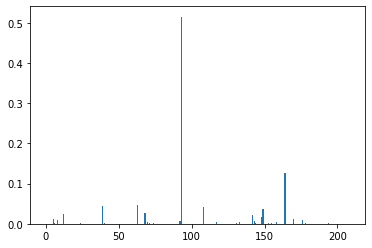

298
AUD/CHF
Feature: 0, Score: 0.00259
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00725
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02514
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00012
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00013
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00364
Feature: 24, Score: 0.00005
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00008
Feature: 28, Score: 0.00003
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

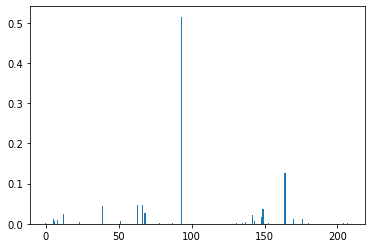

299
CHF/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00013
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00006
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00008
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00259
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00128
Feature: 31, Score: 0.00013
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

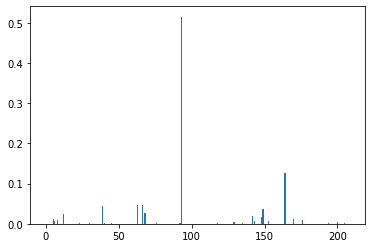

300
NZD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00028
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01269
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00012
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00175
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

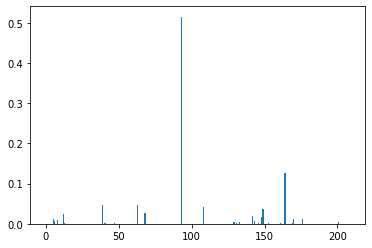

301
NZD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00006
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00066
Feature: 12, Score: 0.02467
Feature: 13, Score: 0.00013
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00047
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00012
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

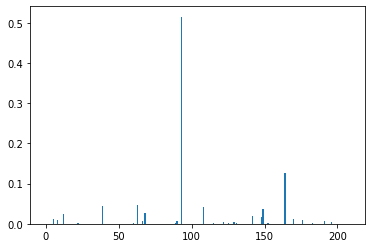

302
CHF/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00003
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00726
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00001
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

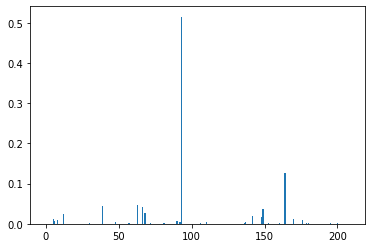

303
EUR/JPY
Feature: 0, Score: 0.00066
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00002
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00013
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00017
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00007
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00135
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00259
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00006
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

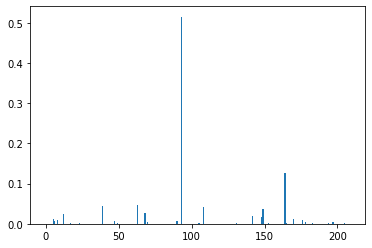

304
CAD/CHF
Feature: 0, Score: 0.00561
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00721
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00006
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00259
Feature: 16, Score: 0.00012
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00034
Feature: 19, Score: 0.00002
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00021
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00017
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00017
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00100
Feature: 34, Score: 0.00001
Feature: 35, Score

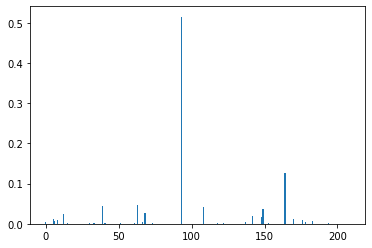

305
EUR/GBP
Feature: 0, Score: 0.00003
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00005
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01325
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00002
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00028
Feature: 27, Score: 0.00020
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00175
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00082
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

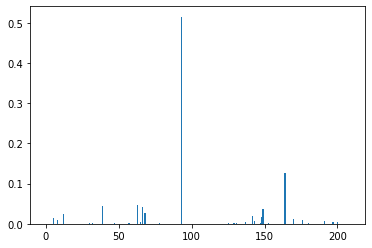

306
GBP/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00007
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00019
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00018
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00028
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

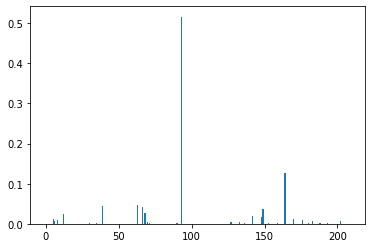

307
GBP/CHF
Feature: 0, Score: 0.00022
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00008
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00123
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00003
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00018
Feature: 24, Score: 0.00177
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00108
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

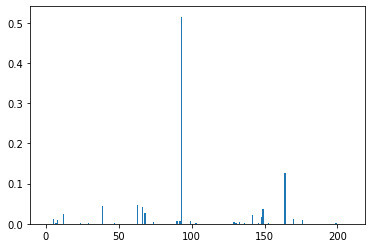

308
GBP/USD
Feature: 0, Score: 0.00259
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00731
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00003
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00006
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00364
Feature: 35, Score

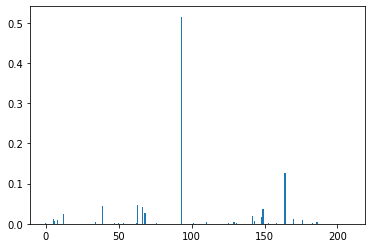

309
EUR/NZD
Feature: 0, Score: 0.00166
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00008
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00017
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00006
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00016
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00006
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00127
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

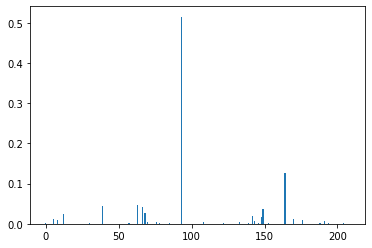

310
EUR/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00005
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00021
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00066
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00002
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00082
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00047
Feature: 30, Score: 0.00012
Feature: 31, Score: 0.00014
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

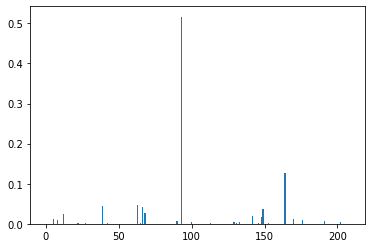

311
EUR/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01267
Feature: 6, Score: 0.00801
Feature: 7, Score: 0.00005
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02451
Feature: 13, Score: 0.00021
Feature: 14, Score: 0.00017
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00012
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00567
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00005
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00007
Feature: 34, Score: 0.00000
Feature: 35, Score

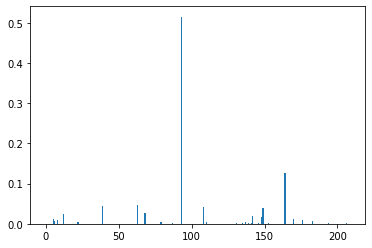

312
EUR/CAD
Feature: 0, Score: 0.00021
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00007
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00028
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00007
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.04266
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

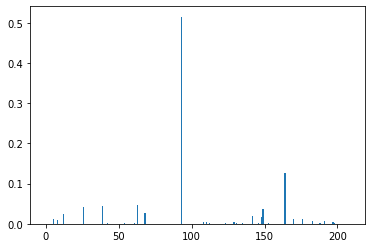

313
GBP/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00047
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00003
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00005
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00002
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00109
Feature: 29, Score: 0.00012
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00013
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

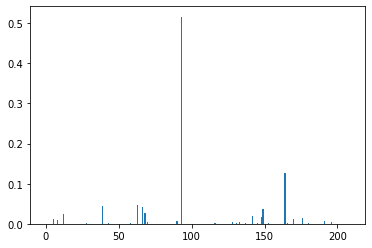

314
EUR/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00108
Feature: 11, Score: 0.00021
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00561
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00006
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00175
Feature: 28, Score: 0.00013
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00103
Feature: 34, Score: 0.00000
Feature: 35, Score

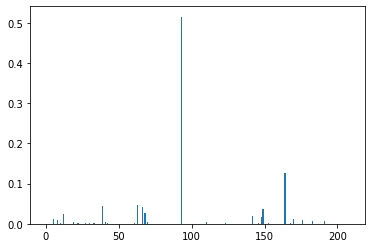

315
CHF/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01042
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00007
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00002
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00005
Feature: 28, Score: 0.00070
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.04267
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00003
Feature: 34, Score: 0.00000
Feature: 35, Score

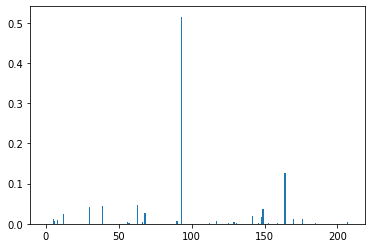

316
GBP/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00013
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01267
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00002
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00012
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00002
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

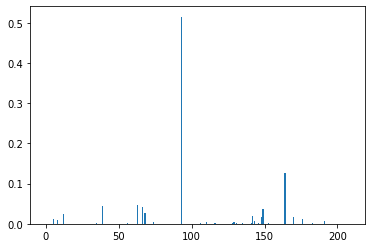

317
GBP/USD
Feature: 0, Score: 0.00017
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01267
Feature: 6, Score: 0.00723
Feature: 7, Score: 0.00014
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00570
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00006
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00029
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00003
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00008
Feature: 34, Score: 0.00000
Feature: 35, Score

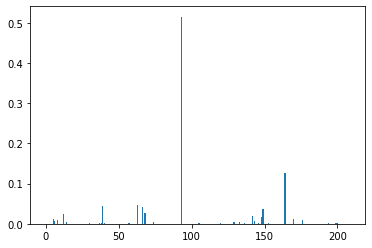

318
CAD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00014
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01033
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00067
Feature: 18, Score: 0.00006
Feature: 19, Score: 0.00019
Feature: 20, Score: 0.00007
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00006
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00079
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00001
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00301
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

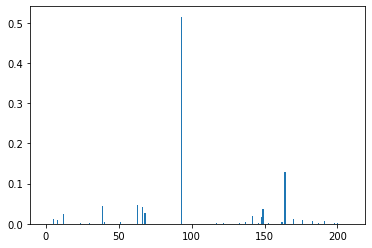

319
GBP/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00004
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00012
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00003
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00561
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00021
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00012
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00028
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

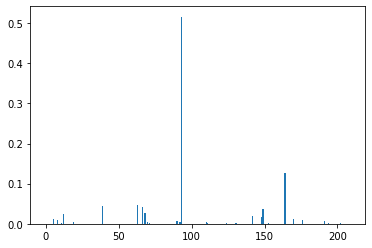

320
GBP/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01030
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00016
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00007
Feature: 20, Score: 0.00002
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00012
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00002
Feature: 33, Score: 0.00022
Feature: 34, Score: 0.00000
Feature: 35, Score

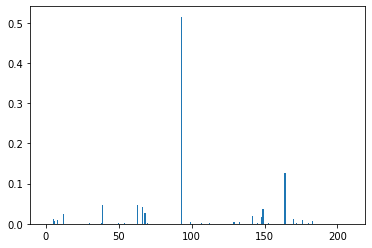

321
CHF/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01193
Feature: 9, Score: 0.00021
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00003
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00006
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00013
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00108
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00013
Feature: 34, Score: 0.00000
Feature: 35, Score

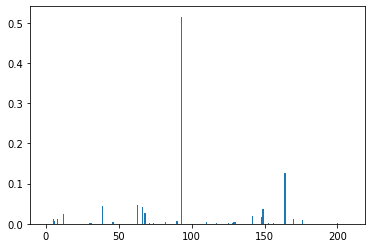

322
AUD/NZD
Feature: 0, Score: 0.00002
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00082
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00002
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00013
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00087
Feature: 31, Score: 0.00001
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

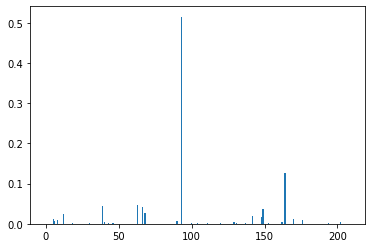

323
GBP/JPY
Feature: 0, Score: 0.00013
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00018
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00017
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00082
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00005
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00002
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00002
Feature: 32, Score: 0.00008
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

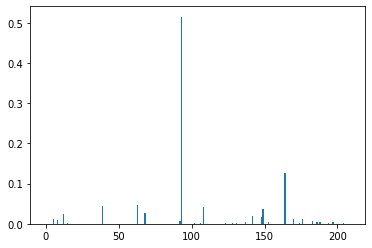

324
NZD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00006
Feature: 2, Score: 0.00034
Feature: 3, Score: 0.00009
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00006
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00175
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00002
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00003
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00385
Feature: 31, Score: 0.00013
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

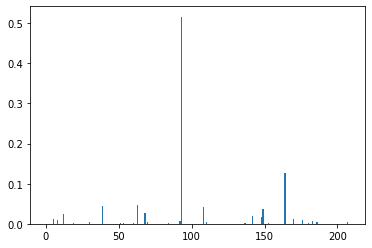

325
AUD/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00248
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00003
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00009
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00013
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00012
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00022
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00018
Feature: 33, Score: 0.00006
Feature: 34, Score: 0.00000
Feature: 35, Score

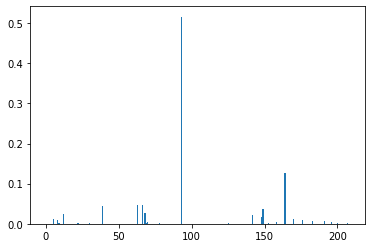

326
AUD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00259
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01281
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00166
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00018
Feature: 14, Score: 0.00006
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00028
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00022
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00008
Feature: 26, Score: 0.00017
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00001
Feature: 32, Score: 0.00086
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

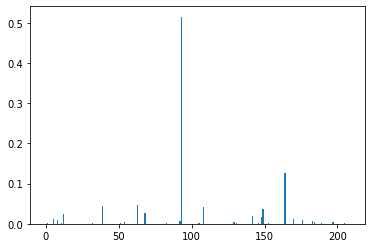

327
GBP/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00013
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00305
Feature: 7, Score: 0.00022
Feature: 8, Score: 0.01047
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00006
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00561
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00006
Feature: 19, Score: 0.00016
Feature: 20, Score: 0.00002
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00069
Feature: 33, Score: 0.00002
Feature: 34, Score: 0.00000
Feature: 35, Score

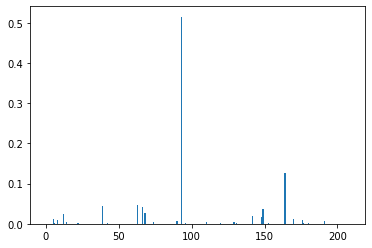

328
USD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00117
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02497
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00017
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00022
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00028
Feature: 25, Score: 0.00014
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00012
Feature: 34, Score: 0.00000
Feature: 35, Score

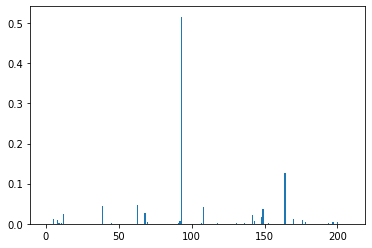

329
NZD/CAD
Feature: 0, Score: 0.00028
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00561
Feature: 3, Score: 0.00018
Feature: 4, Score: 0.00034
Feature: 5, Score: 0.01273
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00028
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00006
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00013
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

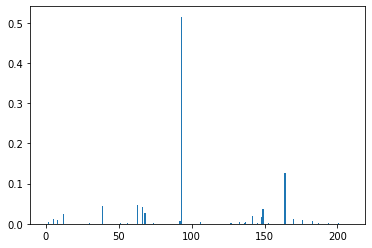

330
USD/JPY
Feature: 0, Score: 0.00018
Feature: 1, Score: 0.00008
Feature: 2, Score: 0.00006
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01030
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00017
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00028
Feature: 17, Score: 0.00028
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00086
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00006
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

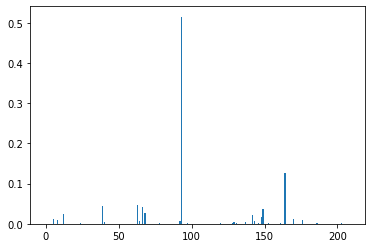

331
EUR/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01300
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00006
Feature: 28, Score: 0.00006
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00013
Feature: 31, Score: 0.00003
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

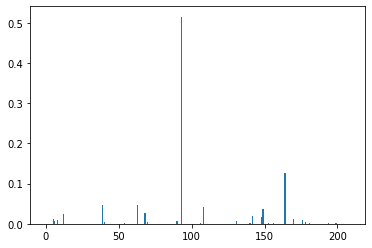

332
EUR/CAD
Feature: 0, Score: 0.00013
Feature: 1, Score: 0.00012
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01382
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02467
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00069
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00021
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00128
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00001
Feature: 35, Score

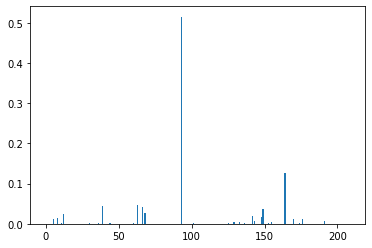

333
AUD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00564
Feature: 3, Score: 0.00006
Feature: 4, Score: 0.00016
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01382
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00174
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00012
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00014
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00006
Feature: 34, Score: 0.00000
Feature: 35, Score

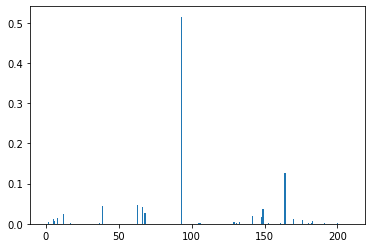

334
USD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01153
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00028
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00335
Feature: 25, Score: 0.00003
Feature: 26, Score: 0.00003
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00086
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00001
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00001
Feature: 35, Score

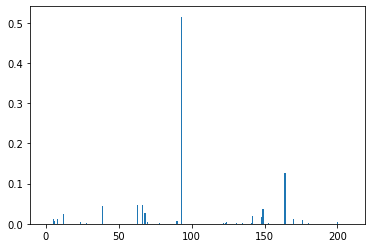

335
EUR/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00002
Feature: 12, Score: 0.02484
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00017
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00086
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00007
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

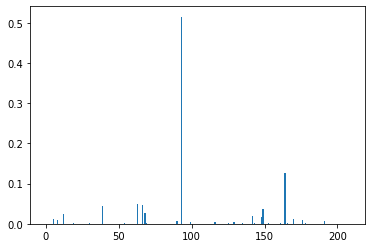

336
EUR/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01024
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00006
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02456
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00561
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00013
Feature: 22, Score: 0.00021
Feature: 23, Score: 0.00002
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00013
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00006
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00086
Feature: 34, Score: 0.00000
Feature: 35, Score

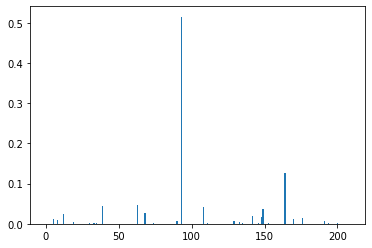

337
EUR/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00025
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00100
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00045
Feature: 11, Score: 0.00006
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00175
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00074
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.04266
Feature: 27, Score: 0.00001
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00005
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

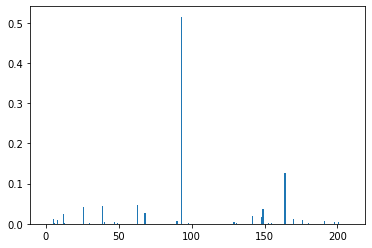

338
AUD/CHF
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00003
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00721
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00013
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00006
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

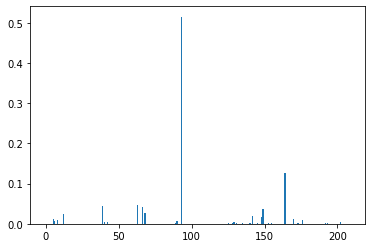

339
GBP/AUD
Feature: 0, Score: 0.00135
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00018
Feature: 4, Score: 0.00003
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00007
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00012
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00066
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00028
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00017
Feature: 34, Score: 0.00003
Feature: 35, Score

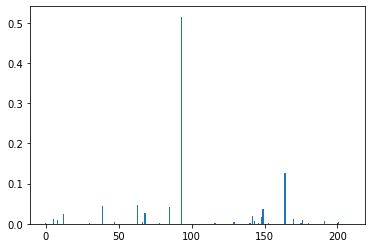

340
AUD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00066
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01026
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00003
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02625
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00030
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00022
Feature: 34, Score: 0.00000
Feature: 35, Score

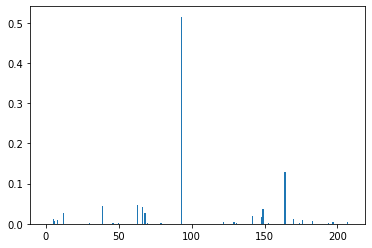

341
NZD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00259
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00018
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00002
Feature: 35, Score

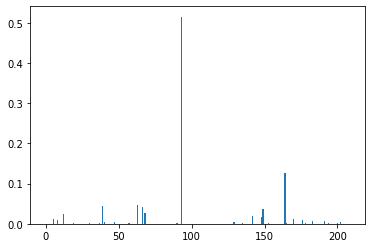

342
NZD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00012
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01267
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00561
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00082
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00364
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00028
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00259
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00008
Feature: 34, Score: 0.00000
Feature: 35, Score

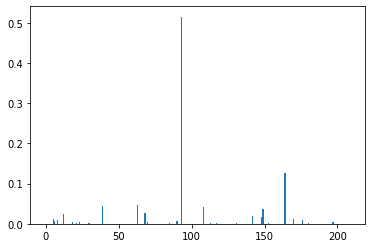

343
CAD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00066
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00086
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00018
Feature: 24, Score: 0.00155
Feature: 25, Score: 0.00006
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00013
Feature: 28, Score: 0.00002
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00385
Feature: 31, Score: 0.00047
Feature: 32, Score: 0.00069
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

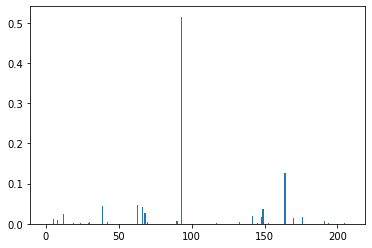

344
EUR/USD
Feature: 0, Score: 0.00579
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00041
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00006
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00242
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00034
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00364
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00276
Feature: 30, Score: 0.00070
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

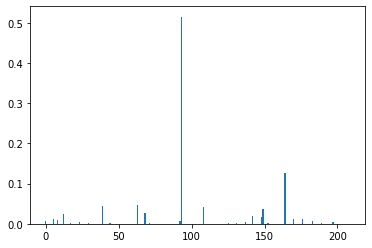

345
AUD/NZD
Feature: 0, Score: 0.00181
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00028
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01074
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00259
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00066
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00047
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

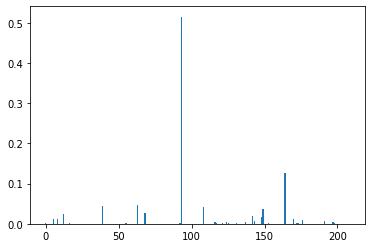

346
AUD/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01278
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00013
Feature: 20, Score: 0.00017
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00018
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00013
Feature: 34, Score: 0.00000
Feature: 35, Score

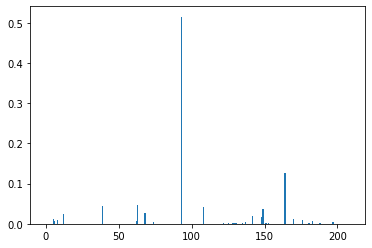

347
GBP/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00006
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00003
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00146
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00028
Feature: 35, Score

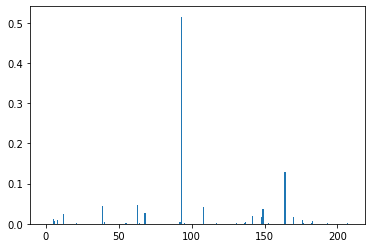

348
EUR/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00008
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01039
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00007
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00002
Feature: 20, Score: 0.00135
Feature: 21, Score: 0.00001
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00175
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00001
Feature: 35, Score

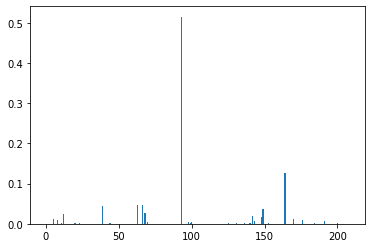

349
GBP/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00025
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01272
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01153
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00561
Feature: 18, Score: 0.00022
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00007
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

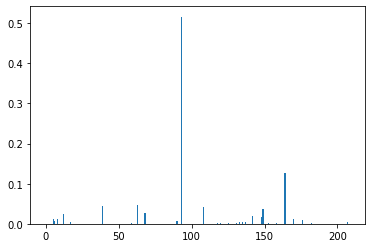

350
AUD/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00562
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00028
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00082
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00022
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00260
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00008
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00127
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00006
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

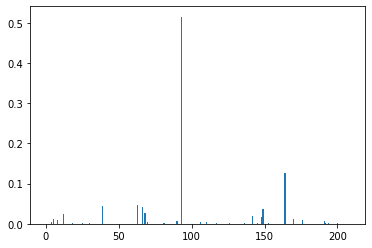

351
CAD/CHF
Feature: 0, Score: 0.00027
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00108
Feature: 3, Score: 0.00021
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00012
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00007
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00006
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00135
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

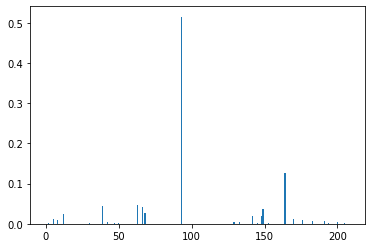

352
GBP/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00002
Feature: 5, Score: 0.01297
Feature: 6, Score: 0.00728
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01020
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00135
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00025
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00138
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00003
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

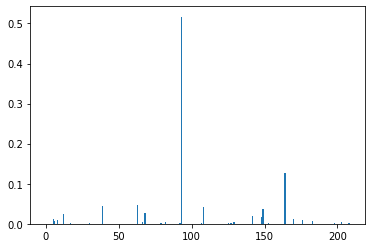

353
AUD/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00076
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00082
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01051
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00007
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00259
Feature: 31, Score: 0.00034
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00022
Feature: 35, Score

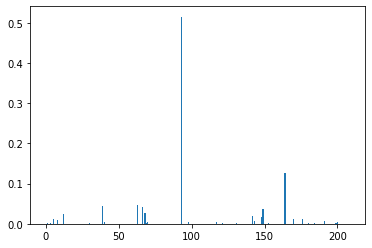

354
EUR/USD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00007
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00006
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00009
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00050
Feature: 34, Score: 0.00000
Feature: 35, Score

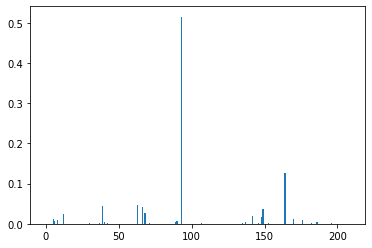

355
GBP/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00259
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00006
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02459
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00033
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00025
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00005
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00022
Feature: 35, Score

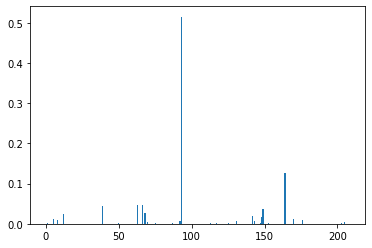

356
GBP/CAD
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00175
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00041
Feature: 7, Score: 0.00013
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00012
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00006
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00034
Feature: 25, Score: 0.00003
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00086
Feature: 29, Score: 0.00002
Feature: 30, Score: 0.00286
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00013
Feature: 34, Score: 0.00000
Feature: 35, Score

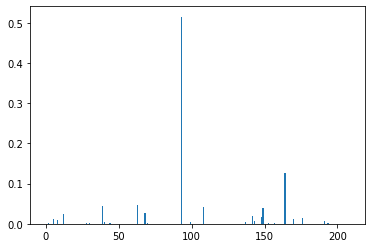

357
AUD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00008
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00012
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00005
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00561
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00258
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00089
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00000
Feature: 35, Score

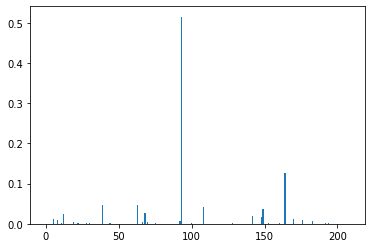

358
EUR/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00012
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00003
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00082
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00260
Feature: 25, Score: 0.00028
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00086
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00006
Feature: 34, Score: 0.00000
Feature: 35, Score

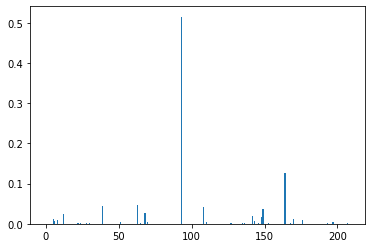

359
EUR/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00047
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01025
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02451
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00053
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00016
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00028
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00002
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

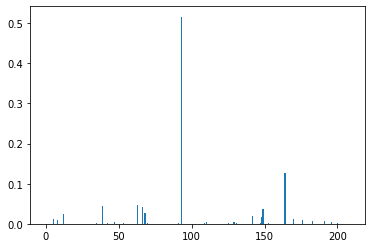

360
NZD/CHF
Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00012
Feature: 2, Score: 0.00007
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00017
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02466
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00005
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00013
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00086
Feature: 33, Score: 0.00007
Feature: 34, Score: 0.00082
Feature: 35, Score

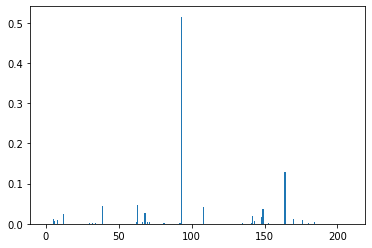

361
EUR/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00006
Feature: 2, Score: 0.00040
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00082
Feature: 5, Score: 0.01269
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01042
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00007
Feature: 15, Score: 0.00078
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00003
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00006
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

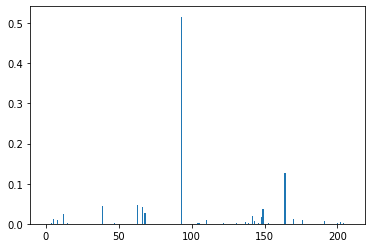

362
EUR/USD
Feature: 0, Score: 0.00066
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01267
Feature: 6, Score: 0.00006
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01056
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00019
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00006
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00001
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00002
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00018
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00012
Feature: 35, Score

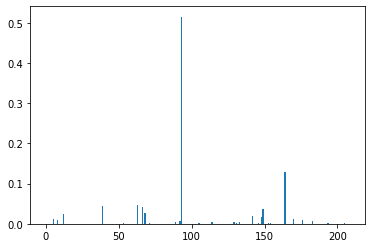

363
CAD/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02451
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00017
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00022
Feature: 23, Score: 0.00013
Feature: 24, Score: 0.00074
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00018
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00127
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00019
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

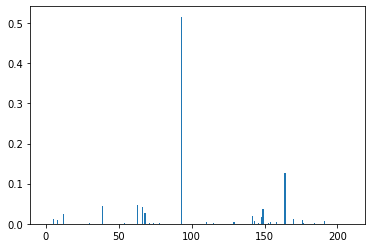

364
EUR/JPY
Feature: 0, Score: 0.00002
Feature: 1, Score: 0.00016
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00014
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00017
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00082
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00017
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00003
Feature: 20, Score: 0.00002
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00368
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00008
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00108
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00022
Feature: 34, Score: 0.00029
Feature: 35, Score

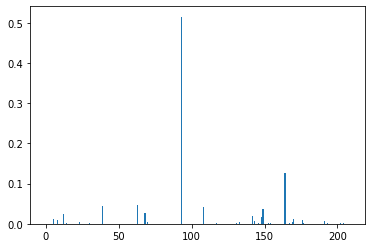

365
CAD/CHF
Feature: 0, Score: 0.00002
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00041
Feature: 3, Score: 0.00013
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00003
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00006
Feature: 15, Score: 0.00005
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00007
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00003
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00086
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00017
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

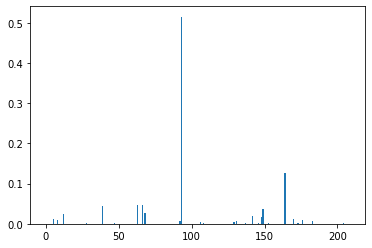

366
EUR/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00561
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00021
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01023
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00034
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00005
Feature: 28, Score: 0.00016
Feature: 29, Score: 0.00003
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

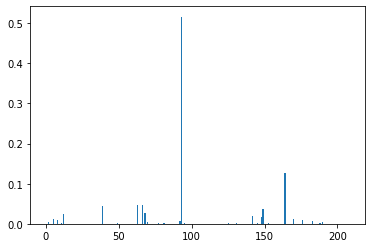

367
GBP/NZD
Feature: 0, Score: 0.00660
Feature: 1, Score: 0.00028
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01267
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00017
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00007
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00126
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

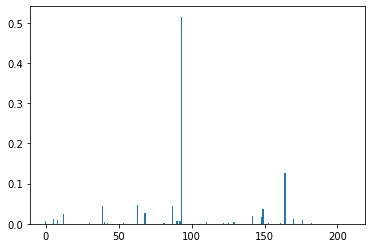

368
USD/JPY
Feature: 0, Score: 0.00012
Feature: 1, Score: 0.00015
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00259
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00086
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00003
Feature: 35, Score

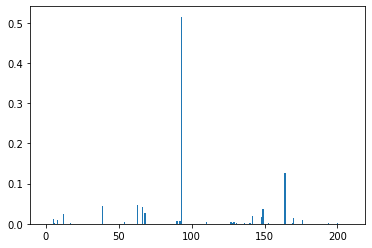

369
EUR/NZD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00002
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00002
Feature: 5, Score: 0.01269
Feature: 6, Score: 0.00720
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00012
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

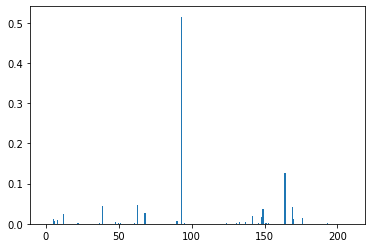

370
EUR/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00002
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00046
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00016
Feature: 34, Score: 0.00000
Feature: 35, Score

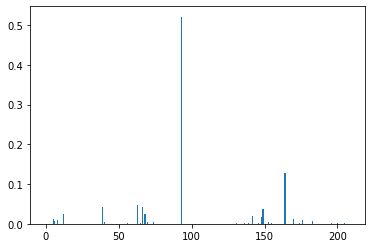

371
USD/CAD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00259
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00047
Feature: 8, Score: 0.01039
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00008
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00242
Feature: 18, Score: 0.00561
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00005
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00015
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

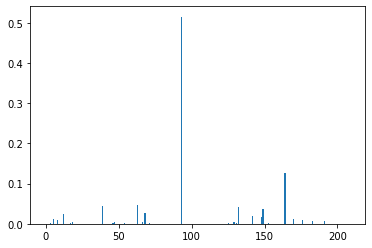

372
EUR/CHF
Feature: 0, Score: 0.00025
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01018
Feature: 9, Score: 0.00047
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00076
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00006
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00086
Feature: 28, Score: 0.00002
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00006
Feature: 34, Score: 0.00000
Feature: 35, Score

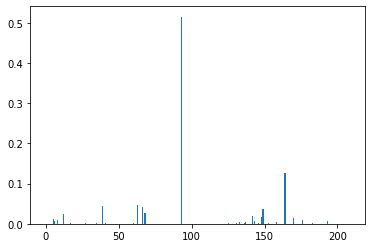

373
GBP/AUD
Feature: 0, Score: 0.00012
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01300
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00022
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00006
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.04266
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00106
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00013
Feature: 34, Score: 0.00000
Feature: 35, Score

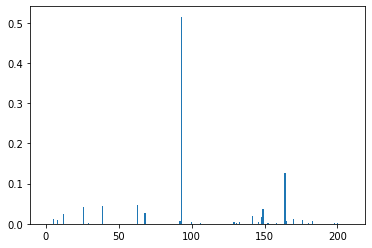

374
GBP/CHF
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00002
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00034
Feature: 22, Score: 0.00602
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

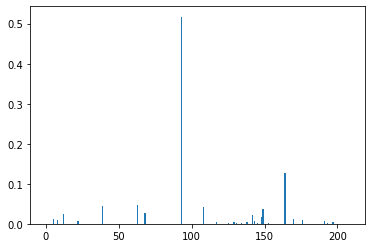

375
GBP/JPY
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00561
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00020
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00086
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00259
Feature: 24, Score: 0.00073
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00002
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00082
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

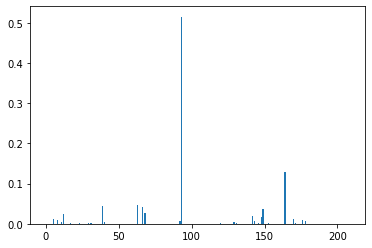

376
EUR/AUD
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00719
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00028
Feature: 17, Score: 0.00066
Feature: 18, Score: 0.00003
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00073
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00007
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00006
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score

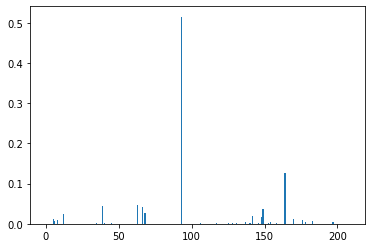

377
EUR/CHF
Feature: 0, Score: 0.00009
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00016
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01266
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00005
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02450
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00017
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00008
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00005
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00083
Feature: 35, Score

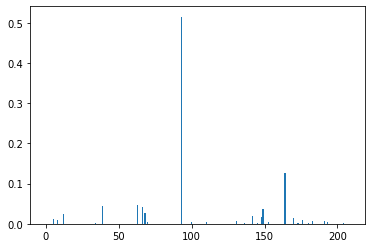

In [137]:
final_data = pd.DataFrame()
col_num =31

for item,row in final_iter_list.iterrows():
    
    print(item)
    condition = row['Condition']
    currency = row['Currency']
    tf = row['TimeFrame']
    strategy = row['Strategy']

    print(currency) 

    df = df1[(df1['Condition'] == condition)&(df1['Currency'] == currency)&(df1['TimeFrame'] == tf)
            & (df1['Strategy'] == strategy)]
    
    #y= df['Good_Bad_Flag'].values
    y= np.where(pd.DataFrame(df['Exit_closing_flag'])['Exit_closing_flag']=='Stop_Loss_Reach',0,1)
    
    X =df.iloc[:,col_num:]
    X, y = make_regression(n_samples=100, n_features=len(X.columns), n_informative=5, random_state=1)
    
    
    test_file = pd.DataFrame(df.iloc[:,col_num:].columns.T)
    test_file['Currency'] = currency
    test_file['Condition'] = condition
    test_file['TimeFrame'] = tf
    test_file['Strategy'] = strategy
    
    #print("length of the data is --->", + str(len))
    # define the model
    model = DecisionTreeRegressor()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = model.feature_importances_
    
    test_file = pd.concat([test_file,pd.DataFrame(model.feature_importances_)],axis=1)
    
    final_data = final_data.append(test_file)
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()
    
    
    

In [138]:
final_data

0 Currency Condition TimeFrame     Strategy         0
0           _volume  GBP/NZD     Short        D1  PinscherEMA  0.000000
1         _stock_%K  GBP/NZD     Short        D1  PinscherEMA  0.000692
2         _stoch_%D  GBP/NZD     Short        D1  PinscherEMA  0.000000
3    _stoch_slow_%K  GBP/NZD     Short        D1  PinscherEMA  0.000000
4    _stoch_slow_%D  GBP/NZD     Short        D1  PinscherEMA  0.000000
..              ...      ...       ...       ...          ...       ...
204       Hour_Flag  EUR/CHF     Short        D1          EMA  0.001753
205       Recency_5  EUR/CHF     Short        D1          EMA  0.000000
206      Recency_10  EUR/CHF     Short        D1          EMA  0.000000
207      Recency_15  EUR/CHF     Short        D1          EMA  0.000121
208    Time_Gap_Hrs  EUR/CHF     Short        D1          EMA  0.000000

[79002 rows x 6 columns]

In [139]:
final_data
final_data.columns = ['Variable', 'Currency', 'Condition', 'TimeFrame','Strategy','Relative_Importance_Score']
final_data["Rank"] = final_data.groupby(by = ["Condition","Currency","TimeFrame",'Strategy'])["Relative_Importance_Score"].rank(ascending=False,method = 'first')

In [140]:
final_data

Variable Currency Condition TimeFrame     Strategy  \
0           _volume  GBP/NZD     Short        D1  PinscherEMA   
1         _stock_%K  GBP/NZD     Short        D1  PinscherEMA   
2         _stoch_%D  GBP/NZD     Short        D1  PinscherEMA   
3    _stoch_slow_%K  GBP/NZD     Short        D1  PinscherEMA   
4    _stoch_slow_%D  GBP/NZD     Short        D1  PinscherEMA   
..              ...      ...       ...       ...          ...   
204       Hour_Flag  EUR/CHF     Short        D1          EMA   
205       Recency_5  EUR/CHF     Short        D1          EMA   
206      Recency_10  EUR/CHF     Short        D1          EMA   
207      Recency_15  EUR/CHF     Short        D1          EMA   
208    Time_Gap_Hrs  EUR/CHF     Short        D1          EMA   

     Relative_Importance_Score   Rank  
0                     0.000000   78.0  
1                     0.000692   33.0  
2                     0.000000   79.0  
3                     0.000000   80.0  
4                     0.000000   81.0  
..                         ...    ...  
204                   0.001753   24.0  
205                   0.000000  207.0  
206                   0.000000  208.0  
207                   0.000121   45.0  
208                   0.000000  209.0  

[79002 rows x 7 columns]

In [141]:
#export_path = "D:/ICHIMOKU - 30 June 2020 Datasets/Resultant Data/"

final_data.to_csv(path_for_data+"All Strategy_Relative_importance.csv",index=False)

In [68]:
final_data

Variable Currency Condition TimeFrame     Strategy  \
0           _volume  EUR/CAD     Short        H1          EMA   
1         _stock_%K  EUR/CAD     Short        H1          EMA   
2         _stoch_%D  EUR/CAD     Short        H1          EMA   
3    _stoch_slow_%K  EUR/CAD     Short        H1          EMA   
4    _stoch_slow_%D  EUR/CAD     Short        H1          EMA   
..              ...      ...       ...       ...          ...   
188       Hour_Flag  GBP/JPY      Long        D1  PinscherEMA   
189       Recency_5  GBP/JPY      Long        D1  PinscherEMA   
190      Recency_10  GBP/JPY      Long        D1  PinscherEMA   
191      Recency_15  GBP/JPY      Long        D1  PinscherEMA   
192    Time_Gap_Hrs  GBP/JPY      Long        D1  PinscherEMA   

     Relative_Importance_Score   Rank  
0                     0.000000   71.0  
1                     0.000000   72.0  
2                     0.000117   42.0  
3                     0.002078   18.0  
4                     0.000069   47.0  
..                         ...    ...  
188                   0.000000  190.0  
189                   0.000000  191.0  
190                   0.000000  192.0  
191                   0.000000  193.0  
192                   0.001242   21.0  

[5018 rows x 7 columns]

In [58]:



# df1['Good_Bad_Flag'] = np.where(df1['Good_Bad_Flag'] == 'Good',1,0)
    
# df1['date_x']=pd.to_datetime(df1['date_x'])

# df1['Hour'] = df1['date_x'].dt.hour
# df1['Hour_Flag'] = np.where((df1['Hour'] >= 0)&(df1['Hour'] < 4),1,\
#                           np.where((df1['Hour'] >= 4)&(df1['Hour'] < 8),2,\
#                                    np.where((df1['Hour'] >= 8)&(df1['Hour'] < 12),3,\
#                                             np.where((df1['Hour'] >= 12)&(df1['Hour'] < 16),4,\
#                                                      np.where((df1['Hour'] >= 16)&(df1['Hour'] < 20),5,6)))))

# df1.reset_index(inplace=True)

# df1['Recency_5'] = df1.groupby(['Currency','Condition','TimeFrame'])['Good_Bad_Flag'].apply(lambda x: x.rolling(5, 1).mean().shift().bfill())
# df1['Recency_10'] = df1.groupby(['Currency','Condition','TimeFrame'])['Good_Bad_Flag'].apply(lambda x: x.rolling(10, 1).mean().shift().bfill())
# df1['Recency_15'] = df1.groupby(['Currency','Condition','TimeFrame'])['Good_Bad_Flag'].apply(lambda x: x.rolling(15, 1).mean().shift().bfill())


# df1['Time_Gap_Flag'] = df1.groupby(['Currency','Condition','TimeFrame'])['date_x'].apply(lambda x: x.diff())
# df1['Time_Gap_Flag'] = df1['Time_Gap_Flag'].fillna(pd.Timedelta(seconds=0))
# df1['Time_Gap_Hrs'] = df1['Time_Gap_Flag'].dt.components['hours'] + (24* df1['Time_Gap_Flag'].dt.days)
# df1.drop('Time_Gap_Flag',axis=1,inplace=True)


# df1['Good_Bad_Flag'] = np.where(df1['Good_Bad_Flag'] == 1,'Good','Bad')


# df1.to_csv(p1 + "Ichimoku_updated_standarised_model_data_20200630_v1.csv",index=False)
